# Head vs. Eye-Tracking: Analysing the Behavioral Data of a Free-Viewing Walk in VR
Here the behavioral and hit events of a single subject is analyzed. The behavioral eye-tracking dataset contains, among others, the player's saved positions and rotations during the virtual free viewing walk for both head and eye movements. The hit events dataset contains the objects the player looked at, the duration of the look, and the game object's distance from the player.

**TODO:**
- _Is there  anything interesting in the EYE-Local data?_

## 1. Load data

In [26]:
import math

import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
import scipy.stats
import seaborn as sns
import math
pd.options.mode.chained_assignment = None
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
# %matplotlib notebook
import numpy as np
import dataframe_image as dfi
import scipy
from scipy.stats import zscore
plt.rcParams.update({'font.size': 16})

# corresponding paths
b81_path = 'BehavioralData/Behavior_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv'
h81_path = 'BehavioralData/HitEvents_new_02715e7a-5a68-471b-9e63-f056c5f0df81.csv'

b6c_path = 'BehavioralData/Behavior_new_98ea619d-e75e-49b1-986d-07c3bf90ff6c.csv'
h6c_path = 'BehavioralData/HitEvents_new_98ea619d-e75e-49b1-986d-07c3bf90ff6c.csv'

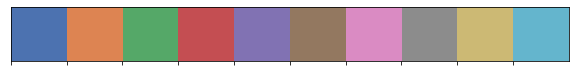

In [31]:
# choosing the color palette
# deep_pal = sns.color_palette('deep',n_colors=20, as_cmap=True)
# sns.palplot(deep_pal)
#
# deep_pal
# colors = dict(X=deep_pal[4], Y=deep_pal[0], Z=deep_pal[1])
# "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", https: //mycolor.space/?hex=%23C44E52&sub=1
colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD']
sns.palplot(sns.color_palette(colors))


We will first work with behavioral and hit events data from ID ending in `81`

In [8]:
df_b81 = pd.read_csv(b81_path)
df_b81
# dfi.export(df.head(10), 'Images/behavioral_info.png')

Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
0            0.000    1.0        0.0         0.0    58.655426   13.412971   
1            0.018    1.0        0.0         0.0    58.666626   13.412885   
2            0.021    1.0        0.0         0.0    58.666626   13.412885   
3            0.103    1.0        0.0         0.0    58.685047  547.543760   
4            0.105    1.0        0.0         0.0    58.685047  547.543760   
...            ...    ...        ...         ...          ...         ...   
163656    2806.947    1.0        0.0         0.0  2865.602500  527.395700   
163657    2806.958    1.0        0.0         0.0  2865.613500  527.395750   
163658    2806.969    1.0        0.0         0.0  2865.624800  527.395700   
163659    2806.980    1.0        0.0         0.0  2865.635500  527.395000   
163660    2806.992    1.0        0.0         0.0  2865.646700  527.394650   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
0        12.306775   21.046938       0.942591       0.099437  ...   -0.026742   
1        12.306769   21.046755       0.942547       0.099320  ...   -0.026736   
2        12.306769   21.046755       0.942547       0.099320  ...   -0.026736   
3         2.049087  589.386500       0.942298       0.102535  ...   -0.026730   
4         2.049087  589.386500       0.942298       0.102535  ...   -0.026730   
...            ...         ...            ...            ...  ...         ...   
163656    2.039758  593.381700      -0.465525       0.053999  ...   -0.030184   
163657    2.039808  593.381840      -0.466018       0.055140  ...   -0.030173   
163658    2.040012  593.382450      -0.388782       0.076406  ...   -0.030771   
163659    2.039536  593.381300      -0.349532       0.084078  ...   -0.029431   
163660    2.039790  593.382100      -0.322776       0.063792  ...   -0.029964   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
0           0.086533       0.113068       0.989807   13.420355  12.303403   
1           0.086563       0.112869       0.989822  547.551270   2.045723   
2           0.086563       0.112869       0.989822  547.551270   2.045723   
3           0.086624       0.115112       0.989563  547.551208   2.045722   
4           0.086624       0.115112       0.989563  547.551208   2.045722   
...              ...            ...            ...         ...        ...   
163656      0.140884       0.020569       0.989807  527.346741   2.038607   
163657      0.140656       0.021255       0.989822  527.346741   2.038620   
163658      0.054550       0.033539       0.997940  527.346741   2.038561   
163659      0.011353       0.037384       0.999222  527.346741   2.038495   
163660     -0.017776       0.020844       0.999619  527.346741   2.038489   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
0        21.029396      0.969479     -0.037709     -0.242255  
1       589.369324      0.969452     -0.037648     -0.242376  
2       589.369324      0.969452     -0.037648     -0.242376  
3       589.369141      0.969250     -0.037722     -0.243171  
4       589.369141      0.969250     -0.037722     -0.243171  
...            ...           ...           ...           ...  
163656  593.383911     -0.341758      0.026704     -0.939409  
163657  593.384033     -0.342585      0.026923     -0.939102  
163658  593.384155     -0.343687      0.027117     -0.938693  
163659  593.384338     -0.344554      0.027179     -0.938373  
163660  593.384460     -0.345481      0.027203     -0.938032  

[163661 rows x 24 columns]

In [3]:
df_b81.columns

Index(['Unnamed: 0', 'valid', 'leftBlink', 'rightBlink', 'ETWTime',
       'ETWoriginX', 'ETWoriginY', 'ETWoriginZ', 'ETWdirectionX',
       'ETWdirectionY', 'ETWdirectionZ', 'HON', 'ETLoriginX', 'ETLoriginY',
       'ETLoriginZ', 'ETLdirectionX', 'ETLdirectionY', 'ETLdirectionZ',
       'HToriginX', 'HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY',
       'HTdirectionZ'],
      dtype='object')

## 2. Preprocessing
When looking into the `df_b81` file, we found its dimensions are 163661 x 24, and it contains missing values which should be fixed or deleted.

In [9]:
# File contains 163661 x 24
df_b81.info()
# Check for NaN
df_b81.isnull().sum()
# dfi.export(df.info(), 'Images/behavioral_info.png')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163661 entries, 0 to 163660
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163661 non-null  float64
 1   valid          163661 non-null  float64
 2   leftBlink      163661 non-null  float64
 3   rightBlink     163661 non-null  float64
 4   ETWTime        163661 non-null  float64
 5   ETWoriginX     163661 non-null  float64
 6   ETWoriginY     163661 non-null  float64
 7   ETWoriginZ     163661 non-null  float64
 8   ETWdirectionX  163661 non-null  float64
 9   ETWdirectionY  163661 non-null  float64
 10  ETWdirectionZ  163661 non-null  float64
 11  HON            163470 non-null  object 
 12  ETLoriginX     163442 non-null  float64
 13  ETLoriginY     163442 non-null  float64
 14  ETLoriginZ     163442 non-null  float64
 15  ETLdirectionX  163442 non-null  float64
 16  ETLdirectionY  163442 non-null  float64
 17  ETLdirectionZ  163442 non-nul

Unnamed: 0         0
valid              0
leftBlink          0
rightBlink         0
ETWTime            0
ETWoriginX         0
ETWoriginY         0
ETWoriginZ         0
ETWdirectionX      0
ETWdirectionY      0
ETWdirectionZ      0
HON              191
ETLoriginX       219
ETLoriginY       219
ETLoriginZ       219
ETLdirectionX    219
ETLdirectionY    219
ETLdirectionZ    219
HToriginX        229
HToriginY        229
HToriginZ        229
HTdirectionX     229
HTdirectionY     229
HTdirectionZ     229
dtype: int64

### 2.1 Delete NaN
After deleting NaN, the file's length is 163432 x 24

In [14]:
# Delete NaN values and reset index
df_clean = df_b81.dropna().reset_index(drop=True)
df_clean.info()
# file contains no NaN
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163432 entries, 0 to 163431
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     163432 non-null  float64
 1   valid          163432 non-null  float64
 2   leftBlink      163432 non-null  float64
 3   rightBlink     163432 non-null  float64
 4   ETWTime        163432 non-null  float64
 5   ETWoriginX     163432 non-null  float64
 6   ETWoriginY     163432 non-null  float64
 7   ETWoriginZ     163432 non-null  float64
 8   ETWdirectionX  163432 non-null  float64
 9   ETWdirectionY  163432 non-null  float64
 10  ETWdirectionZ  163432 non-null  float64
 11  HON            163432 non-null  object 
 12  ETLoriginX     163432 non-null  float64
 13  ETLoriginY     163432 non-null  float64
 14  ETLoriginZ     163432 non-null  float64
 15  ETLdirectionX  163432 non-null  float64
 16  ETLdirectionY  163432 non-null  float64
 17  ETLdirectionZ  163432 non-nul

Unnamed: 0       0
valid            0
leftBlink        0
rightBlink       0
ETWTime          0
ETWoriginX       0
ETWoriginY       0
ETWoriginZ       0
ETWdirectionX    0
ETWdirectionY    0
ETWdirectionZ    0
HON              0
ETLoriginX       0
ETLoriginY       0
ETLoriginZ       0
ETLdirectionX    0
ETLdirectionY    0
ETLdirectionZ    0
HToriginX        0
HToriginY        0
HToriginZ        0
HTdirectionX     0
HTdirectionY     0
HTdirectionZ     0
dtype: int64

### 2.2 Dealing with outliers
- We decided to delete first three rows since it was speculated that these values were recorded at the moment when the player switch from the validation plane to the actual initial position in the game. However, this did not work because those were not the only values that differed. There are more.
- Thus, z_scores was performed to detect and delete outlier values in the dataset. This approach was more appropriate and outliers were removed accordingly (see section 4).

In [15]:
## Filter by valid trials (i.e., valid column = 1)
def filter_valid(df):
    df_valid = df["valid"] == 1.0
    df_clean = df[df_valid]
    return df_clean

In [16]:
df_clean = filter_valid(df_clean)
print(df_clean.shape)

(157959, 24)


## 3. Initial inspection
The following exploratory analysis shows the range of the positions' origin and directions of the player. The values are as expected. Namely, head's positions' origin on the y-axis remains mostly invariant and around zero because the player was sitting on a chair and was instructed not to stand up. The x and y-axis' values range between 500 and 650 approximately because they correspond to the boundaries of the area in the virtual city where participants were instructed to do the walk. Furthermore, the visualizations indicate that the head-tracking and the eye-tracking (world) data have similar distributions which seeems to suggest that it is possible to use either the head or the eye-tracking data to reconstruct the participants' virtual walk.

### 3.1 Total count distributions

In [41]:
def vis_count_distr(df_clean, save=False, include_eye_local=False):
    """
    :param df_clean: df, a df without NaN
    :param safe: bool, specify if save image. No by default
    :param img_title: title for saved image
    :return: eps image with distributions for head and eye data
    """
    sns.set_palette(sns.color_palette('deep'))
    plt.rcParams.update({'font.size': 12})
    plot_subtitle="Axes behavioral distribution"
    img_title = "behavioral_distribution"
    # eye-tracking local distribution
    if include_eye_local:
        n_col = 3
        fig, ax = plt.subplots(2,n_col, figsize=(20, 12))
        fig.suptitle(plot_subtitle, fontsize=22, y=1)
        sns.histplot(df_clean[["ETLdirectionX", "ETLdirectionY", "ETLdirectionZ"]], ax=ax[1,2])
        ax[1,2].set_xlabel('Range', size=14)
        ax[1,2].set_ylabel('Count', size=14)

        sns.histplot(df_clean[["ETLoriginX", "ETLoriginY", "ETLoriginZ"]], ax=ax[0,2])
        ax[0,2].set_xlabel('Range', size=14)
        ax[0,2].set_ylabel('Count', size=14)
        col_title = ['Head', 'Eye world', 'Eye local']
    # "Head vs eye tracking behavioral data distributions"
    else:
        n_col = 2
        col_title = ['Head', 'Eye']
        fig, ax = plt.subplots(2,n_col, figsize=(20, 12))
    # head-tracking distribution
    # colors_or = dict(HToriginX=deep_pal[3], HToriginY=deep_pal[2], HToriginZ=deep_pal[0])
    fig.suptitle(plot_subtitle, fontsize=22, y=1)

    sns.histplot(df_clean[['HToriginX', 'HToriginY', 'HToriginZ']], alpha=0.7, ax=ax[0,0])
    ax[0,0].set_xlabel('Range', size=14)
    ax[0,0].set_ylabel('Count', size=14)

    # colors_dir = dict(HTdirectionX=deep_pal[3], HTdirectionY=deep_pal[2], HTdirectionZ=deep_pal[0])
    sns.histplot(df_clean[['HTdirectionX', 'HTdirectionY', 'HTdirectionZ']], alpha=0.7, ax=ax[1,0])
    ax[1,0].set_xlabel('Range', size=14)
    ax[1,0].set_ylabel('Count', size=14)

    # eye-tracking world distribution
    # colors_or_e = dict(ETWoriginX=deep_pal[3], ETWoriginY=deep_pal[2], ETWoriginZ=deep_pal[0])
    sns.histplot(df_clean[["ETWoriginX", "ETWoriginY", "ETWoriginZ"]], alpha=0.7, ax=ax[0,1])
    ax[0,1].set_xlabel('Range', size=14)
    ax[0,1].set_ylabel('Count', size=14)

    # colors_dir_e = dict(ETWdirectionX=deep_pal[3], ETWdirectionY=deep_pal[2], ETWdirectionZ=deep_pal[0])
    sns.histplot(df_clean[["ETWdirectionX", "ETWdirectionY", "ETWdirectionZ"]], alpha=0.7, ax=ax[1,1])
    ax[1,1].set_xlabel('Range', size=14)
    ax[1,1].set_ylabel('Count', size=14)

    for i, ax in enumerate(ax.flatten()[:n_col]):
        ax.set_title(col_title[i], fontweight='bold', fontsize=16)
        i += 1
    img_title = img_title
    plt.tight_layout()
    if save:
        # Save visualization
        # plt.savefig('newImages/'+img_title+'.eps', format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+img_title+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+img_title+".jpeg", format="jpeg", dpi=1200)

In [126]:
vis_count_distr(df_clean, save=False, img_title="behavioral_distr_initial", include_eye_local=True)

NameError: name 'df_clean' is not defined

### 3.2 Origins' means

In [42]:
def plot_origin_mean(df, save=False):
    suptitle="Origins' mean for X-Y-Z-axes"
    save_name="origin_mean"
    fig, ax = plt.subplots(2,3, figsize=(22,14))
    sns.set_palette(sns.color_palette('deep'))

    fig.suptitle(suptitle, fontsize=22, y=0.93)
    plt.rcParams.update({'font.size': 12})

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HToriginX','ETWoriginX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range', size=12)

    sns.violinplot(data=df[['HToriginY', 'ETWoriginY']], ax=ax[0,1])
    ax[0,1].set_ylabel('', size=12)
    sns.violinplot(data=df[['HToriginZ','ETWoriginZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('', size=12)

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HToriginX','ETWoriginX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range', size=12)
    # ax[1,0].set_xlabel(['HToriginX','ETWoriginX'], size=12)
    sns.pointplot(data=df[['HToriginY', 'ETWoriginY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('', size=12)
    sns.pointplot(data=df[['HToriginZ','ETWoriginZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('', size=12)
    # ax.set_xticklabels('HToriginX','ETWoriginX','HToriginY', 'ETWoriginY','HToriginZ','ETWoriginZ')
    sns.despine(top=True)
    if save:
        # plt.savefig("newImages/" + save_name + ".eps", format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)

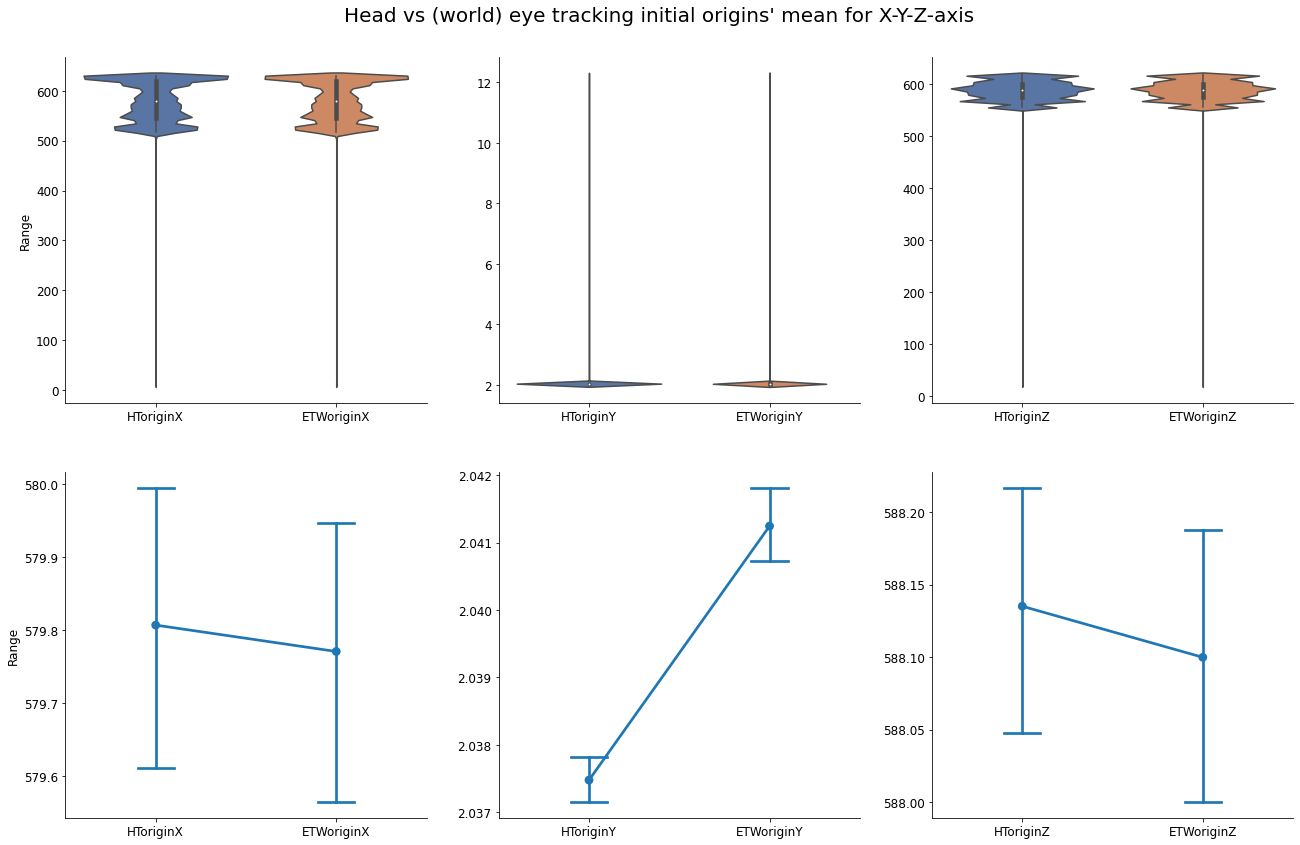

In [239]:
plot_origin_mean(df_clean)

### 3.3 Directions' means

In [44]:
def plot_directions_mean(df, save=False):
    suptitle="Directions' mean for X-Y-Z-axes"
    save_name="directions_mean"
    fig, ax = plt.subplots(2,3, figsize=(22,14))
    sns.set_palette(sns.color_palette('deep'))
    fig.suptitle(suptitle, fontsize=22, y=0.93)
    plt.rcParams.update({'font.size': 12})

    # mean distributions comparing head to eye tracing
    sns.violinplot(data=df[['HTdirectionX','ETWdirectionX']], ax=ax[0,0])
    ax[0,0].set_ylabel('Range', size=12)
    sns.violinplot(data=df[['HTdirectionY', 'ETWdirectionY']], ax=ax[0,1])
    ax[0,1].set_ylabel('')
    sns.violinplot(data=df[['HTdirectionZ','ETWdirectionZ']], ax=ax[0,2])
    ax[0,2].set_ylabel('')

    # representation of the estimated central tendency where the error bars indicate the uncertainty around the estimate.
    sns.pointplot(data=df[['HTdirectionX','ETWdirectionX']], capsize=.2, ax=ax[1,0])
    ax[1,0].set_ylabel('Range', size=12)
    sns.pointplot(data=df[['HTdirectionY', 'ETWdirectionY']],capsize=.2, ax=ax[1,1])
    ax[1,1].set_ylabel('')
    sns.pointplot(data=df[['HTdirectionZ','ETWdirectionZ']], capsize=.2, ax=ax[1,2])
    ax[1,2].set_ylabel('')
    sns.despine(top=True)
    if save:
        # plt.savefig("Images/" + save_name + ".eps", format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)

In [169]:
plot_directions_mean(df_clean)

<IPython.core.display.Javascript object>

### 3.4 X-axis origin and directions
The following line plots show head and eye tracking origin and direction for the X-axis with outliers (noise), mostly in the eye data.

In [45]:
# these line plots show head and eye tracking data moving parallely
def vis_x_outliers(df, save=False):
    save_name="x_origin_direction"
    subtitle="X-axis' origin and direction through time"

    fig, ax = plt.subplots(2,2, figsize=(22, 14), sharex=True)
    sns.set_palette(sns.color_palette('deep'))

    fig.suptitle(subtitle, fontsize=20, y=0.96)
    plt.rcParams.update({'font.size': 12})

    sns.lineplot(data=df[['HToriginX']], linewidth=2, ax=ax[0,0])
    ax[0,0].set_xlabel('Index/time', size=12)
    ax[0,0].set_ylabel('Range', size=14)
    ax[0,0].set(xlim=(0,None))

    sns.lineplot(data=df[['ETWoriginX']], linewidth=2, ax=ax[0,1])
    ax[0,1].set_xlabel('Index/Time', size=14)
    ax[0,1].set_ylabel('')
    ax[0,1].set(xlim=(0,None))

    sns.lineplot(data=df[['HTdirectionX']], linewidth=2, ax=ax[1,0])
    ax[1,0].set_xlabel('Index/Time', size=14)
    ax[1,0].set_ylabel('Range', size=14)
    ax[1,0].set(xlim=(0,None))

    sns.lineplot(data=df[['ETWdirectionX']], linewidth=2, ax=ax[1,1])
    ax[1,1].set_xlabel('Index/Time', size=14)
    ax[1,1].set_ylabel('')
    ax[1,1].set(xlim=(0,None))
    plt.legend(loc='upper right')
    sns.despine(top=True)

    col_title = ['Head', 'Eye']
    for i, ax in enumerate(ax.flatten()[:2]):
        ax.set_title(col_title[i], fontweight='bold', fontsize=16)
        i += 1
    if save:
        plt.savefig("Images/newImages/"+save_name+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+save_name+".jpeg", format="jpeg", dpi=1200)

In [184]:
# plot origin and directions with outliers
vis_x_outliers(df_clean, subtitle="Head vs (world) eye tracking: X's origin and direction outliers", save_name="x_origin_direction_outliers")

<IPython.core.display.Javascript object>

<AxesSubplot:>

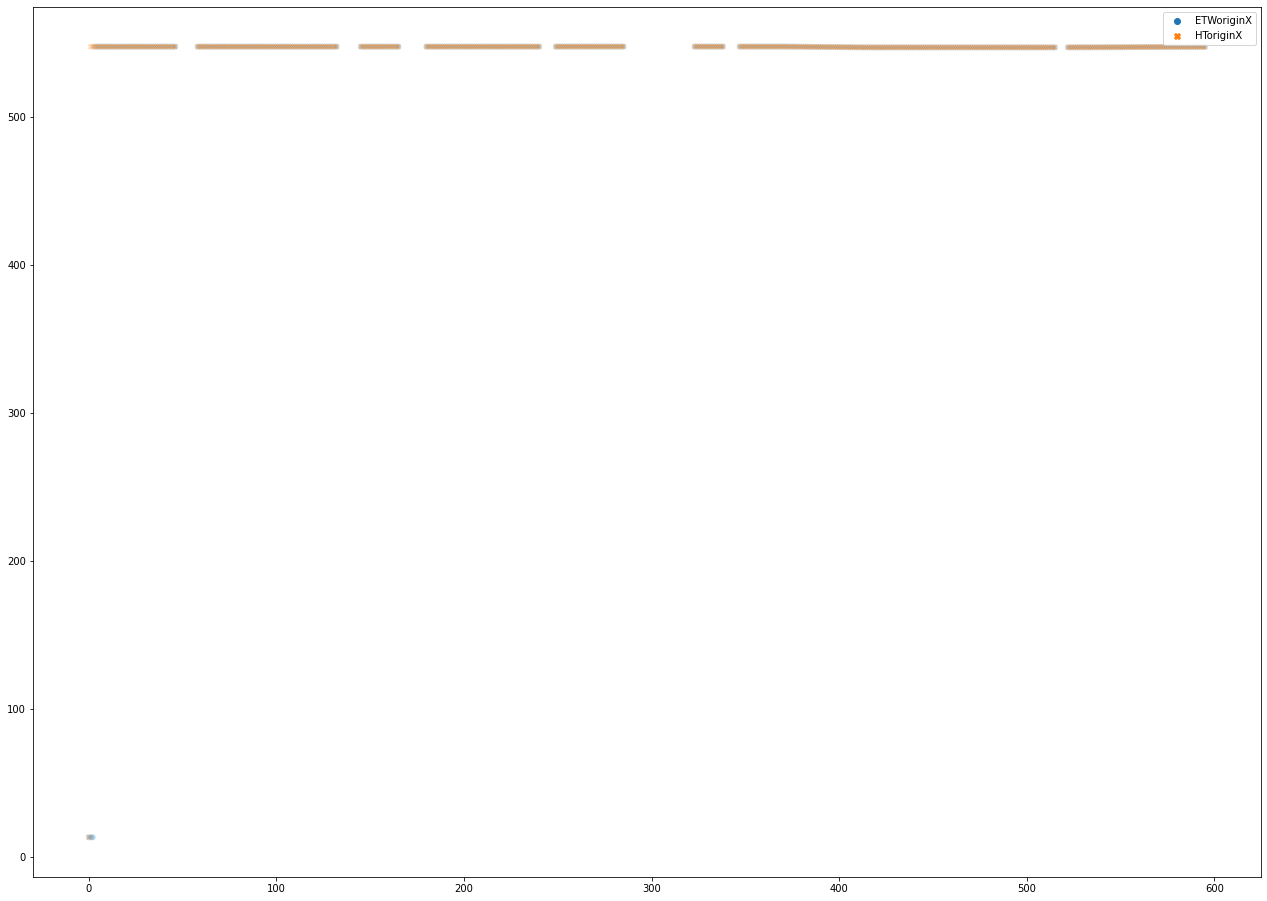

In [16]:
# a plot showing how the head and eye data origin overlap and values drop-down to zero (mostly eye values)
fig, ax = plt.subplots(1,1, figsize=(22, 16))
d = df_clean[['ETWoriginX', 'HToriginX']].head(500)
sns.scatterplot(data=d, alpha=0.3)

## 4. Outliers removal
We noticed that for both the head and eye tracking data there are some outlier values in the position origin and direction. These values correspond to the first 3 rows and contain very low values which were recorded at the very beginning of the experiment. More specifically, these values were recorded when switching from the calibration location to the location in the virtual city where the virtual walk took place. Thus, we delete them to avoid inconsistencies.
After deleting these values, we could notice that there were apparently more outlier values (See section 3.4). Some values drop-down to zero during eye blinks. This is consistent with the fact that the trials are invalid during these periods of time. Thus, Z-scores were calculated and outlier values were removed by deleting all rows in the dataset containing outliers. Although this results in data lose, no meaningful data is being removed since trials were invalid anyway.
sources for implementing the z-scores calculation:
 https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
 https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm
 # --> It was found out that this is an unnecessary step after using only the 'Valid' column in the dataset.

In [64]:
# df_clean

### 4.1 Z-scores

In [51]:
def cal_zscores(df):

    # select the rows to calculate z-scores on and call zscore function from stats
    df_rows = df[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]
    # array containing calculated z-score for each value in tha dataset
    z_scores = scipy.stats.zscore(df_rows)

    # convert each value in the dataset to its absolute value
    abs_zscores = np.abs(z_scores)
    # an outlier is defined as a number that is higher than three standard deviations from the mean
    filtered_data = (abs_zscores < 3).all(axis = 1)

    # filter the cleaned df with the results from the outliers
    filtered_df = df[filtered_data]
    # reset index
    filtered_df.reset_index(drop=True)
    return filtered_df

In [52]:
filtered_df = cal_zscores(df_clean)
filtered_df

Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
3            0.103    1.0        0.0         0.0    58.685047   547.54376   
4            0.105    1.0        0.0         0.0    58.685047   547.54376   
5            0.106    1.0        0.0         0.0    58.685047   547.54376   
6            0.107    1.0        0.0         0.0    58.685047   547.54376   
7            0.108    1.0        0.0         0.0    58.685047   547.54376   
...            ...    ...        ...         ...          ...         ...   
163427    2806.947    1.0        0.0         0.0  2865.602500   527.39570   
163428    2806.958    1.0        0.0         0.0  2865.613500   527.39575   
163429    2806.969    1.0        0.0         0.0  2865.624800   527.39570   
163430    2806.980    1.0        0.0         0.0  2865.635500   527.39500   
163431    2806.992    1.0        0.0         0.0  2865.646700   527.39465   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
3         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
4         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
5         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
6         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
7         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
...            ...         ...            ...            ...  ...         ...   
163427    2.039758   593.38170      -0.465525       0.053999  ...   -0.030184   
163428    2.039808   593.38184      -0.466018       0.055140  ...   -0.030173   
163429    2.040012   593.38245      -0.388782       0.076406  ...   -0.030771   
163430    2.039536   593.38130      -0.349532       0.084078  ...   -0.029431   
163431    2.039790   593.38210      -0.322776       0.063792  ...   -0.029964   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
3           0.086624       0.115112       0.989563  547.551208   2.045722   
4           0.086624       0.115112       0.989563  547.551208   2.045722   
5           0.086624       0.115112       0.989563  547.551208   2.045722   
6           0.086624       0.115112       0.989563  547.551208   2.045722   
7           0.086624       0.115112       0.989563  547.551208   2.045722   
...              ...            ...            ...         ...        ...   
163427      0.140884       0.020569       0.989807  527.346741   2.038607   
163428      0.140656       0.021255       0.989822  527.346741   2.038620   
163429      0.054550       0.033539       0.997940  527.346741   2.038561   
163430      0.011353       0.037384       0.999222  527.346741   2.038495   
163431     -0.017776       0.020844       0.999619  527.346741   2.038489   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
3       589.369141      0.969250     -0.037722     -0.243171  
4       589.369141      0.969250     -0.037722     -0.243171  
5       589.369141      0.969250     -0.037722     -0.243171  
6       589.369141      0.969250     -0.037722     -0.243171  
7       589.369141      0.969250     -0.037722     -0.243171  
...            ...           ...           ...           ...  
163427  593.383911     -0.341758      0.026704     -0.939409  
163428  593.384033     -0.342585      0.026923     -0.939102  
163429  593.384155     -0.343687      0.027117     -0.938693  
163430  593.384338     -0.344554      0.027179     -0.938373  
163431  593.384460     -0.345481      0.027203     -0.938032  

[151860 rows x 24 columns]

In [ ]:
filtered_df.info()

### 4.2 Head vs. eye positions and directions after z-scores

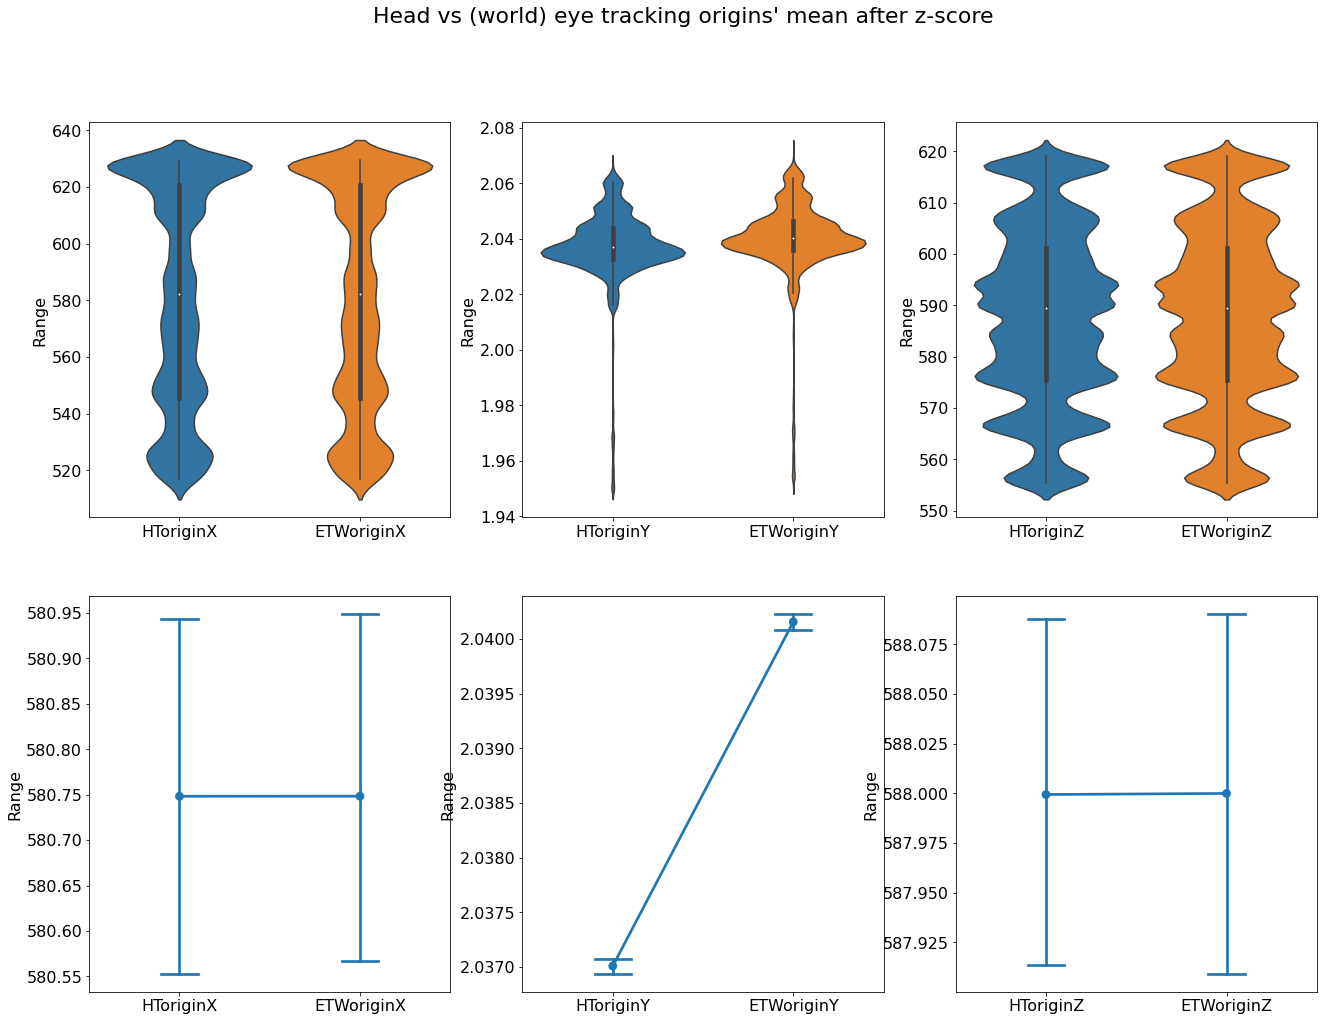

In [54]:
# visualize origins' means after z-scores
plot_origin_mean(filtered_df,"Head vs (world) eye tracking origins' mean after z-score", "origin_mean_distr_z_score")

In [ ]:
# visualize directions' means after z-scores
plot_directions_mean(filtered_df,"Head vs (world) eye tracking directions' mean after z-score", "direction_mean_distr_z_score")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


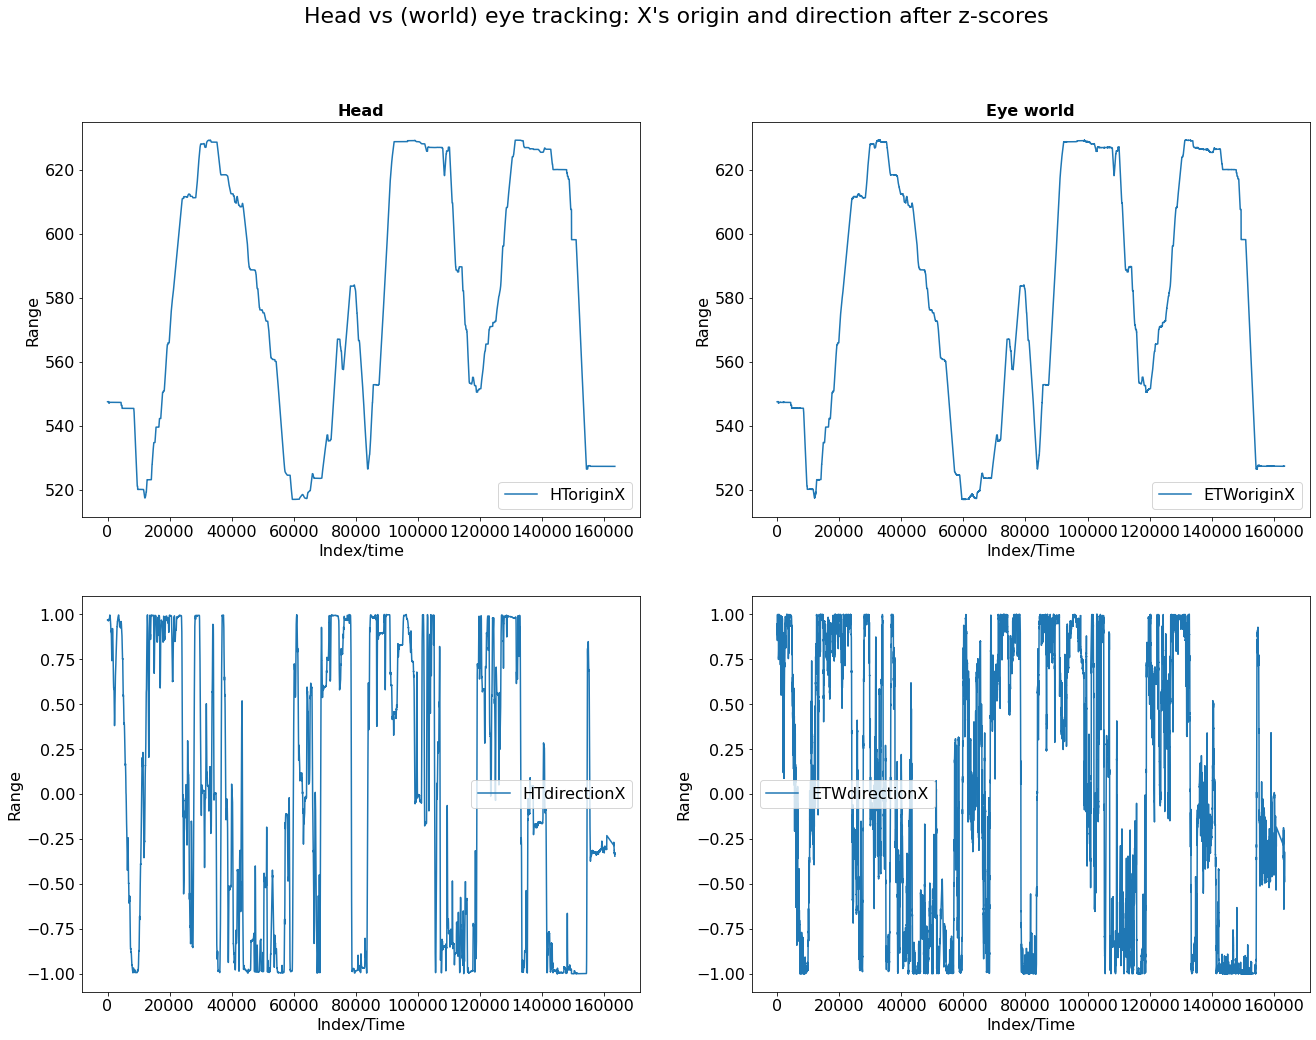

In [58]:
# X-axis' origins and directions after z-scores are less noisy and more similar
vis_x_outliers(filtered_df, subtitle="Head vs (world) eye tracking: X's origin and direction after z-scores", save_name="x_origin_direction_z_scores")

### 4.3 Axis origin and direction relational distributions through index/time

In [46]:
def plot_origin_relational(df, save=False, sample=False):
    plt.rcParams.update({'font.size': 12})
    sns.set_palette(sns.color_palette('deep'))
    # bahavioral axis relational distribution
    fig, ax = plt.subplots(3,1, figsize=(20, 12), sharex=True)

    if sample:
        n_sample=10000
        fig.suptitle("Axes' origins through index/time. Sample: " + str(n_sample), fontsize=22)
        sns.lineplot(data=df[['HToriginX','ETWoriginX']].head(n_sample), linewidth=2, legend=True, ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Origin X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HToriginY', 'ETWoriginY']].head(n_sample), linewidth=2,legend=True, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Origin Y', size=14)
        # ax[1].set_ylim(None, 2.15)
        ax[1].set(xlim=(0,None))
        sns.lineplot(data=df[['HToriginZ', 'ETWoriginZ']].head(n_sample), linewidth=2,legend=True, ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Origin Z', size=14)
        ax[2].set(xlim=(0,None))

    else:
        n_sample="all"
        fig.suptitle("Axes' origins through index/time. Sample: all", fontsize=22)
        sns.lineplot(data=df[['HToriginX','ETWoriginX']], linewidth=2, legend=True,ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Origin X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HToriginY', 'ETWoriginY']], linewidth=2,legend=True, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Origin Y', size=14)
        ax[1].set_ylim(None, 2.15)
        ax[1].set(xlim=(0,None))
        sns.lineplot(data=df[['HToriginZ', 'ETWoriginZ']], linewidth=2, legend=True,ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Origin Z', size=14)
        ax[2].set(xlim=(0,None))
    fig.subplots_adjust(hspace=0.4)
    sns.despine(top=True)
    if save:
        # plt.savefig("Images/" + "axis_origin_relational_" + str(n_sample) + ".eps", format='eps', dpi=1200)
        plt.savefig("Images/newImages/"+"axis_origin_relational_"+ str(n_sample)+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+"axis_origin_relational_"+ str(n_sample)+".jpeg", format="jpeg", dpi=1200)


In [106]:
plot_origin_relational(filtered_df, save=True, sample=False, n_sample="all")

NameError: name 'filtered_df' is not defined

In [47]:
def plot_direction_relational(df, save=False, sample=False):
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots(3,1, figsize=(20, 12))
    sns.set_palette(sns.color_palette('deep'))

    if sample:
        n_sample=10000
        fig.suptitle("Axes' directions through time. Sample: " + str(n_sample), fontsize=22, y=0.93)
        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']].head(n_sample), linewidth=2, ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Direction X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']].head(n_sample), linewidth=2, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Direction Y', size=14)
        ax[1].set(xlim=(0,None))
        ax[1].set(ylim=(-0.8, 0.8))
        sns.lineplot(data=df[['HTdirectionZ', 'ETWdirectionZ']].head(n_sample), linewidth=2, ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Direction Z', size=14)
        ax[2].set(xlim=(0,None))

    else:
        n_sample="all"
        fig.suptitle("Axes' directions through time. Sample: all ", fontsize=22, y=0.93)
        sns.lineplot(data=df[['HTdirectionX','ETWdirectionX']], linewidth=2, ax=ax[0])
        ax[0].set_xlabel('')
        ax[0].set_ylabel('Direction X', size=14)
        ax[0].set(xlim=(0,None))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], linewidth=2, ax=ax[1])
        ax[1].set_xlabel('')
        ax[1].set_ylabel('Direction Y', size=14)
        ax[1].set(xlim=(0,None))
        ax[1].set(ylim=(-0.8, 0.8))
        sns.lineplot(data=df[['HTdirectionY', 'ETWdirectionY']], linewidth=2, ax=ax[2])
        ax[2].set_xlabel('Index/Time', size=14)
        ax[2].set_ylabel('Direction Z', size=14)
        ax[2].set(xlim=(0,None))
    fig.subplots_adjust(hspace=0.4)
    sns.despine(top=True)
    if save:
        # plt.savefig("Images/" + "head_vs_eye_axis_direction" + str(n_sample) + ".pdf", format='pdf', dpi=1200)
        plt.savefig("Images/newImages/"+"axis_direction_relational_"+ str(n_sample)+".pdf", format="pdf", dpi=1200)
        plt.savefig("Images/newImages/"+"axis_direction_relational_"+ str(n_sample)+".jpeg", format="jpeg", dpi=1200)

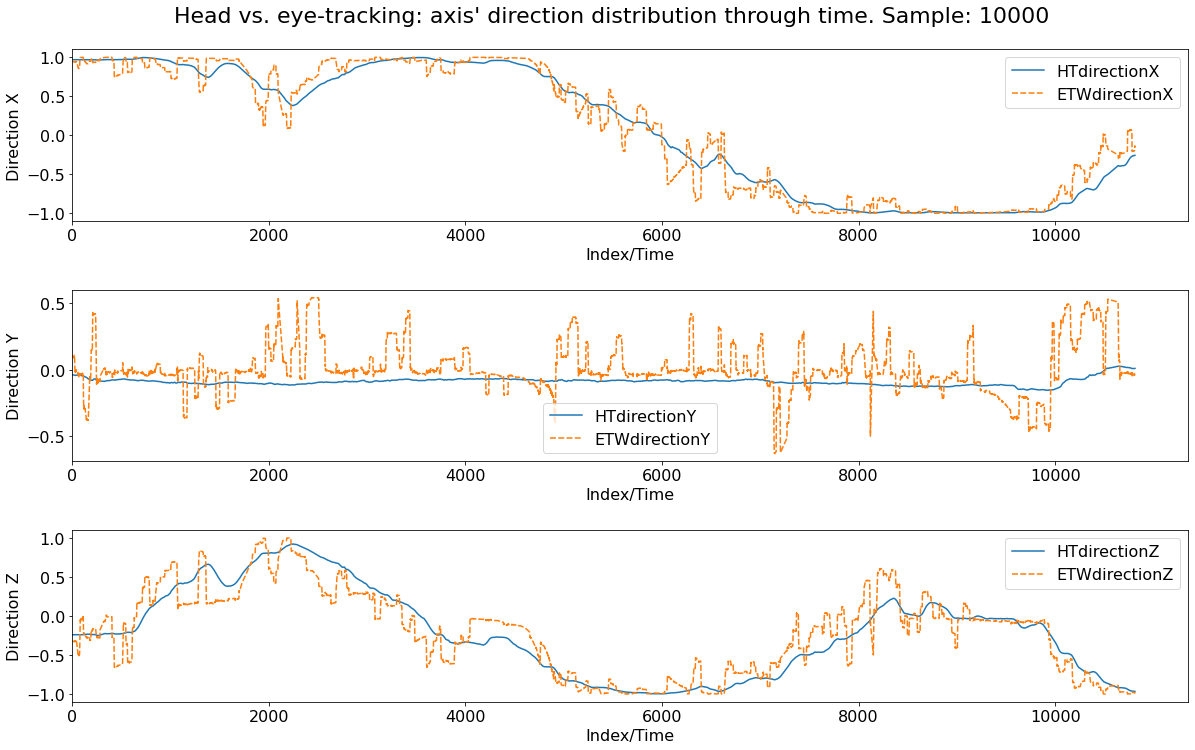

In [63]:
plot_direction_relational(filtered_df, save=True, sample=True)

In [65]:
# reset to new index
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
0            0.103    1.0        0.0         0.0    58.685047   547.54376   
1            0.105    1.0        0.0         0.0    58.685047   547.54376   
2            0.106    1.0        0.0         0.0    58.685047   547.54376   
3            0.107    1.0        0.0         0.0    58.685047   547.54376   
4            0.108    1.0        0.0         0.0    58.685047   547.54376   
...            ...    ...        ...         ...          ...         ...   
151855    2806.947    1.0        0.0         0.0  2865.602500   527.39570   
151856    2806.958    1.0        0.0         0.0  2865.613500   527.39575   
151857    2806.969    1.0        0.0         0.0  2865.624800   527.39570   
151858    2806.980    1.0        0.0         0.0  2865.635500   527.39500   
151859    2806.992    1.0        0.0         0.0  2865.646700   527.39465   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
0         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
1         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
2         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
3         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
4         2.049087   589.38650       0.942298       0.102535  ...   -0.026730   
...            ...         ...            ...            ...  ...         ...   
151855    2.039758   593.38170      -0.465525       0.053999  ...   -0.030184   
151856    2.039808   593.38184      -0.466018       0.055140  ...   -0.030173   
151857    2.040012   593.38245      -0.388782       0.076406  ...   -0.030771   
151858    2.039536   593.38130      -0.349532       0.084078  ...   -0.029431   
151859    2.039790   593.38210      -0.322776       0.063792  ...   -0.029964   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
0           0.086624       0.115112       0.989563  547.551208   2.045722   
1           0.086624       0.115112       0.989563  547.551208   2.045722   
2           0.086624       0.115112       0.989563  547.551208   2.045722   
3           0.086624       0.115112       0.989563  547.551208   2.045722   
4           0.086624       0.115112       0.989563  547.551208   2.045722   
...              ...            ...            ...         ...        ...   
151855      0.140884       0.020569       0.989807  527.346741   2.038607   
151856      0.140656       0.021255       0.989822  527.346741   2.038620   
151857      0.054550       0.033539       0.997940  527.346741   2.038561   
151858      0.011353       0.037384       0.999222  527.346741   2.038495   
151859     -0.017776       0.020844       0.999619  527.346741   2.038489   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
0       589.369141      0.969250     -0.037722     -0.243171  
1       589.369141      0.969250     -0.037722     -0.243171  
2       589.369141      0.969250     -0.037722     -0.243171  
3       589.369141      0.969250     -0.037722     -0.243171  
4       589.369141      0.969250     -0.037722     -0.243171  
...            ...           ...           ...           ...  
151855  593.383911     -0.341758      0.026704     -0.939409  
151856  593.384033     -0.342585      0.026923     -0.939102  
151857  593.384155     -0.343687      0.027117     -0.938693  
151858  593.384338     -0.344554      0.027179     -0.938373  
151859  593.384460     -0.345481      0.027203     -0.938032  

[151860 rows x 24 columns]

(-1.0, 1.0)

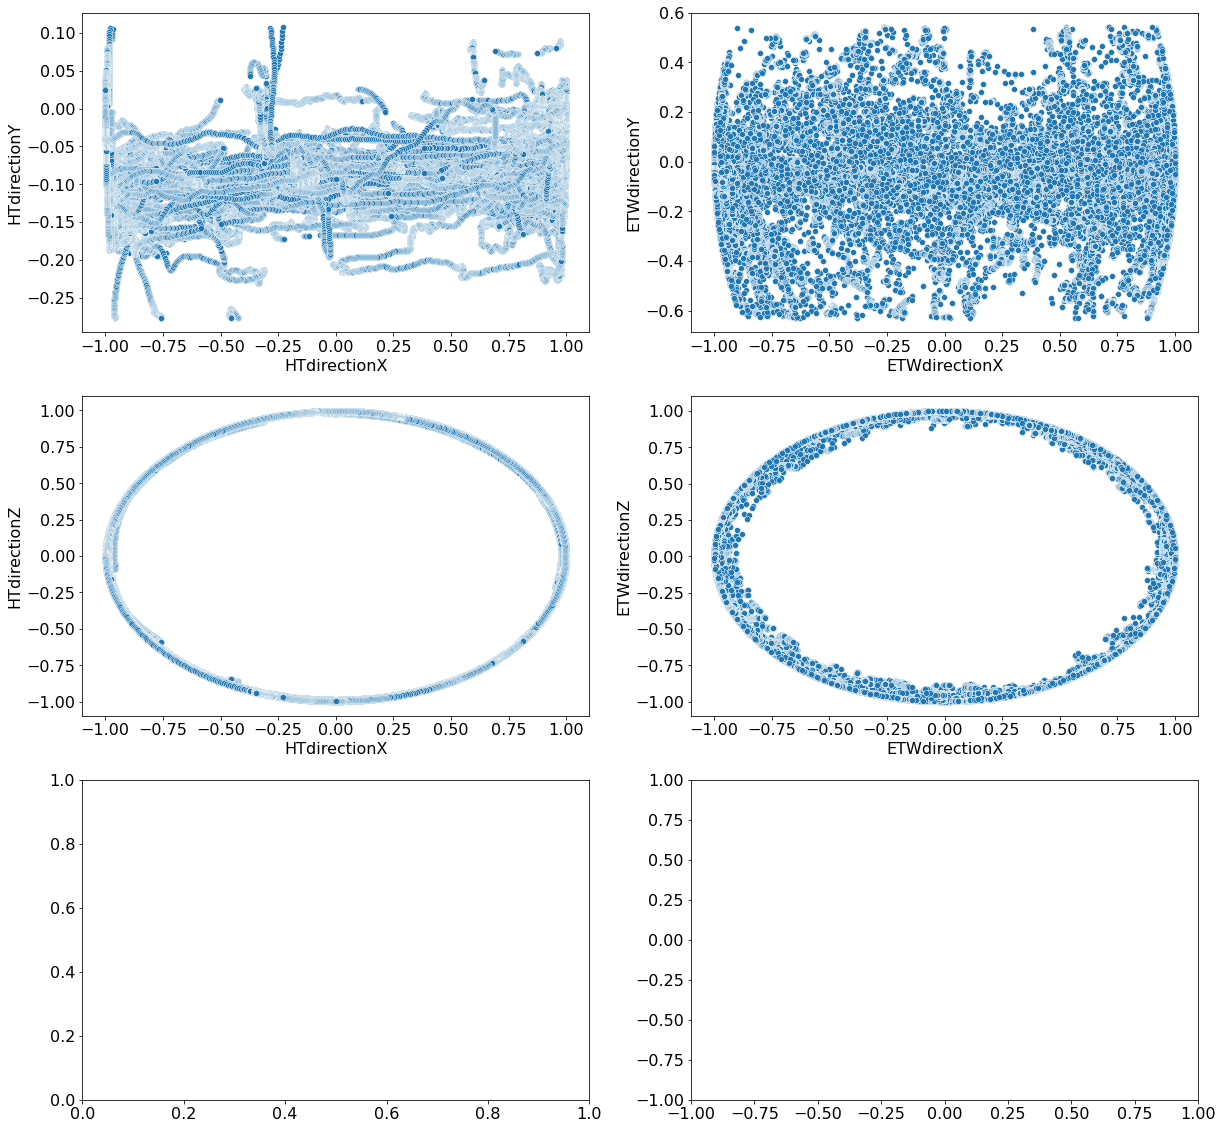

In [98]:
fig, ax = plt.subplots(3,2,figsize=(20, 20))
# origins
# sns.scatterplot(x='ETWoriginX', y='HToriginX', data=filtered_df, ax=ax[0,0])
# sns.scatterplot(x='ETWoriginZ', y='HToriginZ', data=filtered_df, ax=ax[1,0])
# sns.scatterplot(x='ETWoriginY', y='HToriginY', data=filtered_df, ax=ax[2,0])

# directions
sns.scatterplot(x='ETWdirectionX', y='ETWdirectionY', data=filtered_df, ax=ax[0,1])
sns.scatterplot(x='HTdirectionX', y='HTdirectionY', data=filtered_df, ax=ax[0,0])
sns.scatterplot(x='ETWdirectionX', y='ETWdirectionZ', data=filtered_df, ax=ax[1,1])
sns.scatterplot(x='HTdirectionX', y='HTdirectionZ', data=filtered_df, ax=ax[1,0])
# sns.scatterplot(x='ETWdirectionZ', y='HTdirectionZ', data=filtered_df, ax=ax[1,1])
# sns.scatterplot(x='ETWdirectionY', y='HTdirectionY', data=filtered_df, ax=ax[2,1])
ax[2,1].set_xlim(-1,1)
ax[2,1].set_ylim(-1,1)
# sns.kdeplot(data=filtered_df, x="ETWdirectionY", y="HTdirectionY", ax=ax[1,1])

In [135]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
# fig = plt.subplots(figsize=(20, 20))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(filtered_df['ETWdirectionX'],filtered_df['ETWdirectionZ'],filtered_df['ETWdirectionY'])
ax.set_zlim(-1,1)
# Make the grid
# x, y, z = np.meshgrid(filtered_df['ETWoriginX'].head(10),
#                       filtered_df['ETWoriginY'].head(10),
#                       filtered_df['ETWoriginZ'].head(10))
#
# # Make the direction data for the arrows
#
# u = filtered_df['ETWdirectionX'].head(10)
# v = filtered_df['ETWdirectionY'].head(10)
# w = filtered_df['ETWdirectionZ'].head(10)
# # u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
# # v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
# # w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
# #      np.sin(np.pi * z))
#
# ax.quiver(x, y, z, u, v, w, length=0.01, normalize=True)

# plt.show()

<IPython.core.display.Javascript object>

(-1.0, 1.0)

In [137]:
plt.figure(figsize=(10,10))
# fig = plt.subplots(figsize=(20, 20))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(filtered_df['HTdirectionX'],filtered_df['HTdirectionZ'],filtered_df['HTdirectionY'])
ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>

(-1.0, 1.0)

__TODOs__

Here are some ideas on what we can do to analyze the data:
1. linear regression showing the linear relationship between X, Z, Y axis directions of head and eye tracking.
2. Calculate the head and eye rotations (in degrees) around a gaze event and see how the mean head and eye mean rotations deffer or otherwise.
2.1  Analyze the means changes in head and eye rotations (in degrees) around a gaze event. It could be before, 50 ms in, 100 ms, 150 ms, 200 ms until late in the gaze event. (similar ideas as in Kuntzsch p. 30)
3. Can we use the head tracking data to predict gazes? With what accuracy/certainty?
4. How far away or around the object being gazed is the head direction of movement?
5. It looks like during free exploration the opposite behaviour to the baseball pitch occurs. During Baseball pitch, players tend to follow the trajectory of the ball with the head more that with the eyes; with the eye trying to cope with the ball position. During free exploration, is the head that tries to cope with the movements of the eyes.
6. How important are head movements to direct the gaze?
7. Can we predict head movement behavior during free exploration? does the head follow the eyes?
8. What is the distance or in what direction is the head moving with respect to the object gazed.

## 5. Combine CSV  files to include object names

In [31]:
hit_events_df = pd.read_csv(h81_path)
hit_events_df

HON  length     start       end  hits  distance
0        Validation_Plane (3)   0.021     0.000     0.021     3    12.533
1          baum ld0(enhanced)   0.184     0.103     0.287    23    52.303
2           streetLight2 (32)   0.001     0.308     0.309     2    34.634
3                  Col House1   0.002     0.330     0.332     2   119.621
4                  PlantPot_A   0.202     0.352     0.554    17    53.100
...                       ...     ...       ...       ...   ...       ...
15930  BridgeSlope_Simple (1)   0.111  2806.414  2806.525    11    23.696
15931              builds (1)   0.000  2806.536  2806.536     1    42.747
15932  BridgeSlope_Simple (1)   0.000  2806.547  2806.547     1    23.485
15933              builds (1)   0.000  2806.558  2806.558     1    43.116
15934  BridgeSlope_Simple (1)   0.212  2806.569  2806.781    20    23.414

[15935 rows x 6 columns]

In [50]:
hit_events_df['length'].sum() / 60

26.461599999999997

In [51]:
total_hits = len(hit_events_df.index)
total_hits

15935

In [52]:
# calculating gaze events
g_length = 0.260
gaze = hit_events_df[hit_events_df['length'] > g_length]
# we could exclude some objects but better not since we want them to appear in the video
# gaze = gaze[(gaze['HON'] != 'Lod_1') & (gaze['HON'] != 'Terrain')]
# there are 263 unique objects that were gazed at
# gaze['HON'].unique().size

In [53]:
# total time spent gazing at objects
gaze['length'].sum() / 60

19.008050000000004

In [54]:
# identify the faces
face_cond = gaze['HON'].str.contains('face', regex=False, na=False)
face_fixation = gaze[face_cond]
face_size = face_fixation.index.size
face_fixation

HON  length     start       end  hits  distance
143     face_81   0.366    12.225    12.591    34     5.394
147     face_81   0.667    13.069    13.736    61     5.358
161     face_81   0.366    15.536    15.902    34     5.263
163     face_81   0.267    16.001    16.268    25     5.209
181     face_81   0.501    19.099    19.600    46     5.249
...         ...     ...       ...       ...   ...       ...
14661   face_71   0.944  2654.270  2655.214    86     2.863
14663   face_71   0.400  2655.247  2655.647    37     1.456
14962  face_415   0.333  2684.424  2684.757    32    40.154
15228  face_622   0.311  2710.432  2710.743    29     1.631
15238  face_622   0.545  2711.531  2712.076    50     1.353

[143 rows x 6 columns]

In [55]:
face_fixation['length'].sum() /60

1.6981833333333332

In [56]:
unique_con = face_fixation['HON'].unique() # 44 were unique faces
# unique_con

In [57]:
total_hits = sum(hit_events_df['length']) / 60
gazes = sum(gaze['length']) / 60
total_faces = sum(face_fixation['length']) / 60

In [58]:
events_viz = pd.DataFrame({'Hit events': ['Face_gazes', 'Other_gazes', 'No_gaze'],
                           'Time (m)': [total_faces, gazes - total_faces, total_hits - gazes]})
events_viz

Hit events   Time (m)
0   Face_gazes   1.698183
1  Other_gazes  17.309867
2      No_gaze   7.453550

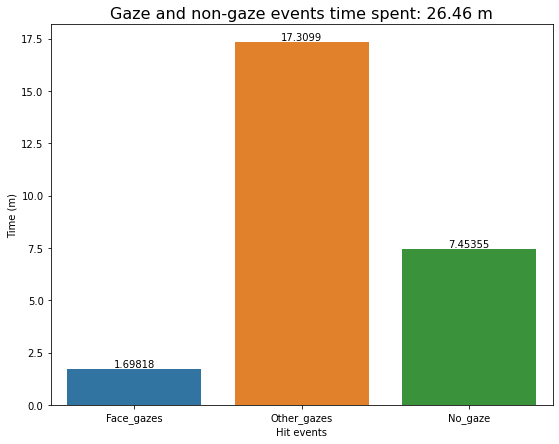

In [59]:
fig, ax = plt.subplots(1,1, figsize=(9, 7))

sns.barplot(y='Time (m)',x='Hit events', data=events_viz)

ax.bar_label(ax.containers[0],label_type='edge')
ax.set_title('Gaze and non-gaze events time spent: '+ str(round(events_viz['Time (m)'].sum(), 2)) + ' m', fontsize=16)
plt.savefig("Images/hit_events_time_spent.eps", format='eps', dpi=1200)

In [60]:
# remove distance outliers to calculate average distance of gazes
gaze_z_scores = scipy.stats.zscore(gaze[['distance']])
gaze_abs_zscores = np.abs(gaze_z_scores)

filtered_gaze_data = (gaze_abs_zscores < 3).all(axis = 1)

filtered_gaze_df = gaze[filtered_gaze_data]
filtered_gaze_df.reset_index(drop=True)

HON  length     start       end  hits  distance
0                      Lod_1   0.388     0.930     1.318    36    20.913
1                    Terrain   0.556     1.329     1.885    39     5.302
2                      Lod_1   0.522     2.196     2.718    48    22.159
3                      Lod_1   0.577     3.218     3.795    16    20.876
4                      Lod_1   0.834     3.950     4.784    76    21.305
...                      ...     ...       ...       ...   ...       ...
1601              builds (1)   1.022  2801.650  2802.672    76    47.539
1602          PlantPot_A (4)   0.355  2802.927  2803.282    33    22.116
1603                 Terrain   0.423  2803.293  2803.716    39    18.816
1604                 Terrain   1.521  2803.771  2805.292   138    13.897
1605  BridgeSlope_Simple (1)   0.988  2805.326  2806.314    90    23.521

[1606 rows x 6 columns]

In [61]:
events_avg = pd.DataFrame({'avg_distance_all': hit_events_df['distance'],
                           'avg_distance_gaze': gaze['distance'],
                           'avg_distance_gaze_zscore':filtered_gaze_df['distance'],
                           'avg_distance_faces':face_fixation['distance']})

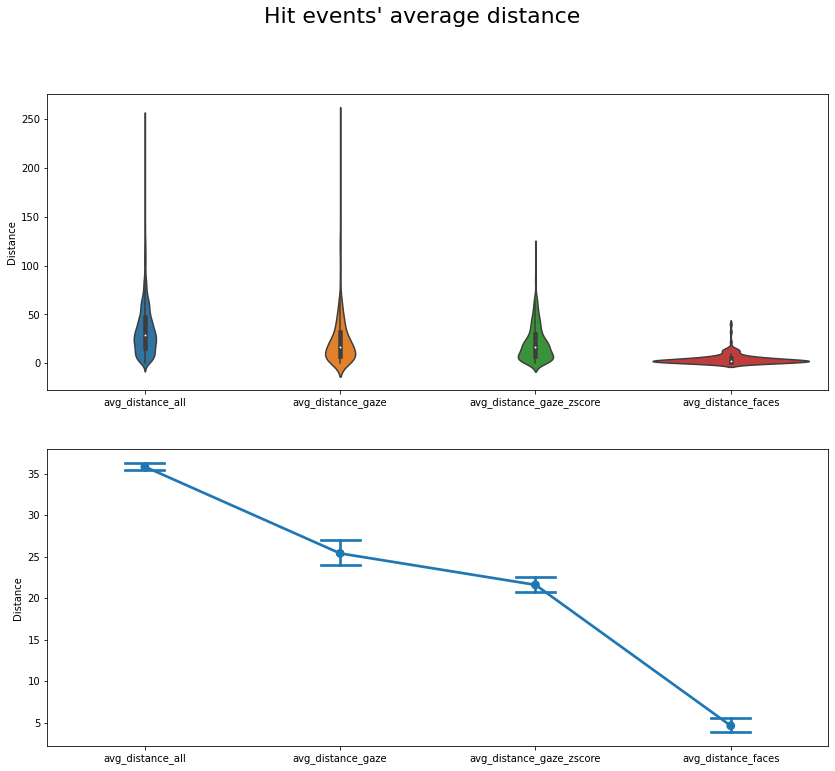

In [62]:
# average distance with and without outliers
avg_distance_all = hit_events_df[['distance']]
avg_distance_gaze = gaze[['distance']]
avg_distance_gaze_zscore = filtered_gaze_df[['distance']]

fig, ax = plt.subplots(2,1, figsize=(14, 12))

fig.suptitle("Hit events' average distance ", fontsize=22)

sns.violinplot(data=events_avg, ax=ax[0])
ax[0].set_ylabel('Distance')
sns.pointplot(data=events_avg, ax=ax[1], capsize=.2)
ax[1].set_ylabel('Distance')

plt.savefig("Images/hits_average_distance.eps", format='eps', dpi=1200)

In [64]:
def match_object(x):
    #print(x)
    hit = gaze[(gaze['start'] <= x) & (x <= gaze['end'])]
    if hit.index.size > 0:
        #print(hit['HON'].values[0])
        return hit['HON'].values[0]

gazed_df = filtered_df
gazed_df['HitObject'] = gazed_df['Unnamed: 0'].map(match_object)
gazed_df_cleaned = gazed_df[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ', 'HitObject', 'Unnamed: 0']]

# df contains only head and eye tracking origins and directions of movement, the name of objects that were gazed at, and the time.
gazed_df_cleaned

ETWoriginX  ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  \
0        547.54376    2.049087   589.38650       0.942298       0.102535   
1        547.54376    2.049087   589.38650       0.942298       0.102535   
2        547.54376    2.049087   589.38650       0.942298       0.102535   
3        547.54376    2.049087   589.38650       0.942298       0.102535   
4        547.54376    2.049087   589.38650       0.942298       0.102535   
...            ...         ...         ...            ...            ...   
151855   527.39570    2.039758   593.38170      -0.465525       0.053999   
151856   527.39575    2.039808   593.38184      -0.466018       0.055140   
151857   527.39570    2.040012   593.38245      -0.388782       0.076406   
151858   527.39500    2.039536   593.38130      -0.349532       0.084078   
151859   527.39465    2.039790   593.38210      -0.322776       0.063792   

        ETWdirectionZ   HToriginX  HToriginY   HToriginZ  HTdirectionX  \
0           -0.325898  547.551208   2.045722  589.369141      0.969250   
1           -0.325898  547.551208   2.045722  589.369141      0.969250   
2           -0.325898  547.551208   2.045722  589.369141      0.969250   
3           -0.325898  547.551208   2.045722  589.369141      0.969250   
4           -0.325898  547.551208   2.045722  589.369141      0.969250   
...               ...         ...        ...         ...           ...   
151855      -0.884111  527.346741   2.038607  593.383911     -0.341758   
151856      -0.883809  527.346741   2.038620  593.384033     -0.342585   
151857      -0.919556  527.346741   2.038561  593.384155     -0.343687   
151858      -0.934805  527.346741   2.038495  593.384338     -0.344554   
151859      -0.945271  527.346741   2.038489  593.384460     -0.345481   

        HTdirectionY  HTdirectionZ HitObject  Unnamed: 0  
0          -0.037722     -0.243171      None       0.103  
1          -0.037722     -0.243171      None       0.105  
2          -0.037722     -0.243171      None       0.106  
3          -0.037722     -0.243171      None       0.107  
4          -0.037722     -0.243171      None       0.108  
...              ...           ...       ...         ...  
151855      0.026704     -0.939409      None    2806.947  
151856      0.026923     -0.939102      None    2806.958  
151857      0.027117     -0.938693      None    2806.969  
151858      0.027179     -0.938373      None    2806.980  
151859      0.027203     -0.938032      None    2806.992  

[151860 rows x 14 columns]

In [102]:
# save dataframe
# gazed_df_cleaned.to_csv('/Users/johnmadrid/GitHub/VillageBehavioralWalk/BehavioralData/behavioral.csv', index=False)

In [104]:
#identify the fazes gazed to identify where in the walk did the face gaze happened
gazed_df_cleaned['Face'] = np.where(gazed_df_cleaned['HitObject'].str.contains('face', regex=False, na=False), True, False)

gazed_df_cleaned

ETWoriginX  ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  \
0        547.54376    2.049087   589.38650       0.942298       0.102535   
1        547.54376    2.049087   589.38650       0.942298       0.102535   
2        547.54376    2.049087   589.38650       0.942298       0.102535   
3        547.54376    2.049087   589.38650       0.942298       0.102535   
4        547.54376    2.049087   589.38650       0.942298       0.102535   
...            ...         ...         ...            ...            ...   
151734   527.39570    2.039758   593.38170      -0.465525       0.053999   
151735   527.39575    2.039808   593.38184      -0.466018       0.055140   
151736   527.39570    2.040012   593.38245      -0.388782       0.076406   
151737   527.39500    2.039536   593.38130      -0.349532       0.084078   
151738   527.39465    2.039790   593.38210      -0.322776       0.063792   

        ETWdirectionZ   HToriginX  HToriginY   HToriginZ  HTdirectionX  \
0           -0.325898  547.551208   2.045722  589.369141      0.969250   
1           -0.325898  547.551208   2.045722  589.369141      0.969250   
2           -0.325898  547.551208   2.045722  589.369141      0.969250   
3           -0.325898  547.551208   2.045722  589.369141      0.969250   
4           -0.325898  547.551208   2.045722  589.369141      0.969250   
...               ...         ...        ...         ...           ...   
151734      -0.884111  527.346741   2.038607  593.383911     -0.341758   
151735      -0.883809  527.346741   2.038620  593.384033     -0.342585   
151736      -0.919556  527.346741   2.038561  593.384155     -0.343687   
151737      -0.934805  527.346741   2.038495  593.384338     -0.344554   
151738      -0.945271  527.346741   2.038489  593.384460     -0.345481   

        HTdirectionY  HTdirectionZ HitObject  Unnamed: 0   Face  
0          -0.037722     -0.243171      None       0.103  False  
1          -0.037722     -0.243171      None       0.105  False  
2          -0.037722     -0.243171      None       0.106  False  
3          -0.037722     -0.243171      None       0.107  False  
4          -0.037722     -0.243171      None       0.108  False  
...              ...           ...       ...         ...    ...  
151734      0.026704     -0.939409      None    2806.947  False  
151735      0.026923     -0.939102      None    2806.958  False  
151736      0.027117     -0.938693      None    2806.969  False  
151737      0.027179     -0.938373      None    2806.980  False  
151738      0.027203     -0.938032      None    2806.992  False  

[151739 rows x 15 columns]

### 5.3 Reconstructed walked path

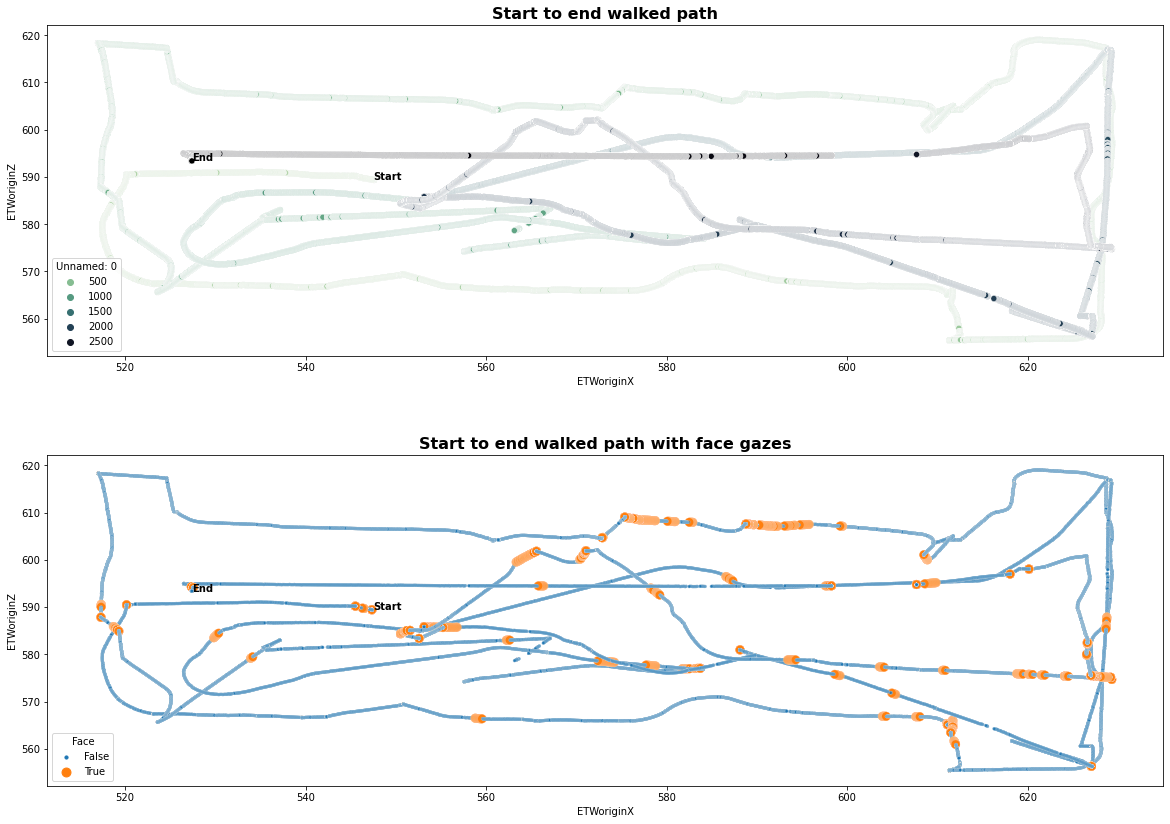

In [33]:
fig, ax = plt.subplots(2,1, figsize=(20, 14))
cmap = sns.cubehelix_palette(rot=-.5, dark=0, light=0.8, as_cmap=True)
# cmap = sns.cubehelix_palette(dark=0, light=07, as_cmap=True)


sns.scatterplot(x='ETWoriginX', y='ETWoriginZ', hue='Unnamed: 0',palette=cmap, alpha=1, data=filtered_df, ax=ax[0])

sns.scatterplot(x='ETWoriginX', y='ETWoriginZ', data=gazed_df_cleaned, hue='Face', alpha=0.3, size='Face', sizes=(80,10), ax=ax[1])
fig.subplots_adjust(hspace=0.3)

col_title = ['Start to end walked path', 'Start to end walked path with face gazes']
for i, ax in enumerate(ax.flatten()[:2]):
    ax.set_title(col_title[i], fontweight='bold', fontsize=16)
    ax.text(gazed_df_cleaned['ETWoriginX'].iloc[0], gazed_df_cleaned['ETWoriginZ'].iloc[0], "Start", horizontalalignment='left', size='medium', color='black', weight='semibold')
    ax.text(gazed_df_cleaned['ETWoriginX'].iloc[-1], gazed_df_cleaned['ETWoriginZ'].iloc[-1], "End", horizontalalignment='left', size='medium', color='black', weight='semibold')
    i += 1

# plt.savefig("Images/start_end_walked_path.eps", format='eps', dpi=1200)

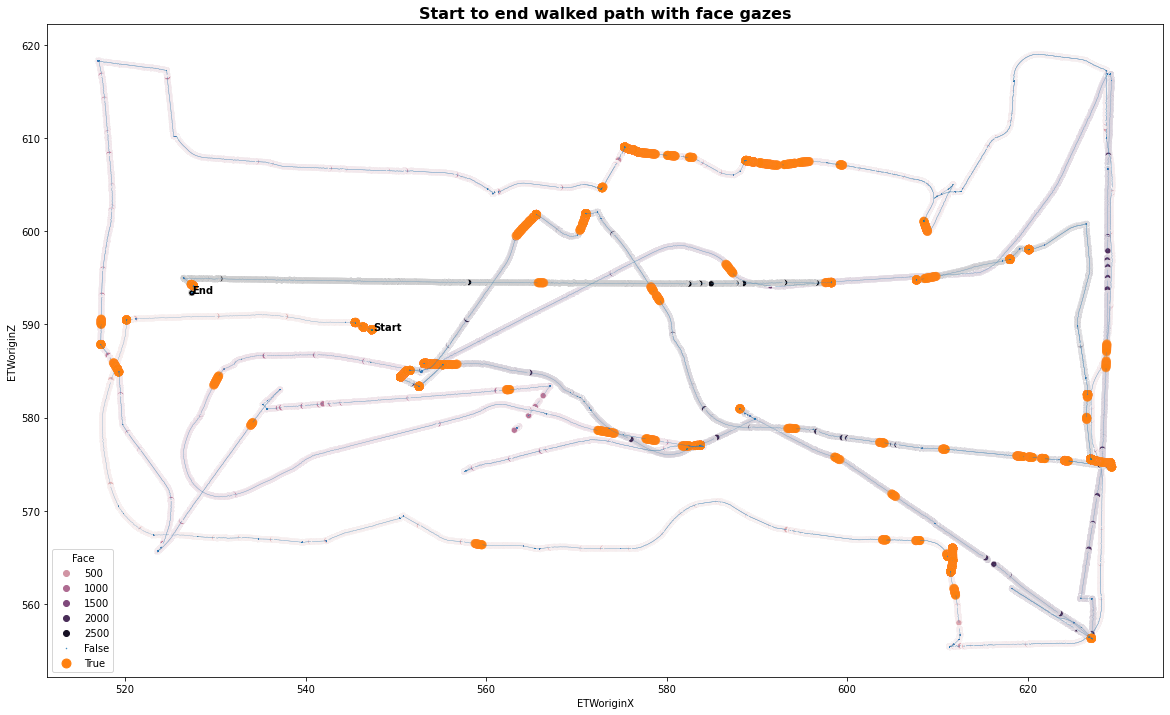

In [27]:
fig, ax = plt.subplots(1,1, figsize=(20, 12))

# cmap = sns.cubehelix_palette(dark=0, light=0.8, as_cmap=True)
cmap = sns.cubehelix_palette(dark=0, light=0.8, as_cmap=True)
sns.scatterplot(x='ETWoriginX', y='ETWoriginZ', hue='Unnamed: 0',palette=cmap, alpha=1, data=filtered_df, ax=ax)

gazed_df_cleaned_only_face = gazed_df_cleaned[gazed_df_cleaned['Face']]

sns.scatterplot(x='ETWoriginX', y='ETWoriginZ', data=gazed_df_cleaned, hue='Face', alpha=0.3, size='Face', sizes=(80,0.2), ax=ax)

ax.text(gazed_df_cleaned['ETWoriginX'].iloc[0], gazed_df_cleaned['ETWoriginZ'].iloc[0], "Start", horizontalalignment='left', size='medium', color='black', weight='semibold')
ax.text(gazed_df_cleaned['ETWoriginX'].iloc[-1], gazed_df_cleaned['ETWoriginZ'].iloc[-1], "End", horizontalalignment='left', size='medium', color='black', weight='semibold')

ax.set_title('Start to end walked path with face gazes', fontweight='bold', fontsize=16)

# plt.savefig("Images/start_end_walked_path_faces.eps", format='eps', dpi=1200)
# plt.savefig("Images/start_end_walked_path_faces.jpeg", format='jpeg', dpi=1200)

<AxesSubplot:xlabel='ETWdirectionX', ylabel='ETWdirectionZ'>

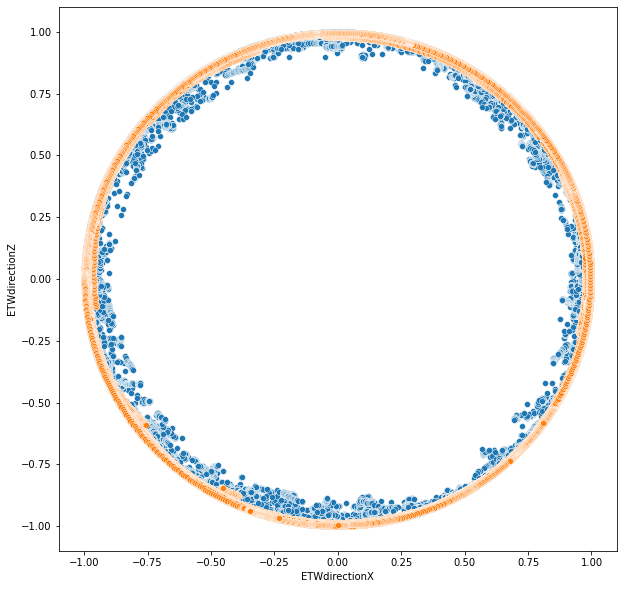

In [105]:
# THIS CAN BE OMITTED
# if plotting the origin x and z axis data we get the walked path, what do we get when potting the directions?
fg, ax = plt. subplots(1,1, figsize=(10,10))

sns.scatterplot(x=gazed_df_cleaned['ETWdirectionX'], y = gazed_df_cleaned['ETWdirectionZ'], data=gazed_df_cleaned)
sns.scatterplot(x=gazed_df_cleaned['HTdirectionX'], y = gazed_df_cleaned['HTdirectionZ'], data=gazed_df_cleaned)

# 6. Other participant
Same process will be done for a second participant

In [5]:
# load data
df_b6c = pd.read_csv(b6c_path)
# delete NaN
df_b6c_clean = df_b6c.dropna().reset_index(drop=True)
df_b6c_clean


Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
0            0.000    0.0        0.0         0.0    59.381004     0.00000   
1            0.014    0.0        0.0         0.0    59.392310     0.00000   
2            0.016    0.0        0.0         0.0    59.392310     0.00000   
3            0.078    1.0        0.0         0.0    59.406740   547.49610   
4            0.081    1.0        0.0         0.0    59.406740   547.49610   
...            ...    ...        ...         ...          ...         ...   
162165    2001.453    1.0        0.0         0.0  2060.838100   620.02124   
162166    2001.464    1.0        0.0         0.0  2060.849000   620.04596   
162167    2001.475    1.0        0.0         0.0  2060.860000   620.04690   
162168    2001.486    1.0        0.0         0.0  2060.871600   620.01170   
162169    2001.497    1.0        0.0         0.0  2060.882600   620.00714   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
0         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
1         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
2         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
3         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
4         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
...            ...         ...            ...            ...  ...         ...   
162165    2.053515   579.34625       0.762210       0.354466  ...   -0.024661   
162166    2.055768   579.31995       0.780425       0.393581  ...   -0.023935   
162167    2.055832   579.31940       0.786147       0.403381  ...   -0.023591   
162168    2.052785   579.35660       0.757769       0.366629  ...   -0.024780   
162169    2.052388   579.36145       0.747583       0.365741  ...   -0.024977   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
0           0.000000       0.000000       1.000000   13.424127  12.252352   
1           0.000000       0.000000       1.000000  547.539368   1.994677   
2           0.000000       0.000000       1.000000  547.539368   1.994677   
3           0.135025       0.063370       0.988800  547.519348   1.994626   
4           0.135025       0.063370       0.988800  547.519348   1.994626   
...              ...            ...            ...         ...        ...   
162165      0.082108       0.023773       0.996338  620.046936   2.042575   
162166      0.123779       0.054276       0.990814  620.046936   2.042576   
162167      0.136795       0.062057       0.988647  620.046997   2.042635   
162168      0.078186       0.033249       0.996368  620.046997   2.042630   
162169      0.061600       0.032669       0.997559  620.047058   2.042660   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
0        20.480429      0.673984      0.134481      0.726403  
1       588.803467      0.673881      0.134625      0.726471  
2       588.803467      0.673881      0.134625      0.726471  
3       588.781799      0.673625      0.135061      0.726628  
4       588.781799      0.673625      0.135061      0.726628  
...            ...           ...           ...           ...  
162165  579.334900      0.714221      0.240244      0.657397  
162166  579.334900      0.714255      0.240241      0.657361  
162167  579.334961      0.714300      0.240353      0.657272  
162168  579.334961      0.714321      0.240364      0.657245  
162169  579.334961      0.714254      0.240306      0.657339  

[162170 rows x 24 columns]

In [20]:
df_b6c

Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
0            0.000    0.0        0.0         0.0    59.381004     0.00000   
1            0.014    0.0        0.0         0.0    59.392310     0.00000   
2            0.016    0.0        0.0         0.0    59.392310     0.00000   
3            0.078    1.0        0.0         0.0    59.406740   547.49610   
4            0.079    1.0        0.0         0.0    59.406740   547.49610   
...            ...    ...        ...         ...          ...         ...   
162385    2001.453    1.0        0.0         0.0  2060.838100   620.02124   
162386    2001.464    1.0        0.0         0.0  2060.849000   620.04596   
162387    2001.475    1.0        0.0         0.0  2060.860000   620.04690   
162388    2001.486    1.0        0.0         0.0  2060.871600   620.01170   
162389    2001.497    1.0        0.0         0.0  2060.882600   620.00714   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
0         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
1         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
2         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
3         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
4         2.003454   588.82540       0.760821       0.258788  ...         NaN   
...            ...         ...            ...            ...  ...         ...   
162385    2.053515   579.34625       0.762210       0.354466  ...   -0.024661   
162386    2.055768   579.31995       0.780425       0.393581  ...   -0.023935   
162387    2.055832   579.31940       0.786147       0.403381  ...   -0.023591   
162388    2.052785   579.35660       0.757769       0.366629  ...   -0.024780   
162389    2.052388   579.36145       0.747583       0.365741  ...   -0.024977   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
0           0.000000       0.000000       1.000000   13.424127  12.252352   
1           0.000000       0.000000       1.000000  547.539368   1.994677   
2           0.000000       0.000000       1.000000  547.539368   1.994677   
3           0.135025       0.063370       0.988800  547.519348   1.994626   
4                NaN            NaN            NaN         NaN        NaN   
...              ...            ...            ...         ...        ...   
162385      0.082108       0.023773       0.996338  620.046936   2.042575   
162386      0.123779       0.054276       0.990814  620.046936   2.042576   
162387      0.136795       0.062057       0.988647  620.046997   2.042635   
162388      0.078186       0.033249       0.996368  620.046997   2.042630   
162389      0.061600       0.032669       0.997559  620.047058   2.042660   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
0        20.480429      0.673984      0.134481      0.726403  
1       588.803467      0.673881      0.134625      0.726471  
2       588.803467      0.673881      0.134625      0.726471  
3       588.781799      0.673625      0.135061      0.726628  
4              NaN           NaN           NaN           NaN  
...            ...           ...           ...           ...  
162385  579.334900      0.714221      0.240244      0.657397  
162386  579.334900      0.714255      0.240241      0.657361  
162387  579.334961      0.714300      0.240353      0.657272  
162388  579.334961      0.714321      0.240364      0.657245  
162389  579.334961      0.714254      0.240306      0.657339  

[162390 rows x 24 columns]

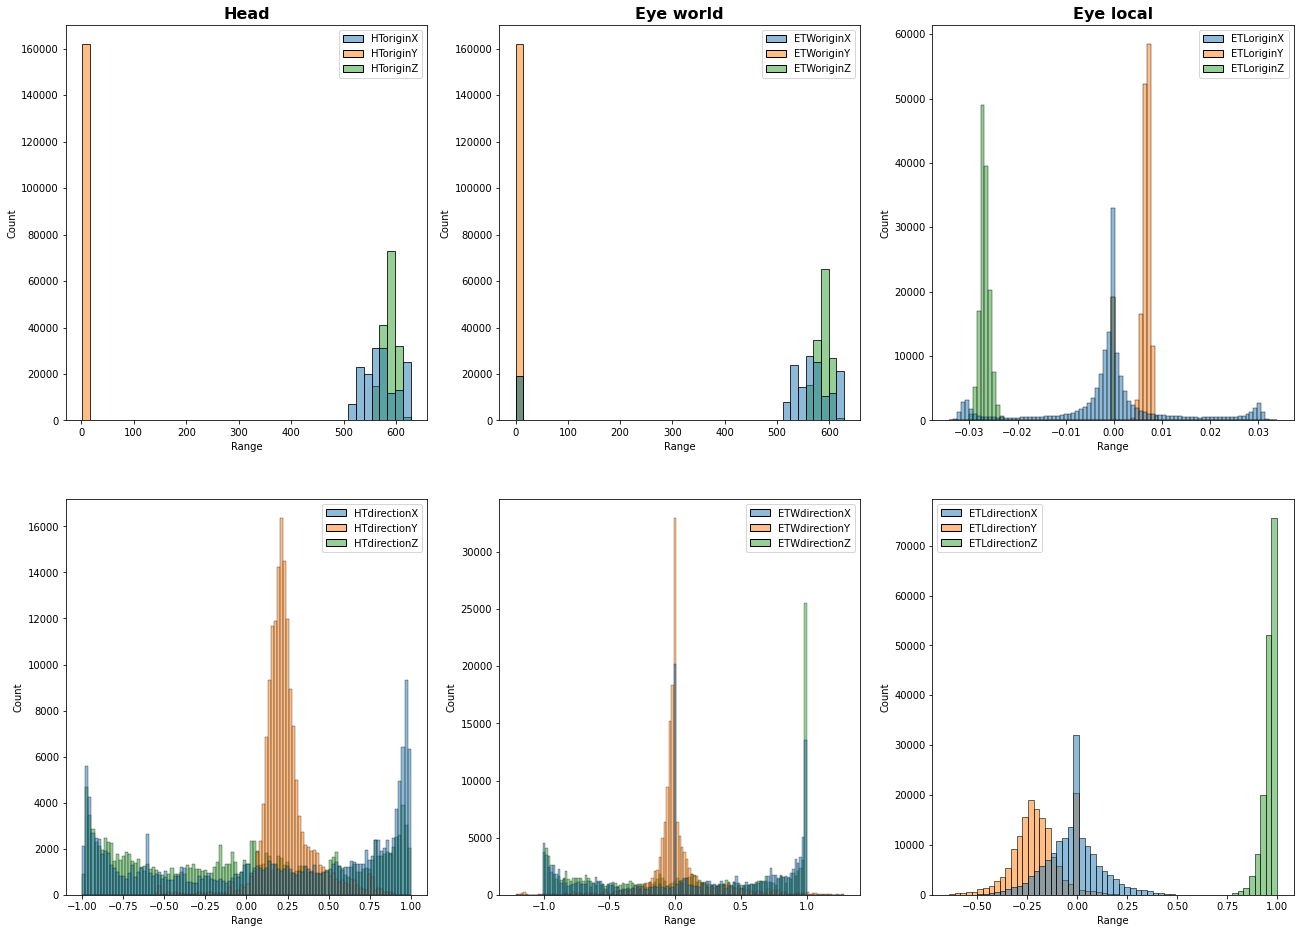

In [67]:
vis_count_distr(df_b6c_clean)

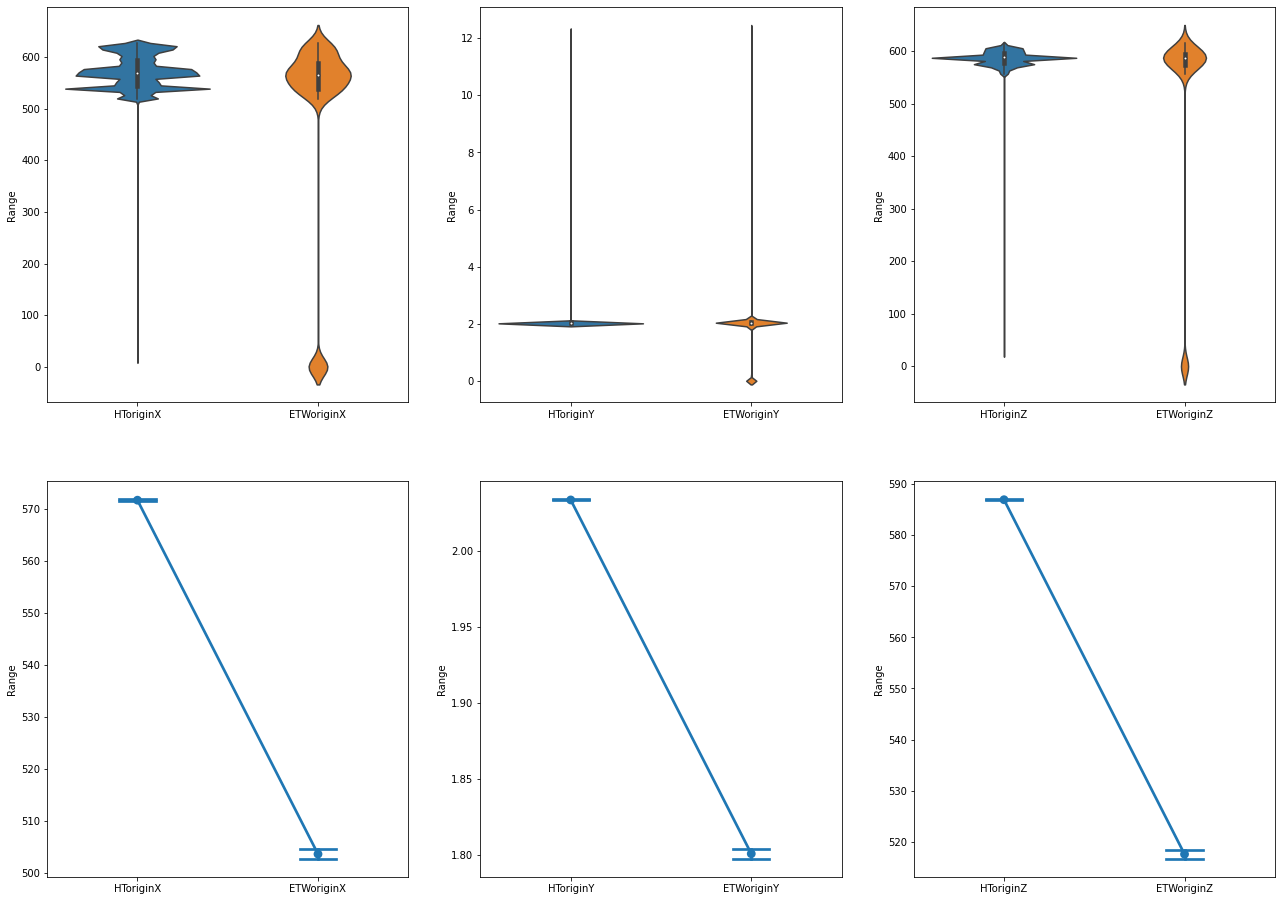

In [68]:
plot_origin_mean(df_b6c_clean)

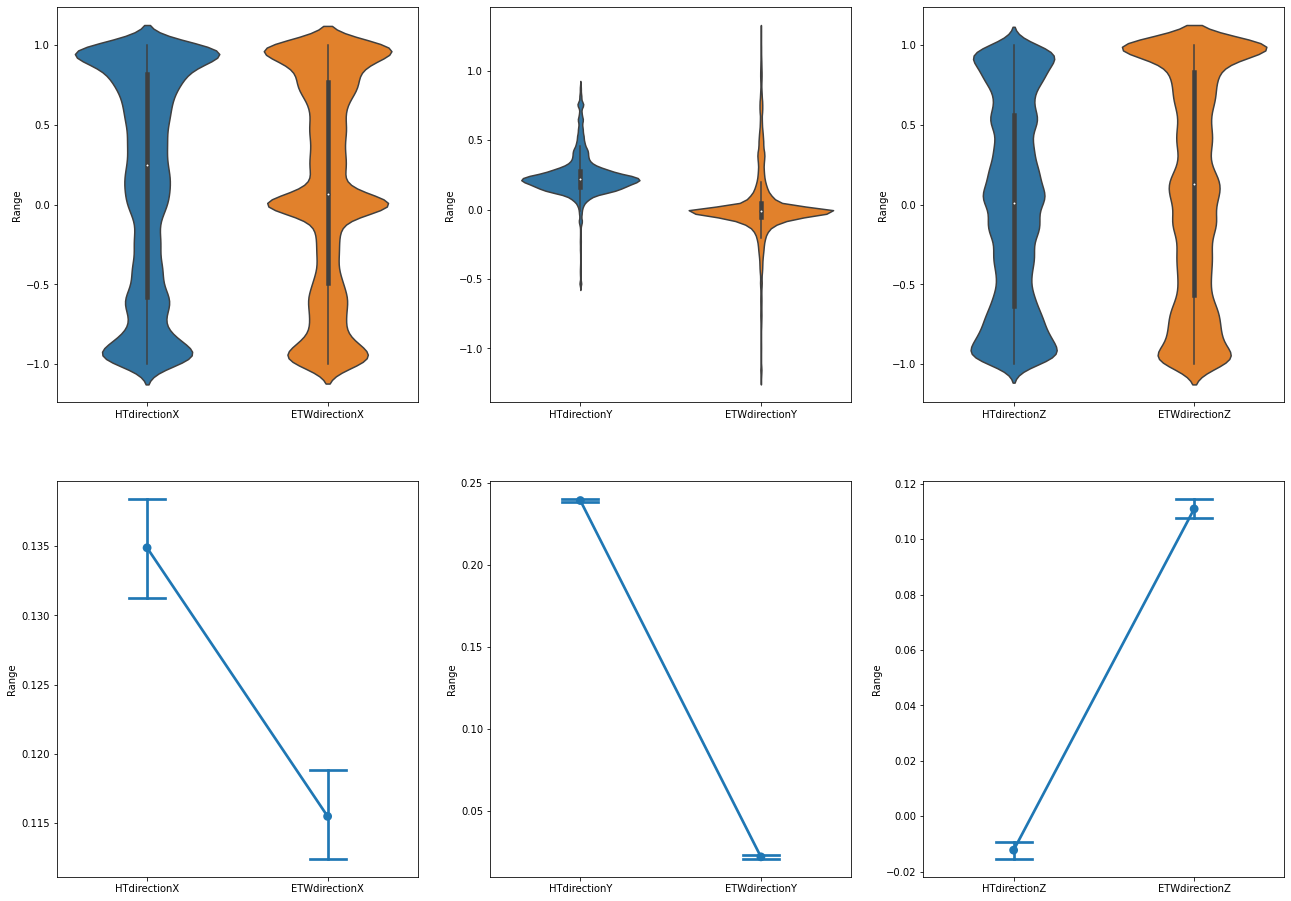

In [113]:
plot_directions_mean(df_b6c_clean)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


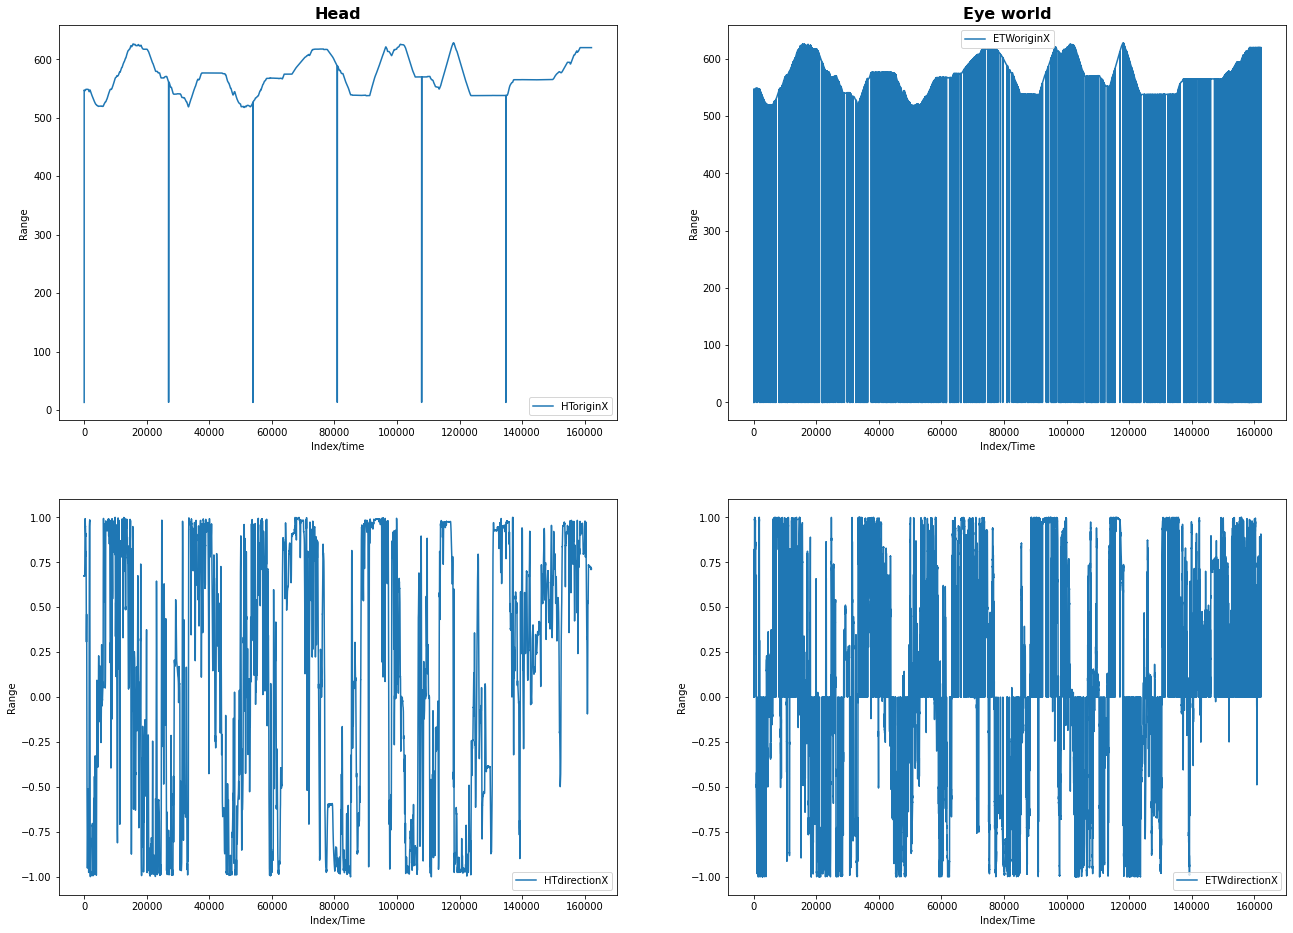

In [69]:
vis_x_outliers(df_b6c_clean)

In [7]:
# filter by valid trials
df_b6c_clean = filter_valid(df_b6c_clean)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


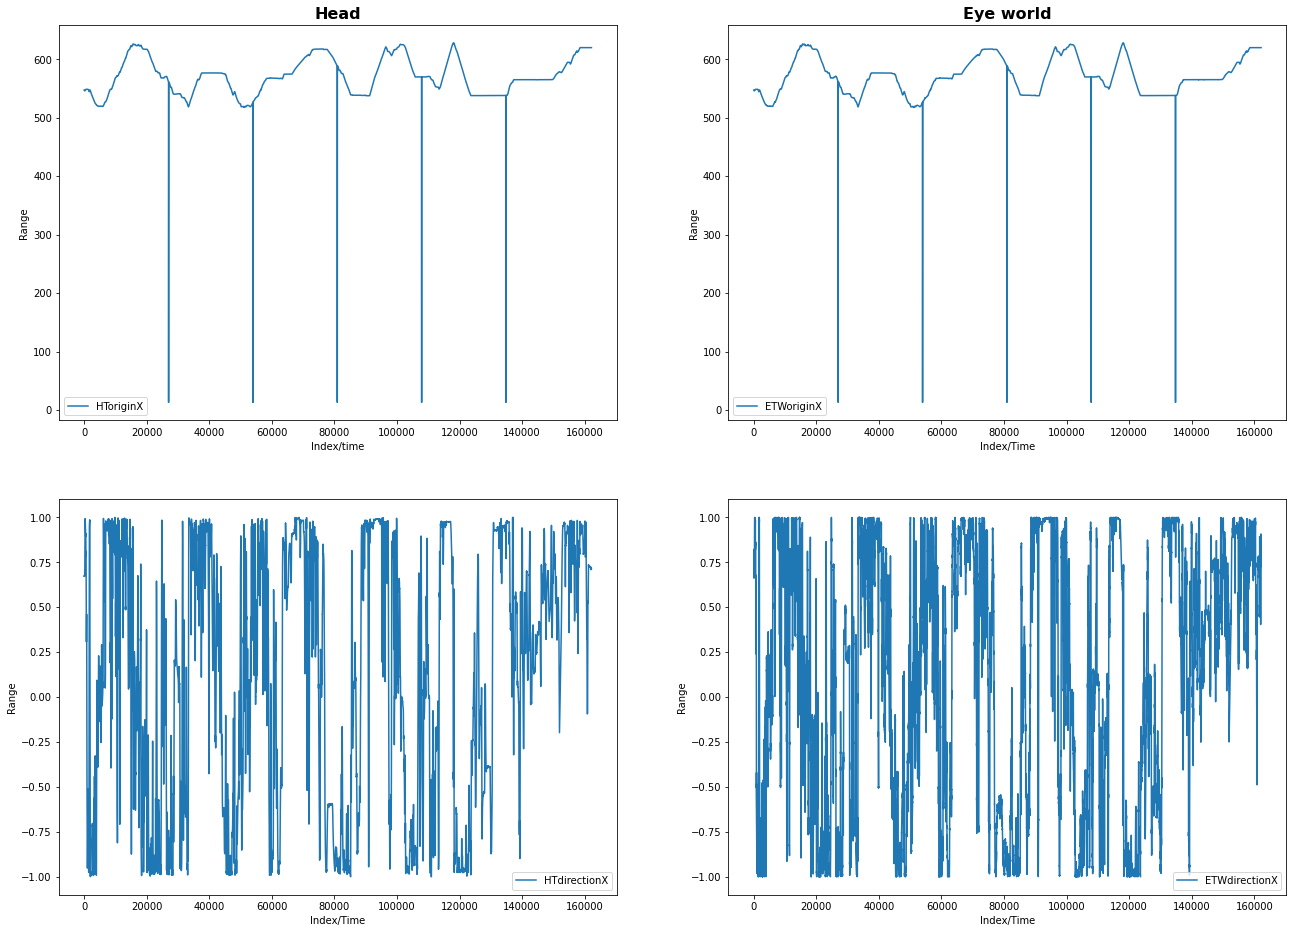

In [10]:
vis_x_outliers(df_b6c_clean)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


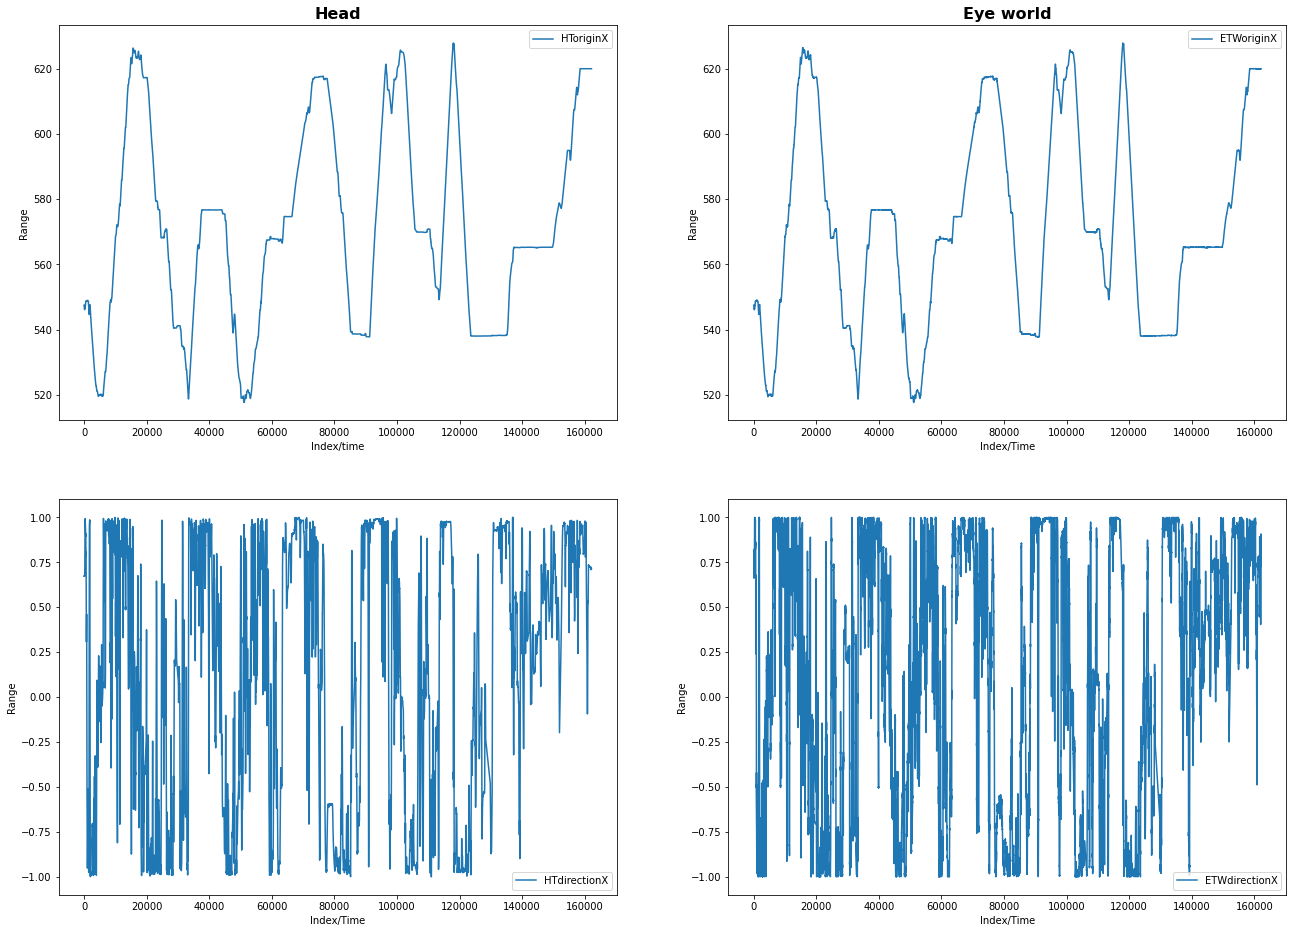

In [14]:
df_b6_filtered = cal_zscores(df_b6c_clean)
vis_x_outliers(df_b6_filtered)

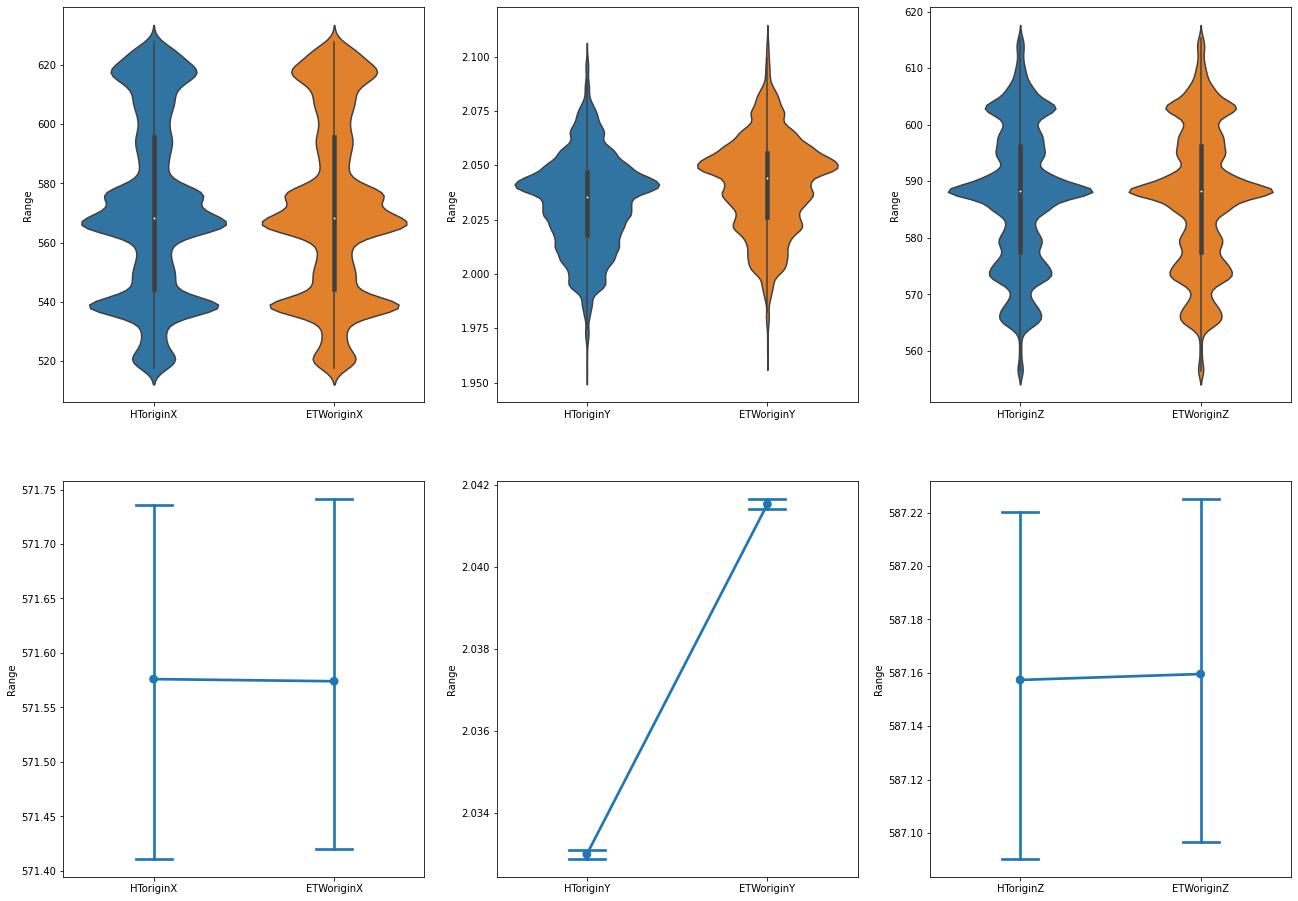

In [72]:
plot_origin_mean(df_b6_filtered)

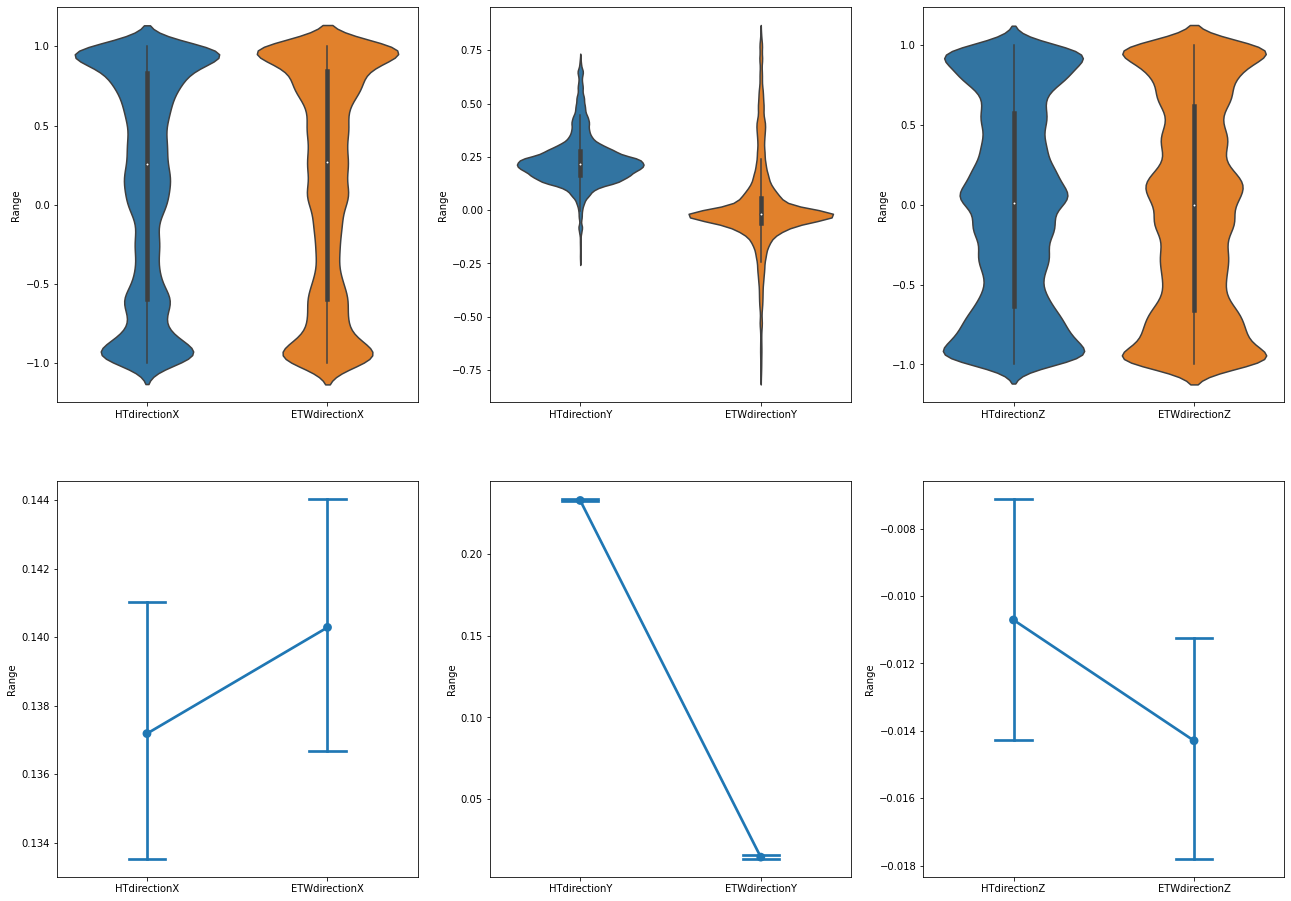

In [73]:
plot_directions_mean(df_b6_filtered)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


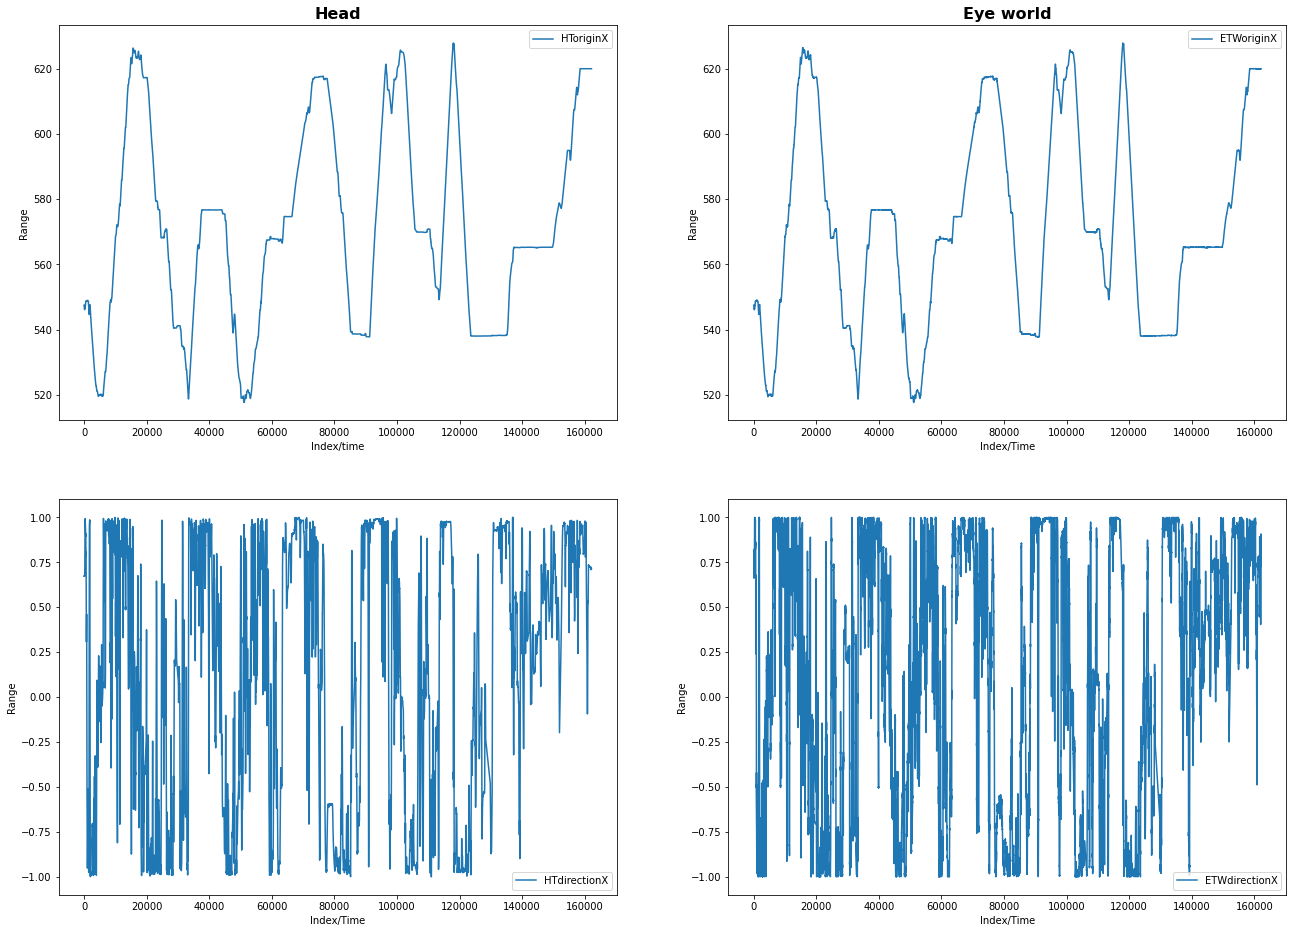

In [74]:
vis_x_outliers(df_b6_filtered)

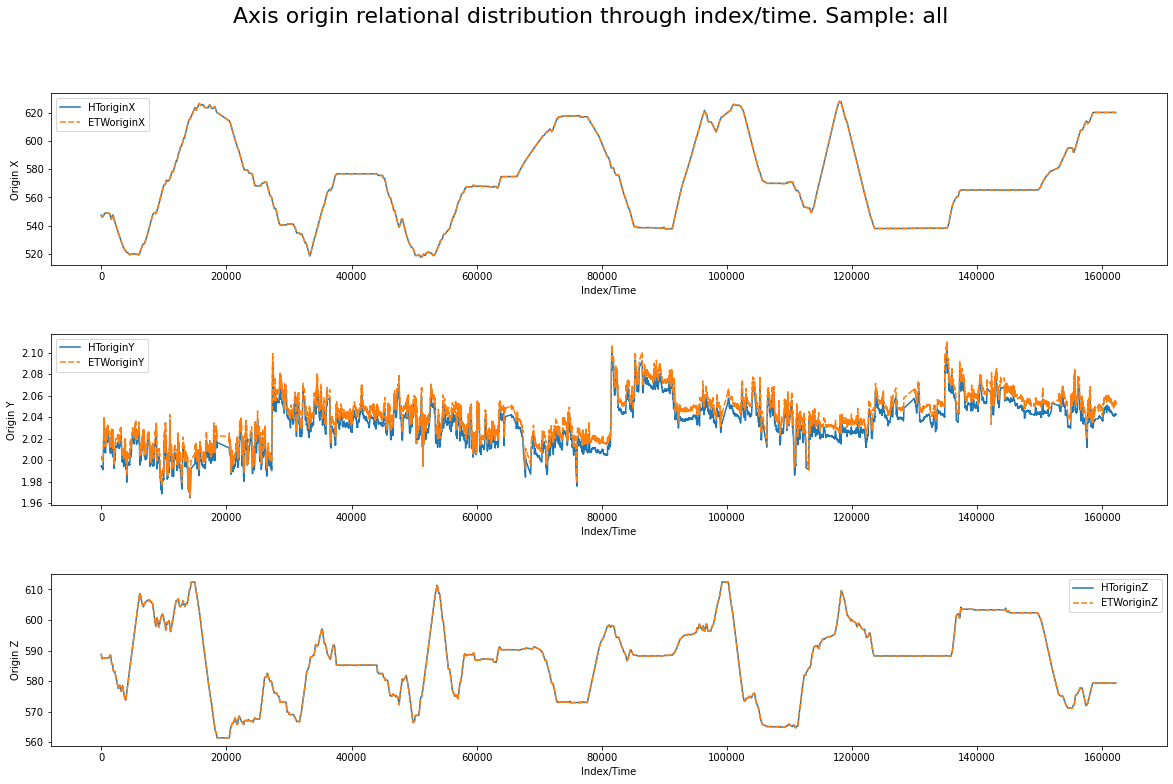

In [83]:
plot_origin_relational(df_b6_filtered, save=False, sample=False, n_sample="all")

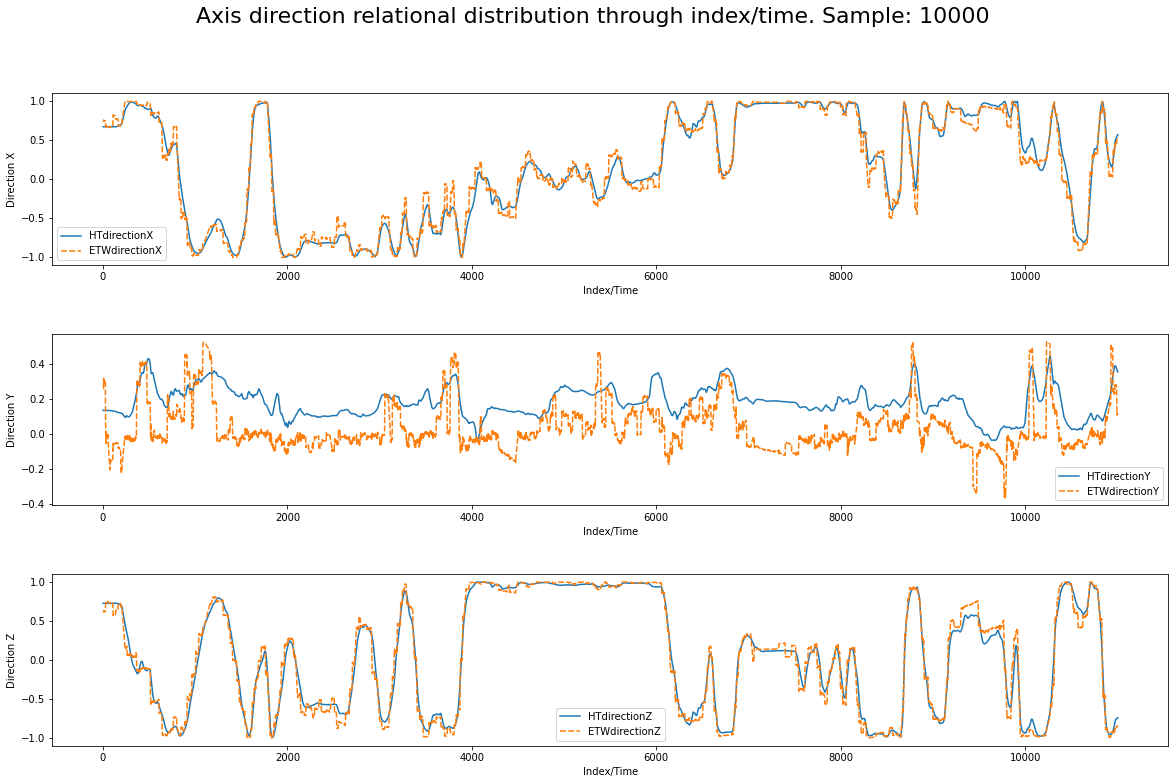

In [84]:
plot_direction_relational(df_b6_filtered, save=False,sample=True, n_sample=10000)

In [36]:
# select the rows to calculate z-scores on and call zscore function from stats
df_b6_fil = df_b6c_clean[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ']]
df_b6_fil

ETWoriginX  ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  \
0          0.00000    0.000000     0.00000       0.000000       0.000000   
1          0.00000    0.000000     0.00000       0.000000       0.000000   
2          0.00000    0.000000     0.00000       0.000000       0.000000   
3        547.49610    2.003454   588.82540       0.760821       0.258788   
4        547.49610    2.003454   588.82540       0.760821       0.258788   
...            ...         ...         ...            ...            ...   
162165   620.02124    2.053515   579.34625       0.762210       0.354466   
162166   620.04596    2.055768   579.31995       0.780425       0.393581   
162167   620.04690    2.055832   579.31940       0.786147       0.403381   
162168   620.01170    2.052785   579.35660       0.757769       0.366629   
162169   620.00714    2.052388   579.36145       0.747583       0.365741   

        ETWdirectionZ   HToriginX  HToriginY   HToriginZ  HTdirectionX  \
0            1.000000   13.424127  12.252352   20.480429      0.673984   
1            1.000000  547.539368   1.994677  588.803467      0.673881   
2            1.000000  547.539368   1.994677  588.803467      0.673881   
3            0.619537  547.519348   1.994626  588.781799      0.673625   
4            0.619537  547.519348   1.994626  588.781799      0.673625   
...               ...         ...        ...         ...           ...   
162165       0.590811  620.046936   2.042575  579.334900      0.714221   
162166       0.551948  620.046936   2.042576  579.334900      0.714255   
162167       0.539761  620.046997   2.042635  579.334961      0.714300   
162168       0.592364  620.046997   2.042630  579.334961      0.714321   
162169       0.605482  620.047058   2.042660  579.334961      0.714254   

        HTdirectionY  HTdirectionZ  
0           0.134481      0.726403  
1           0.134625      0.726471  
2           0.134625      0.726471  
3           0.135061      0.726628  
4           0.135061      0.726628  
...              ...           ...  
162165      0.240244      0.657397  
162166      0.240241      0.657361  
162167      0.240353      0.657272  
162168      0.240364      0.657245  
162169      0.240306      0.657339  

[162170 rows x 12 columns]

In [39]:
# array containing calculated z-score for each value in tha dataset
z_scores = scipy.stats.zscore(df_b6_fil)
z_scores

array([[-2.69875991, -2.70742394, -2.72516582, ...,  0.76945427,
        -0.67244851,  1.15455408],
       [-2.69875991, -2.70742394, -2.72516582, ...,  0.76930727,
        -0.67152293,  1.15466159],
       [-2.69875991, -2.70742394, -2.72516582, ...,  0.76930727,
        -0.67152293,  1.15466159],
       ...,
       [ 0.62352795,  0.38342704,  0.32512647, ...,  0.82699638,
         0.00726193,  1.04649487],
       [ 0.62333935,  0.37884571,  0.32532234, ...,  0.82702633,
         0.00733397,  1.04645285],
       [ 0.62331491,  0.37824884,  0.32534787, ...,  0.82693104,
         0.00695838,  1.04659959]])

In [42]:
# convert each value in the dataset to its absolute value
abs_zscores = np.abs(z_scores)
# an outlier is defined as a number that is higher than three standard deviations from the mean
filtered_data = (abs_zscores < 2).all(axis = 1)
filtered_data

array([False, False, False, ...,  True,  True,  True])

In [184]:
filtered_data

array([False,  True,  True, ...,  True,  True,  True])

In [188]:
# filter the cleaned df with the results from the outliers
filtered_df = df_b6c_clean[filtered_data]
# reset index
filtered_df.reset_index(drop=True)

Unnamed: 0  valid  leftBlink  rightBlink     ETWTime  ETWoriginX  \
0            0.014    0.0        0.0         0.0    59.39231     0.00000   
1            0.016    0.0        0.0         0.0    59.39231     0.00000   
2            0.078    1.0        0.0         0.0    59.40674   547.49610   
3            0.081    1.0        0.0         0.0    59.40674   547.49610   
4            0.081    1.0        0.0         0.0    59.40674   547.49610   
...            ...    ...        ...         ...         ...         ...   
155728    2001.453    1.0        0.0         0.0  2060.83810   620.02124   
155729    2001.464    1.0        0.0         0.0  2060.84900   620.04596   
155730    2001.475    1.0        0.0         0.0  2060.86000   620.04690   
155731    2001.486    1.0        0.0         0.0  2060.87160   620.01170   
155732    2001.497    1.0        0.0         0.0  2060.88260   620.00714   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
0         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
1         0.000000     0.00000       0.000000       0.000000  ...    0.000000   
2         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
3         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
4         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
...            ...         ...            ...            ...  ...         ...   
155728    2.053515   579.34625       0.762210       0.354466  ...   -0.024661   
155729    2.055768   579.31995       0.780425       0.393581  ...   -0.023935   
155730    2.055832   579.31940       0.786147       0.403381  ...   -0.023591   
155731    2.052785   579.35660       0.757769       0.366629  ...   -0.024780   
155732    2.052388   579.36145       0.747583       0.365741  ...   -0.024977   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
0           0.000000       0.000000       1.000000  547.539368   1.994677   
1           0.000000       0.000000       1.000000  547.539368   1.994677   
2           0.135025       0.063370       0.988800  547.519348   1.994626   
3           0.135025       0.063370       0.988800  547.519348   1.994626   
4           0.135025       0.063370       0.988800  547.519348   1.994626   
...              ...            ...            ...         ...        ...   
155728      0.082108       0.023773       0.996338  620.046936   2.042575   
155729      0.123779       0.054276       0.990814  620.046936   2.042576   
155730      0.136795       0.062057       0.988647  620.046997   2.042635   
155731      0.078186       0.033249       0.996368  620.046997   2.042630   
155732      0.061600       0.032669       0.997559  620.047058   2.042660   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
0       588.803467      0.673881      0.134625      0.726471  
1       588.803467      0.673881      0.134625      0.726471  
2       588.781799      0.673625      0.135061      0.726628  
3       588.781799      0.673625      0.135061      0.726628  
4       588.781799      0.673625      0.135061      0.726628  
...            ...           ...           ...           ...  
155728  579.334900      0.714221      0.240244      0.657397  
155729  579.334900      0.714255      0.240241      0.657361  
155730  579.334961      0.714300      0.240353      0.657272  
155731  579.334961      0.714321      0.240364      0.657245  
155732  579.334961      0.714254      0.240306      0.657339  

[155733 rows x 24 columns]

In [97]:
# remove outliers
df_b6c_filtered = cal_zscores(df_b6c_clean)
df_b6c_filtered

Unnamed: 0  valid  leftBlink  rightBlink      ETWTime  ETWoriginX  \
3            0.078    1.0        0.0         0.0    59.406740   547.49610   
4            0.081    1.0        0.0         0.0    59.406740   547.49610   
5            0.081    1.0        0.0         0.0    59.406740   547.49610   
6            0.082    1.0        0.0         0.0    59.406740   547.49610   
7            0.091    1.0        0.0         0.0    59.470287   547.47600   
...            ...    ...        ...         ...          ...         ...   
162165    2001.453    1.0        0.0         0.0  2060.838100   620.02124   
162166    2001.464    1.0        0.0         0.0  2060.849000   620.04596   
162167    2001.475    1.0        0.0         0.0  2060.860000   620.04690   
162168    2001.486    1.0        0.0         0.0  2060.871600   620.01170   
162169    2001.497    1.0        0.0         0.0  2060.882600   620.00714   

        ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  ...  ETLoriginZ  \
3         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
4         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
5         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
6         2.003454   588.82540       0.760821       0.258788  ...   -0.027687   
7         2.003300   588.80370       0.744967       0.310611  ...   -0.027708   
...            ...         ...            ...            ...  ...         ...   
162165    2.053515   579.34625       0.762210       0.354466  ...   -0.024661   
162166    2.055768   579.31995       0.780425       0.393581  ...   -0.023935   
162167    2.055832   579.31940       0.786147       0.403381  ...   -0.023591   
162168    2.052785   579.35660       0.757769       0.366629  ...   -0.024780   
162169    2.052388   579.36145       0.747583       0.365741  ...   -0.024977   

       ETLdirectionX  ETLdirectionY  ETLdirectionZ   HToriginX  HToriginY  \
3           0.135025       0.063370       0.988800  547.519348   1.994626   
4           0.135025       0.063370       0.988800  547.519348   1.994626   
5           0.135025       0.063370       0.988800  547.519348   1.994626   
6           0.135025       0.063370       0.988800  547.519348   1.994626   
7           0.119141       0.101929       0.987625  547.431274   1.994715   
...              ...            ...            ...         ...        ...   
162165      0.082108       0.023773       0.996338  620.046936   2.042575   
162166      0.123779       0.054276       0.990814  620.046936   2.042576   
162167      0.136795       0.062057       0.988647  620.046997   2.042635   
162168      0.078186       0.033249       0.996368  620.046997   2.042630   
162169      0.061600       0.032669       0.997559  620.047058   2.042660   

         HToriginZ  HTdirectionX  HTdirectionY  HTdirectionZ  
3       588.781799      0.673625      0.135061      0.726628  
4       588.781799      0.673625      0.135061      0.726628  
5       588.781799      0.673625      0.135061      0.726628  
6       588.781799      0.673625      0.135061      0.726628  
7       588.686768      0.673747      0.135112      0.726505  
...            ...           ...           ...           ...  
162165  579.334900      0.714221      0.240244      0.657397  
162166  579.334900      0.714255      0.240241      0.657361  
162167  579.334961      0.714300      0.240353      0.657272  
162168  579.334961      0.714321      0.240364      0.657245  
162169  579.334961      0.714254      0.240306      0.657339  

[127548 rows x 24 columns]

## 6.1 Hit events for second participant

In [86]:
df_hit_events_h6c = pd.read_csv(h6c_path)

In [93]:
# total time spend
df_hit_events_h6c['length'].sum() / 60

24.875333333333334

In [95]:
# calculating gaze events
g_length = 0.260
gaze = df_hit_events_h6c[df_hit_events_h6c['length'] > g_length]

In [ ]:
def match_object(x):
    #print(x)
    hit = gaze[(gaze['start'] <= x) & (x <= gaze['end'])]
    if hit.index.size > 0:
        #print(hit['HON'].values[0])
        return hit['HON'].values[0]

gazed_df = df_b6c_filtered
gazed_df['HitObject'] = gazed_df['Unnamed: 0'].map(match_object)
gazed_df_cleaned_h6c = gazed_df[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ', 'HitObject', 'Unnamed: 0']]

# df contains only head and eye tracking origins and directions of movement, the name of objects that were gazed at, and the time.
gazed_df_cleaned_h6c

NameError: name 'df_b6c_filtered' is not defined

In [105]:
# save dataframe
# gazed_df_cleaned.to_csv('/Users/johnmadrid/GitHub/VillageBehavioralWalk/BehavioralData/behavioral_h6c.csv', index=False)

## 6.1. Data without preprocessing to keep world time integrity

In [140]:
# Load behavioral and hit event data to merge without preprocessing
df_b81 = pd.read_csv(b6c_path)
df_h81 = pd.read_csv(h6c_path)

# calculating gaze events
g_length = 0.260

gaze = df_h81[df_h81['length'] > g_length]

gaze

HON  length     start       end  hits  distance
0                 store2   0.284     0.078     0.362    28    33.493
4                Terrain   0.666     0.864     1.530    61    18.203
6                Terrain   0.788     1.553     2.341    72    21.102
20                 Lod_1   0.334     2.928     3.262    31    22.029
22                 Lod_1   0.656     3.284     3.940    60    21.623
...                  ...     ...       ...       ...   ...       ...
16173  SingleZebraPrefab   0.389  1995.300  1995.689    36    18.095
16204            Terrain   0.378  1996.366  1996.744    10     7.682
16247                Sky   0.913  1998.363  1999.276    83   191.727
16253                Sky   0.655  1999.509  2000.164     5   240.148
16257                Sky   0.665  2000.498  2001.163    42   197.203

[1265 rows x 6 columns]

In [30]:
def match_object(x):
    #print(x)
    hit = gaze[(gaze['start'] <= x) & (x <= gaze['end'])]
    if hit.index.size > 0:
        return hit['HON'].values[0]

gazed_df = df_b81
gazed_df['HitObject'] = gazed_df['Unnamed: 0'].map(match_object)
# avoid filling HitObject name columns when
gazed_df.loc[gazed_df.ETWoriginX == 0, 'HitObject'] = ""
gazed_df.loc[gazed_df.HToriginX == None, ['HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ']] = 0
#fillerdf = pd.DataFrame(np.zeros((6,6)), columns=['HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ'])
#gazed_df.fillna(fillerdf, inplace=True)
gazed_df_hits81 = gazed_df[['ETWoriginX', 'ETWoriginY', 'ETWoriginZ','ETWdirectionX','ETWdirectionY', 'ETWdirectionZ','HToriginX','HToriginY', 'HToriginZ', 'HTdirectionX', 'HTdirectionY', 'HTdirectionZ', 'HitObject', 'Unnamed: 0', 'valid']]

# df contains only head and eye tracking origins and directions of movement, the name of objects that were gazed at, and the time.
gazed_df_hits81

ETWoriginX  ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  \
0          0.00000    0.000000     0.00000       0.000000       0.000000   
1          0.00000    0.000000     0.00000       0.000000       0.000000   
2          0.00000    0.000000     0.00000       0.000000       0.000000   
3        547.49610    2.003454   588.82540       0.760821       0.258788   
4        547.49610    2.003454   588.82540       0.760821       0.258788   
...            ...         ...         ...            ...            ...   
162385   620.02124    2.053515   579.34625       0.762210       0.354466   
162386   620.04596    2.055768   579.31995       0.780425       0.393581   
162387   620.04690    2.055832   579.31940       0.786147       0.403381   
162388   620.01170    2.052785   579.35660       0.757769       0.366629   
162389   620.00714    2.052388   579.36145       0.747583       0.365741   

        ETWdirectionZ   HToriginX  HToriginY   HToriginZ  HTdirectionX  \
0            1.000000   13.424127  12.252352   20.480429      0.673984   
1            1.000000  547.539368   1.994677  588.803467      0.673881   
2            1.000000  547.539368   1.994677  588.803467      0.673881   
3            0.619537  547.519348   1.994626  588.781799      0.673625   
4            0.619537         NaN        NaN         NaN           NaN   
...               ...         ...        ...         ...           ...   
162385       0.590811  620.046936   2.042575  579.334900      0.714221   
162386       0.551948  620.046936   2.042576  579.334900      0.714255   
162387       0.539761  620.046997   2.042635  579.334961      0.714300   
162388       0.592364  620.046997   2.042630  579.334961      0.714321   
162389       0.605482  620.047058   2.042660  579.334961      0.714254   

        HTdirectionY  HTdirectionZ HitObject  Unnamed: 0  valid  
0           0.134481      0.726403                 0.000    0.0  
1           0.134625      0.726471                 0.014    0.0  
2           0.134625      0.726471                 0.016    0.0  
3           0.135061      0.726628    store2       0.078    1.0  
4                NaN           NaN    store2       0.079    1.0  
...              ...           ...       ...         ...    ...  
162385      0.240244      0.657397      None    2001.453    1.0  
162386      0.240241      0.657361      None    2001.464    1.0  
162387      0.240353      0.657272      None    2001.475    1.0  
162388      0.240364      0.657245      None    2001.486    1.0  
162389      0.240306      0.657339      None    2001.497    1.0  

[162390 rows x 15 columns]

In [31]:
# save dataframe
gazed_df_hits81.to_csv('/Users/johnmadrid/GitHub/VillageBehavioralWalk/BehavioralData/screenshots_98ea619d-e75e-49b1-986d-07c3bf90ff6c.csv', index=False)

# 7. HT vs. ET with new hit events data
After a new algorithm was used for gaze detection, more hit events were found (almost twice the amount of the hit events in the previous datasets). This new algorithm defines gazes depending on the velocity of the eye movement.

In [4]:
# corresponding paths
correTS_81_path = 'BehavioralData/new-hit-dfs/correTS_02715e7a-5a68-471b-9e63-f056c5f0df81.csv'
correTS_6c_path = 'BehavioralData/new-hit-dfs/correTS_98ea619d-e75e-49b1-986d-07c3bf90ff6c.csv'
correTS_4c_path = 'BehavioralData/new-hit-dfs/correTS_1dea5bd2-80d1-4068-b512-99c55f85f44c.csv'
correTS_9f_pa = 'BehavioralData/new-hit-dfs/correTS_c924cc42-5987-4025-b026-c672e304599f.csv'

In [5]:
correTS_81_new = pd.read_csv(correTS_81_path)
correTS_81_new

Unnamed: 0      time    xcoord    ycoord    zcoord  xcoord_orig  \
0                0     0.000  0.942298  0.102535 -0.325898    547.54376   
1                1     0.018  0.942298  0.102535 -0.325898    547.54376   
2                2     0.021  0.942298  0.102535 -0.325898    547.54376   
3                3     0.103  0.942298  0.102535 -0.325898    547.54376   
4                4     0.105  0.942298  0.102535 -0.325898    547.54376   
...            ...       ...       ...       ...       ...          ...   
163651      163651  2806.947 -0.465525  0.053999 -0.884111    527.39570   
163652      163652  2806.958 -0.466018  0.055140 -0.883809    527.39575   
163653      163653  2806.969 -0.388782  0.076406 -0.919556    527.39570   
163654      163654  2806.980 -0.349532  0.084078 -0.934805    527.39500   
163655      163655  2806.992 -0.322776  0.063792 -0.945271    527.39465   

        ycoord_orig  zcoord_orig  xlocal_dir  ylocal_dir  ...     thresh  \
0          2.049087    589.38650    0.086624    0.113068  ...  26.749707   
1          2.049087    589.38650    0.086624    0.112869  ...  26.749707   
2          2.049087    589.38650    0.086624    0.112869  ...  26.749707   
3          2.049087    589.38650    0.086624    0.115112  ...  26.749707   
4          2.049087    589.38650    0.086624    0.115112  ...  26.749707   
...             ...          ...         ...         ...  ...        ...   
163651     2.039758    593.38170    0.140884    0.020569  ...   0.000000   
163652     2.039808    593.38184    0.140656    0.021255  ...   0.000000   
163653     2.040012    593.38245    0.054550    0.033539  ...   0.000000   
163654     2.039536    593.38130    0.011353    0.037384  ...   0.000000   
163655     2.039790    593.38210   -0.017776    0.020844  ...   0.000000   

        HT_thresh  isFix  HT_isFix  corrected_vel  events   length   distance  \
0       17.459583    NaN       NaN            NaN     NaN      NaN        NaN   
1       17.459583    0.0       0.0       0.000000     2.0    0.201  52.336292   
2       17.459583    0.0       0.0       0.000000     NaN    0.201  52.336292   
3       17.459583    0.0       0.0       0.000000     NaN    0.201  52.336292   
4       17.459583    0.0       0.0       0.000000     NaN    0.201  52.336292   
...           ...    ...       ...            ...     ...      ...        ...   
163651   0.000000    NaN       NaN       4.283954     NaN  607.163  44.399606   
163652   0.000000    NaN       NaN       6.674671     NaN  607.163  44.353795   
163653   0.000000    NaN       NaN     379.524815     NaN  607.163  53.198043   
163654   0.000000    NaN       NaN     199.927169     NaN  607.163  59.185550   
163655   0.000000    NaN       NaN     154.831190    -1.0  607.163  64.048549   

         avg_dist               names  
0             NaN                 NaN  
1       52.313806  baum ld0(enhanced)  
2       52.313806  baum ld0(enhanced)  
3       52.313806  baum ld0(enhanced)  
4       52.313806  baum ld0(enhanced)  
...           ...                 ...  
163651  35.865583             Terrain  
163652  35.865583             Terrain  
163653  35.865583             Terrain  
163654  35.865583             Terrain  
163655  35.865583             Terrain  

[163656 rows x 35 columns]

# 7.1 HT vs ET (first part)
Here we will use the plots from above to analyse the data

In [56]:
# rename the columns
renamed_81 = correTS_81_new.rename(columns={'xcoord':'ETWdirectionX','ycoord':'ETWdirectionY','zcoord':'ETWdirectionZ','xcoord_orig':'ETWoriginX','ycoord_orig':'ETWoriginY','zcoord_orig':'ETWoriginZ', 'xlocal_dir':'ETLdirectionX','ylocal_dir':'ETLdirectionY', 'zlocal_dir':'ETLdirectionZ', 'xhead':'HTdirectionX', 'yhead':'HTdirectionY', 'zhead':'HTdirectionZ', 'xhead_orig':'HToriginX', 'yhead_orig':'HToriginY','zhead_orig':'HToriginZ'})
renamed_81

Unnamed: 0      time  ETWdirectionX  ETWdirectionY  ETWdirectionZ  \
0                0     0.000       0.942298       0.102535      -0.325898   
1                1     0.018       0.942298       0.102535      -0.325898   
2                2     0.021       0.942298       0.102535      -0.325898   
3                3     0.103       0.942298       0.102535      -0.325898   
4                4     0.105       0.942298       0.102535      -0.325898   
...            ...       ...            ...            ...            ...   
163651      163651  2806.947      -0.465525       0.053999      -0.884111   
163652      163652  2806.958      -0.466018       0.055140      -0.883809   
163653      163653  2806.969      -0.388782       0.076406      -0.919556   
163654      163654  2806.980      -0.349532       0.084078      -0.934805   
163655      163655  2806.992      -0.322776       0.063792      -0.945271   

        ETWoriginX  ETWoriginY  ETWoriginZ  ETLdirectionX  ETLdirectionY  ...  \
0        547.54376    2.049087   589.38650       0.086624       0.113068  ...   
1        547.54376    2.049087   589.38650       0.086624       0.112869  ...   
2        547.54376    2.049087   589.38650       0.086624       0.112869  ...   
3        547.54376    2.049087   589.38650       0.086624       0.115112  ...   
4        547.54376    2.049087   589.38650       0.086624       0.115112  ...   
...            ...         ...         ...            ...            ...  ...   
163651   527.39570    2.039758   593.38170       0.140884       0.020569  ...   
163652   527.39575    2.039808   593.38184       0.140656       0.021255  ...   
163653   527.39570    2.040012   593.38245       0.054550       0.033539  ...   
163654   527.39500    2.039536   593.38130       0.011353       0.037384  ...   
163655   527.39465    2.039790   593.38210      -0.017776       0.020844  ...   

           thresh  HT_thresh  isFix  HT_isFix  corrected_vel  events   length  \
0       26.749707  17.459583    NaN       NaN            NaN     NaN      NaN   
1       26.749707  17.459583    0.0       0.0       0.000000     2.0    0.201   
2       26.749707  17.459583    0.0       0.0       0.000000     NaN    0.201   
3       26.749707  17.459583    0.0       0.0       0.000000     NaN    0.201   
4       26.749707  17.459583    0.0       0.0       0.000000     NaN    0.201   
...           ...        ...    ...       ...            ...     ...      ...   
163651   0.000000   0.000000    NaN       NaN       4.283954     NaN  607.163   
163652   0.000000   0.000000    NaN       NaN       6.674671     NaN  607.163   
163653   0.000000   0.000000    NaN       NaN     379.524815     NaN  607.163   
163654   0.000000   0.000000    NaN       NaN     199.927169     NaN  607.163   
163655   0.000000   0.000000    NaN       NaN     154.831190    -1.0  607.163   

         distance   avg_dist               names  
0             NaN        NaN                 NaN  
1       52.336292  52.313806  baum ld0(enhanced)  
2       52.336292  52.313806  baum ld0(enhanced)  
3       52.336292  52.313806  baum ld0(enhanced)  
4       52.336292  52.313806  baum ld0(enhanced)  
...           ...        ...                 ...  
163651  44.399606  35.865583             Terrain  
163652  44.353795  35.865583             Terrain  
163653  53.198043  35.865583             Terrain  
163654  59.185550  35.865583             Terrain  
163655  64.048549  35.865583             Terrain  

[163656 rows x 35 columns]

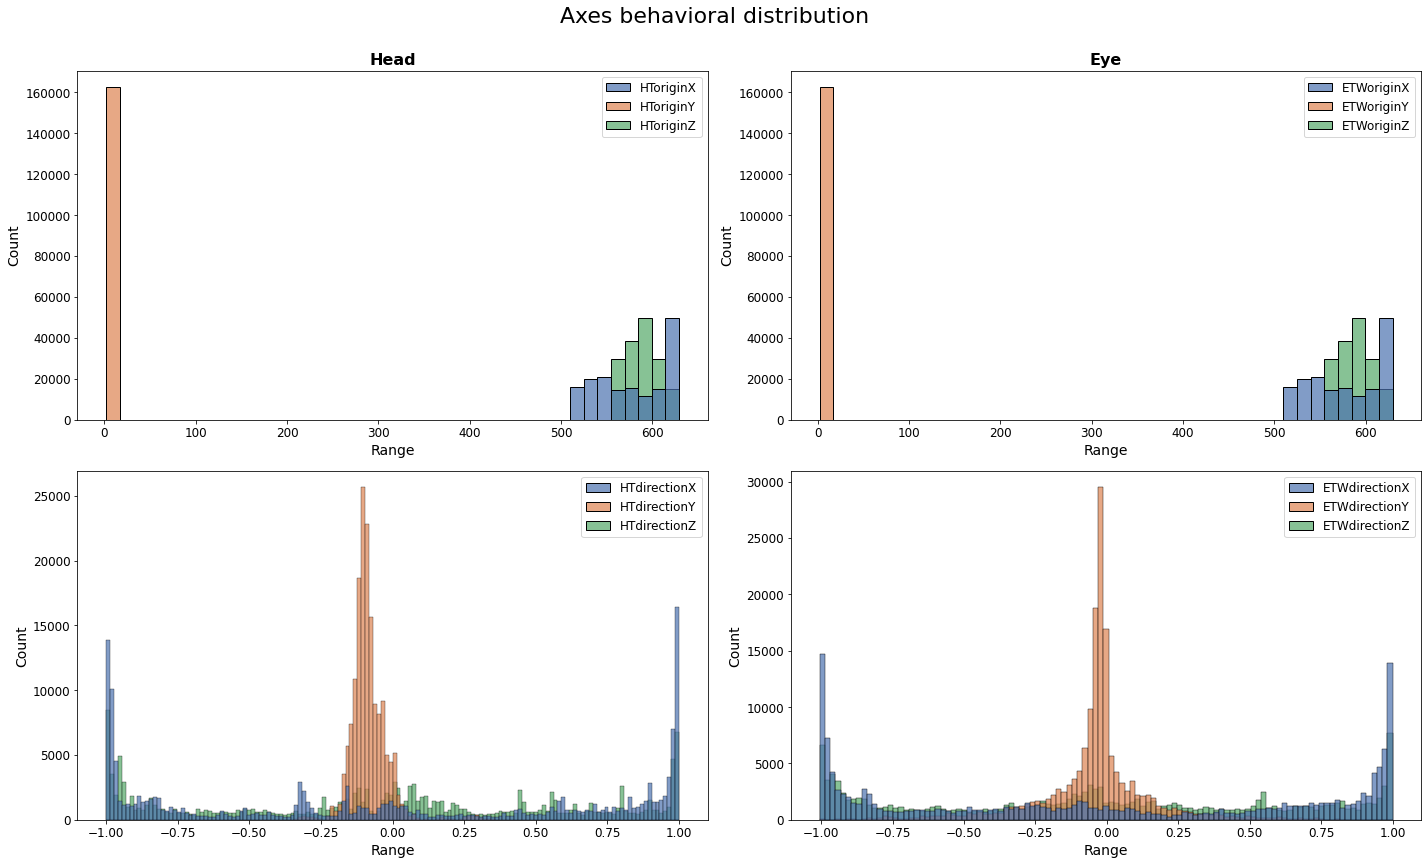

In [48]:
%matplotlib inline
vis_count_distr(renamed_81, include_eye_local=False, save=True)

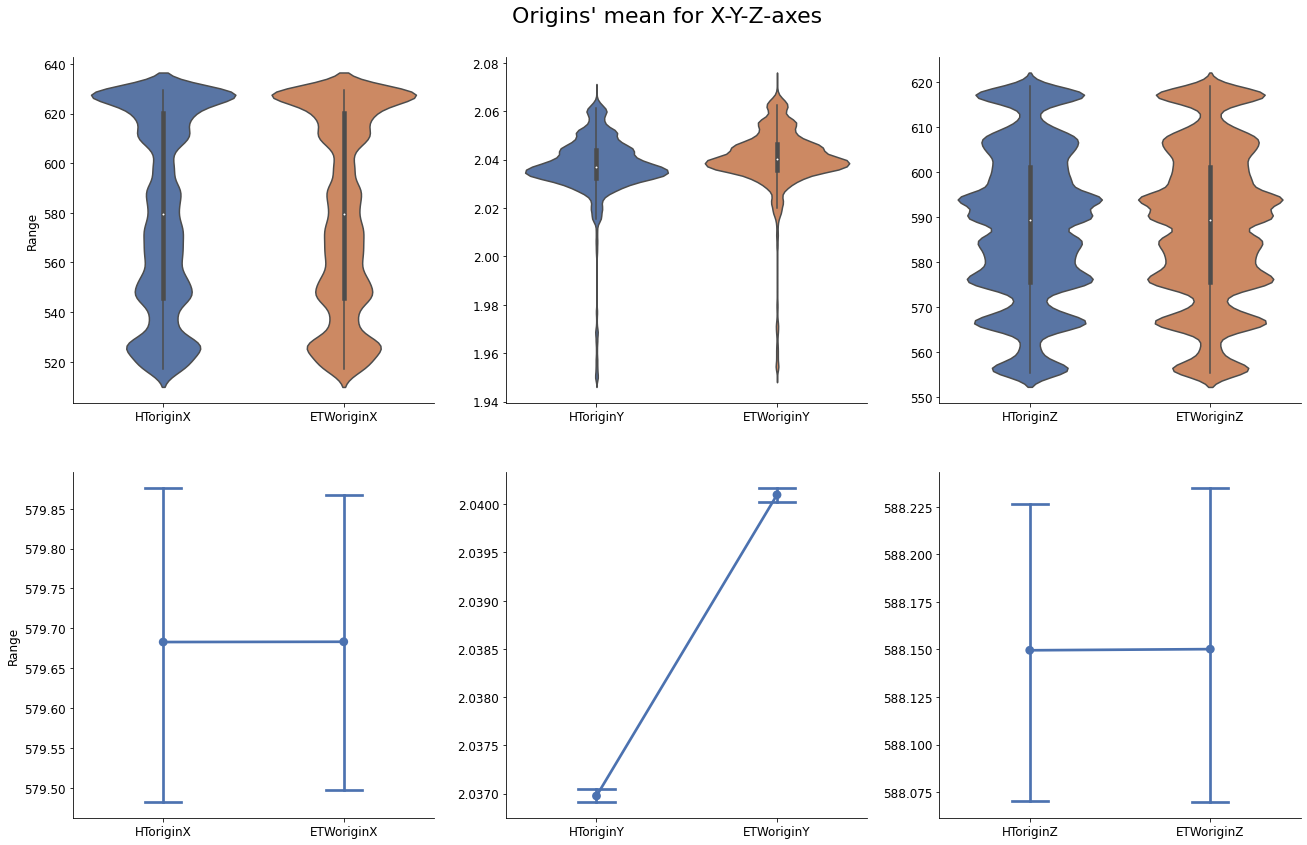

In [49]:
plot_origin_mean(renamed_81, save=True)

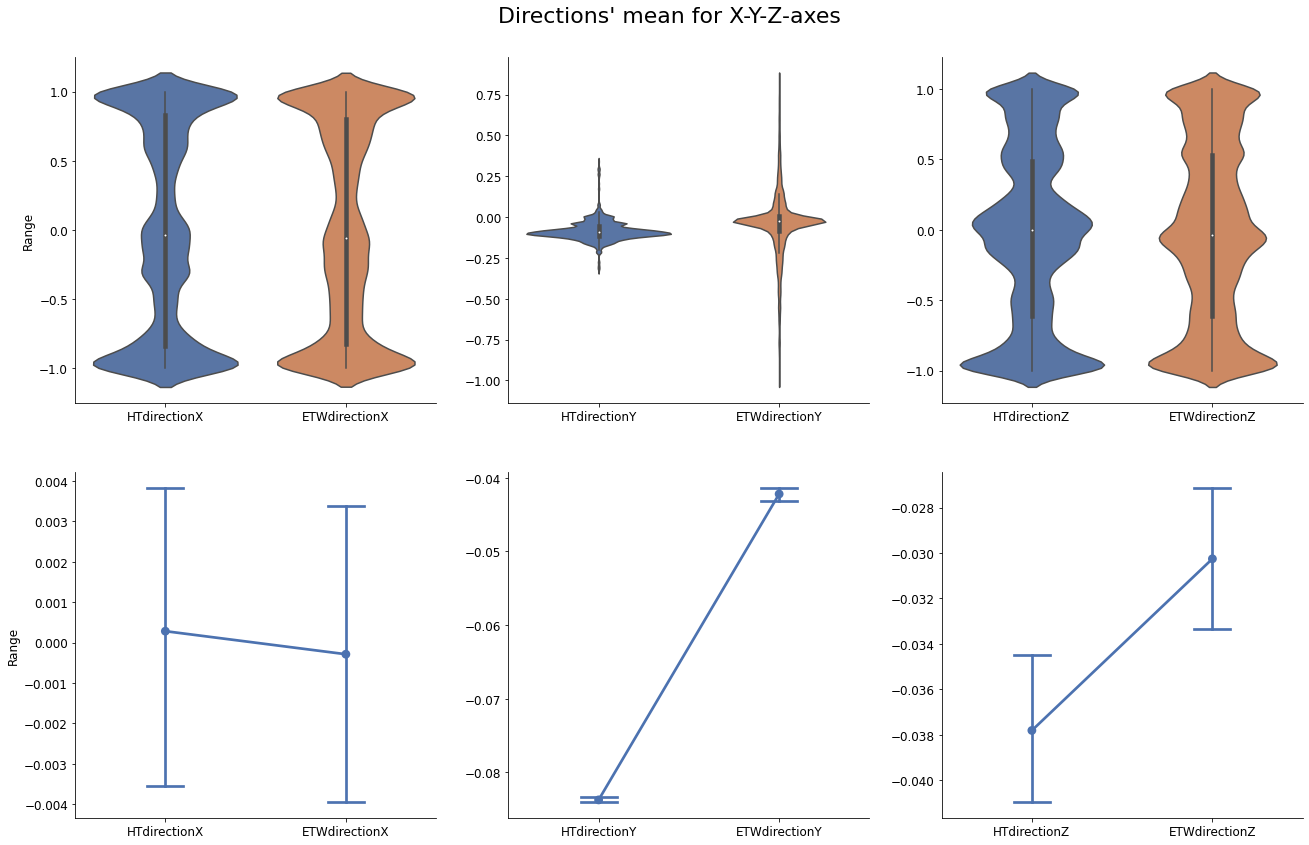

In [50]:
plot_directions_mean(renamed_81, save=True)

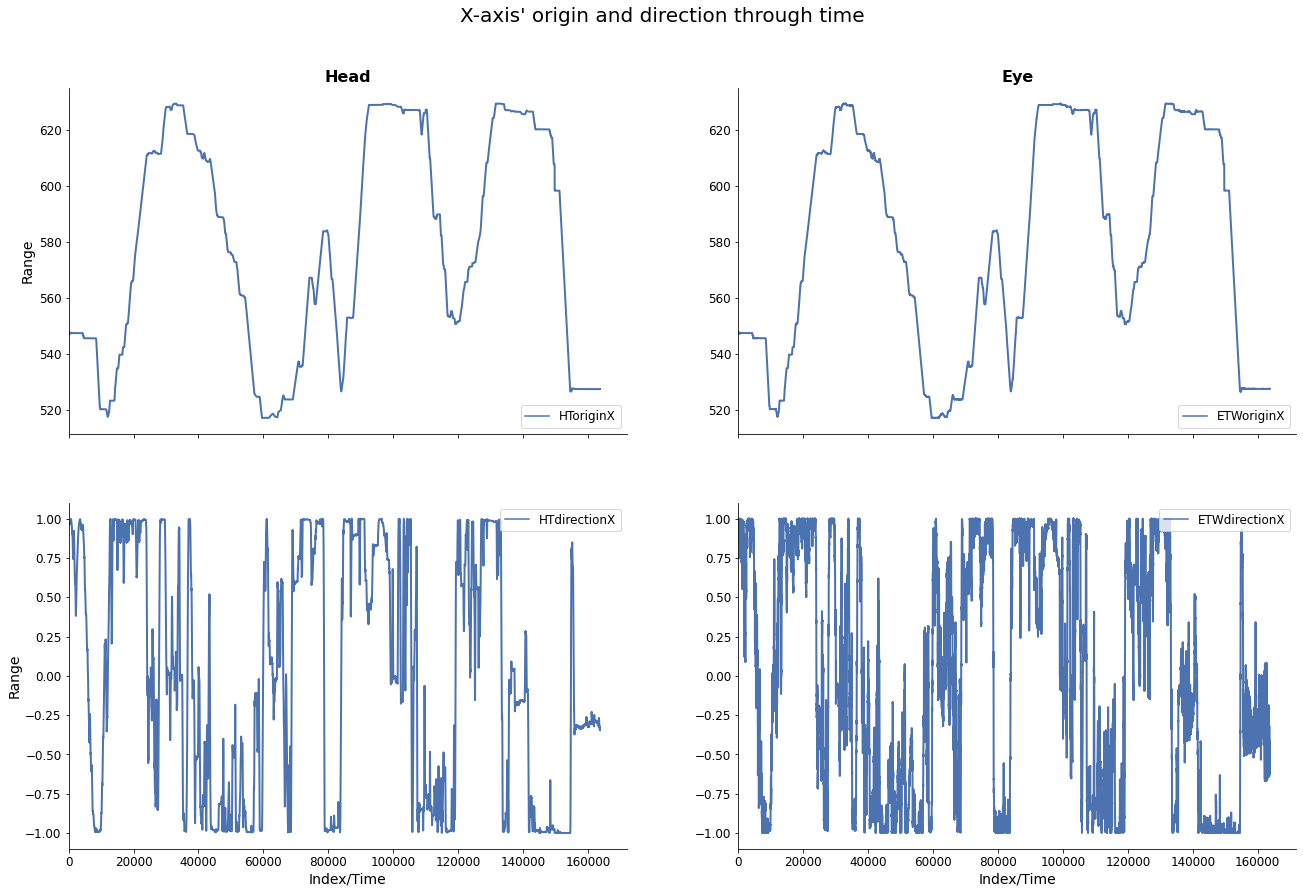

In [51]:
vis_x_outliers(renamed_81, save=True)

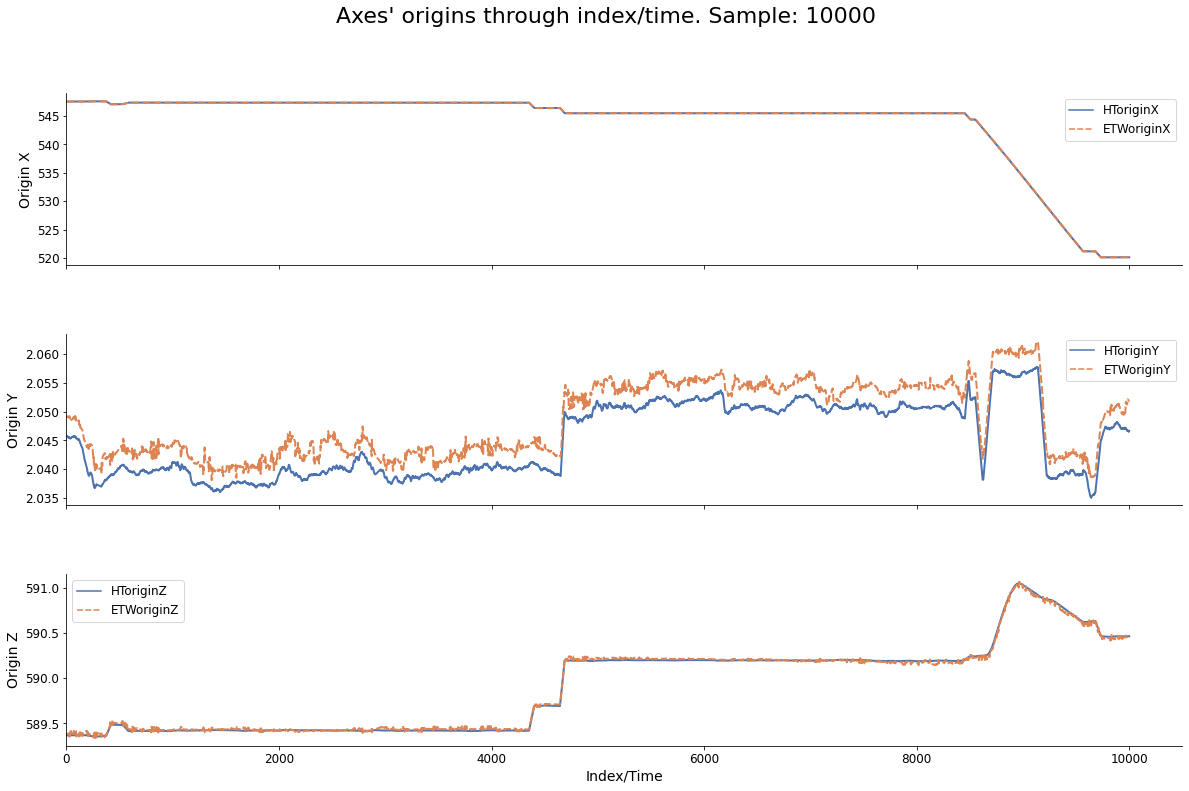

In [52]:
plot_origin_relational(renamed_81, sample=True, save=True)

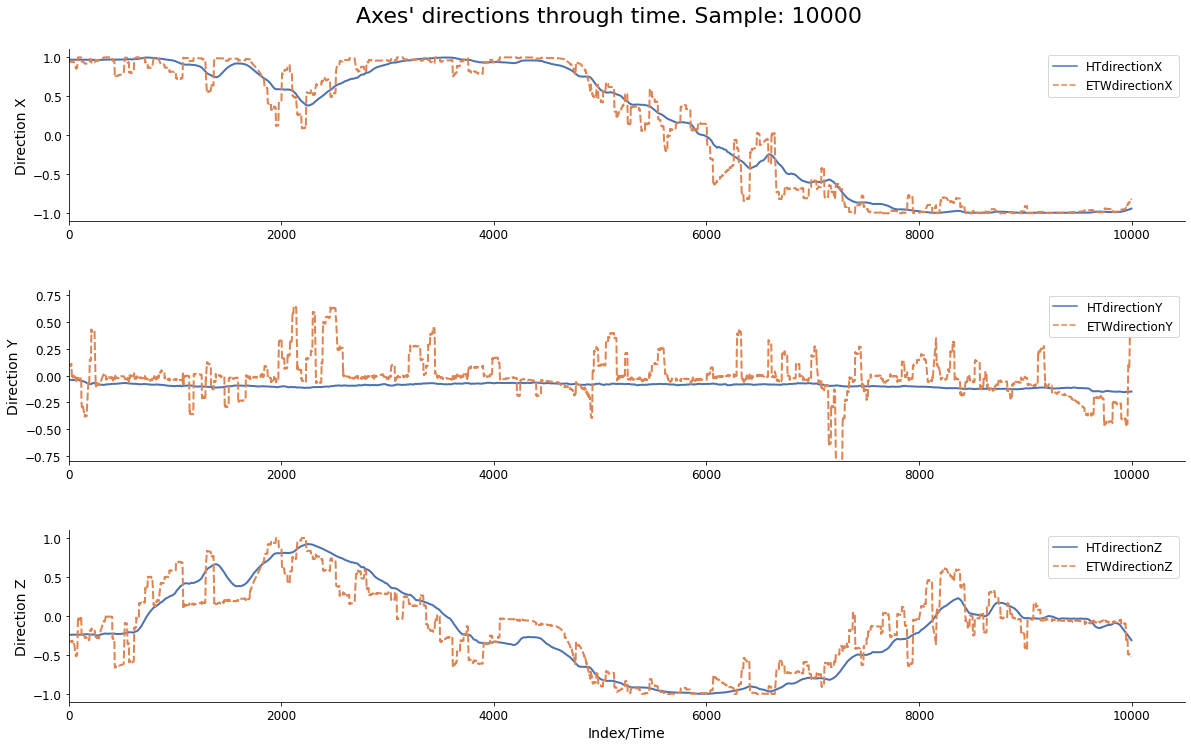

In [53]:
plot_direction_relational(renamed_81, save=True, sample=True)

### 7.1 Identify valid gazes

In [6]:
for_eye= pd.read_csv(correTS_81_path,index_col=0)
#only get gazes without nans and wihtout long events
# gaze = for_eye[for_eye["events"] == 2.0] #this is how the onset of gazes is defined, if you have a -2.0 that means it's the offset of a face (alternatively you can look for events where

#gaze = for_eye[~for_eye["isFix"].isnull()]
#gaze = gaze[~gaze["names"].isnull()] #just to make sure you don't have a nan
# gaze = gaze[~gaze["long_events"].isnull()] #get rid of events that are too long
#bg_gaze = gaze[~gaze["names"].str.contains("NPC|face")] #background
#body_gaze = gaze[gaze["names"].str.contains("NPC", regex=False, na=False)] #body
#face_gaze = gaze[gaze["names"].str.contains("face", regex=False, na=False)] #head

#gaze = for_eye
for_eye['valid'] = np.where((~for_eye["isFix"].isnull()) & (~for_eye["names"].isnull()),1,0)

correTS_81_select = for_eye[['xcoord_orig', 'ycoord_orig', 'zcoord_orig','xcoord','ycoord', 'zcoord','xhead_orig','yhead_orig', 'zhead_orig', 'xhead', 'yhead', 'zhead', 'xhpoo', 'yhpoo', 'zhpoo', 'names', 'time', 'valid']]

In [7]:
correTS_81_select

xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
0         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
1         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
2         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
3         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
4         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
...             ...          ...          ...       ...       ...       ...   
163651    527.39570     2.039758    593.38170 -0.465525  0.053999 -0.884111   
163652    527.39575     2.039808    593.38184 -0.466018  0.055140 -0.883809   
163653    527.39570     2.040012    593.38245 -0.388782  0.076406 -0.919556   
163654    527.39500     2.039536    593.38130 -0.349532  0.084078 -0.934805   
163655    527.39465     2.039790    593.38210 -0.322776  0.063792 -0.945271   

        xhead_orig  yhead_orig  zhead_orig     xhead     yhead     zhead  \
0       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
1       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
2       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
3       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
4       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
...            ...         ...         ...       ...       ...       ...   
163651  527.346741    2.038607  593.383911 -0.341758  0.026704 -0.939409   
163652  527.346741    2.038620  593.384033 -0.342585  0.026923 -0.939102   
163653  527.346741    2.038561  593.384155 -0.343687  0.027117 -0.938693   
163654  527.346741    2.038495  593.384338 -0.344554  0.027179 -0.938373   
163655  527.346741    2.038489  593.384460 -0.345481  0.027203 -0.938032   

             xhpoo     yhpoo       zhpoo               names      time  valid  
0       596.745911  7.402968  572.369690                 NaN     0.000      0  
1       596.745911  7.402968  572.369690  baum ld0(enhanced)     0.018      1  
2       596.745911  7.402968  572.369690  baum ld0(enhanced)     0.021      1  
3       596.745911  7.402968  572.369690  baum ld0(enhanced)     0.103      1  
4       596.745911  7.402968  572.369690  baum ld0(enhanced)     0.105      1  
...            ...       ...         ...                 ...       ...    ...  
163651  506.739807  4.435732  554.152649             Terrain  2806.947      0  
163652  506.739807  4.483845  554.207642             Terrain  2806.958      0  
163653  506.739807  6.099425  544.526672             Terrain  2806.969      0  
163654  506.739807  7.008037  538.139954             Terrain  2806.980      0  
163655  506.739807  6.121888  532.893005             Terrain  2806.992      0  

[163656 rows x 18 columns]

In [191]:
# %matplotlib inline
fig, ax = plt.subplots(3,3,figsize=(12, 8))
# correlation of each eye axis given head axis
sns.regplot(x="xcoord",y="xhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[0,0])
sns.regplot(x="ycoord",y="yhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[1,0])
sns.regplot(x="zcoord",y="zhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[2,0])

# correlation of each hpoo axis given head axis
sns.regplot(x="xhpoo",y="xhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[0,1])
sns.regplot(x="yhpoo",y="yhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[1,1])
sns.regplot(x="zhpoo",y="zhead",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[2,1])

# object given eye
sns.regplot(x="xhpoo",y="xcoord",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[0,2])
sns.regplot(x="yhpoo",y="ycoord",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[1,2])
sns.regplot(x="zhpoo",y="zcoord",data=correTS_81_select,line_kws={"color": "C1"}, ax=ax[2,2])

plt.tight_layout()

<IPython.core.display.Javascript object>

<AxesSubplot:>

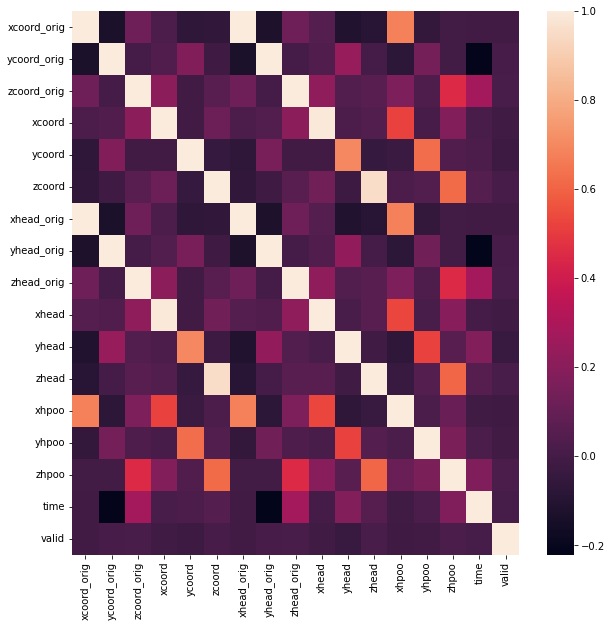

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(correTS_81_select.corr())

In [184]:
data_gaze = correTS_81_select[correTS_81_select['valid']==1]
data_no_gaze = correTS_81_select[correTS_81_select['valid']==0]

In [ ]:
# plotting head and eye directions of movement
from mpl_toolkits.mplot3d import axes3d
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# gazes
fg = ax.scatter3D(data_gaze['xcoord'].head(1),data_gaze['zcoord'].head(1),data_gaze['ycoord'].head(1), alpha=0.3, c=data_gaze['ycoord'].head(1), cmap='viridis', edgecolors='none', label='gaze') #s=data_gaze['time']/10)
# not gazes
# ax.scatter3D(data_no_gaze['xcoord'],data_no_gaze['zcoord'],data_no_gaze['ycoord'], alpha=0.1, c='blue', edgecolors='none', label='no_gaze')
ax.set_zlim(-1,1)
plt.legend(loc=2)
plt.colorbar(fg)

In [239]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
# ax.scatter3D(correTS_81_select['xhead'].head(300),correTS_81_select['zhead'].head(300),correTS_81_select['yhead'].head(300), alpha=0.3, c='gray', edgecolors='none')
ax.scatter3D(correTS_81_select['xhead'].head(1),correTS_81_select['zhead'].head(1),correTS_81_select['yhead'].head(1), alpha=0.3, c='blue', edgecolors='none')
# ax.scatter3D(data_no_gaze['xhead'],data_no_gaze['zhead'],data_no_gaze['yhead'], alpha=0.1, c='blue', edgecolors='none', label='no_gaze')
ax.set_zlim(-1,1)
plt.legend(loc=2)

<IPython.core.display.Javascript object>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [96]:
# select all faces
correTS_81_select.loc[(correTS_81_select['valid']==1) & (correTS_81_select['names'].str.contains('face', regex=True, na=False))]['names']

24483      face_42
24484      face_42
24485      face_42
24486      face_42
24487      face_42
            ...   
152695    face_624
152696    face_624
152697    face_624
152698    face_624
152699    face_624
Name: names, Length: 1089, dtype: object

### 7.2 ET vs. HT for a single gaze event

In [60]:
# select a specific face
data_gaze_face_619 = correTS_81_select.loc[(correTS_81_select['valid']==1) & (correTS_81_select['names'].str.contains('face_619', regex=True, na=False))]

# plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')

# ax.quiver(data_gaze.iloc[0:-2]['xcoord'],data_gaze.iloc[0:-2]['zcoord'],data_gaze.iloc[0:-2]['ycoord'],
#           np.array(data_gaze.iloc[1:-1]['xcoord'])-np.array(data_gaze.iloc[0:-2]['xcoord']),
#           np.array(data_gaze.iloc[1:-1]['zcoord'])-np.array(data_gaze.iloc[0:-2]['zcoord']),
#           np.array(data_gaze.iloc[1:-1]['ycoord'])-np.array(data_gaze.iloc[0:-2]['ycoord']), length=1, normalize=True)


In [61]:
# For face_619
data_gaze_face_619 = correTS_81_select.loc[(correTS_81_select['valid']==1) & (correTS_81_select['names'].str.contains('face_619', regex=True, na=False))]
# rename the columns
renamed_face_619 = data_gaze_face_619.rename(columns={'xcoord':'ETWdirectionX','ycoord':'ETWdirectionY','zcoord':'ETWdirectionZ','xcoord_orig':'ETWoriginX','ycoord_orig':'ETWoriginY','zcoord_orig':'ETWoriginZ', 'xlocal_dir':'ETLdirectionX','ylocal_dir':'ETLdirectionY', 'zlocal_dir':'ETLdirectionZ', 'xhead':'HTdirectionX', 'yhead':'HTdirectionY', 'zhead':'HTdirectionZ', 'xhead_orig':'HToriginX', 'yhead_orig':'HToriginY','zhead_orig':'HToriginZ'})
renamed_face_619

ETWoriginX  ETWoriginY  ETWoriginZ  ETWdirectionX  ETWdirectionY  \
23231   602.40210    2.039593   566.93200       0.996103      -0.000204   
23232   602.41223    2.039624   566.93190       0.996218      -0.000703   
23233   602.42285    2.039654   566.93195       0.996325      -0.001211   
23234   602.43310    2.039604   566.93274       0.996312      -0.001245   
23235   602.44370    2.039552   566.93335       0.996387      -0.001818   
23236   602.45404    2.039567   566.93370       0.996385      -0.001400   
23237   602.46500    2.039600   566.93390       0.996436      -0.001134   
23238   602.47565    2.039604   566.93427       0.996500      -0.000812   
23239   602.48590    2.039605   566.93480       0.996581      -0.001729   
23240   602.49585    2.039531   566.93555       0.996558      -0.002022   
23380   603.93207    2.038971   566.89514       0.995549       0.002640   
23381   603.94244    2.039059   566.89400       0.995652       0.003098   
23382   603.95220    2.039173   566.89290       0.995610       0.002363   
23383   603.96260    2.039257   566.89230       0.995540       0.002542   
23384   603.97280    2.039177   566.89300       0.995663       0.001710   
23385   603.98346    2.039145   566.89343       0.995675       0.001945   
23386   603.99430    2.038998   566.89484       0.995580       0.003215   
23387   604.00494    2.039017   566.89500       0.995570       0.003948   
23388   604.01587    2.039059   566.89460       0.995485       0.003373   
23389   604.02640    2.039096   566.89440       0.995623       0.002347   
23390   604.03630    2.039116   566.89404       0.995679       0.002390   
23391   604.04645    2.039169   566.89360       0.995695       0.002133   
23392   604.05660    2.039241   566.89280       0.995742       0.002311   
23393   604.06650    2.039304   566.89230       0.995782       0.003487   
23394   604.07666    2.039294   566.89185       0.995714       0.002911   
23395   604.08673    2.039414   566.89075       0.995741       0.002615   
23396   604.09690    2.039493   566.88990       0.995770       0.002853   
23397   604.10754    2.039566   566.88934       0.995767       0.002175   
23398   604.11730    2.039615   566.88885       0.995733       0.001393   
23399   604.12840    2.039619   566.88900       0.995685       0.001729   
23400   604.13916    2.039488   566.89000       0.995667       0.002474   
23401   604.14970    2.039087   566.89355       0.995591       0.002687   
23402   604.15970    2.038991   566.89484       0.995574       0.003088   
23403   604.16990    2.038931   566.89540       0.995534       0.001162   
23404   604.17990    2.038905   566.89510       0.995530      -0.000031   
23405   604.19050    2.038975   566.89435       0.995559      -0.000832   
23406   604.20010    2.039107   566.89310       0.995537      -0.001288   
23407   604.21050    2.039311   566.89120       0.995545      -0.002231   
23408   604.22034    2.039309   566.89105       0.995591      -0.003102   
23409   604.23040    2.039303   566.89087       0.995656      -0.003255   
23410   604.24110    2.039333   566.89040       0.995757      -0.003338   
23411   604.25160    2.039408   566.88990       0.995773      -0.003381   
23412   604.26170    2.039422   566.88950       0.995810      -0.003736   
23413   604.27240    2.039443   566.88890       0.995780      -0.004043   
23414   604.28204    2.039473   566.88870       0.995833      -0.004361   
23415   604.29290    2.039454   566.88860       0.995863      -0.004074   
23416   604.30316    2.039430   566.88890       0.995892      -0.004811   
23417   604.31330    2.039380   566.88920       0.995926      -0.003896   
23418   604.32355    2.039323   566.88947       0.995925      -0.003726   
23419   604.33374    2.039298   566.88950       0.995944      -0.004830   
23420   604.34420    2.039301   566.88940       0.995934      -0.004923   
23421   604.35516    2.038894   566.89294       0.995198      -0.005357   

       ETWdirectionZ   HTorigin

Text(0, 0.5, 'Direction Z')

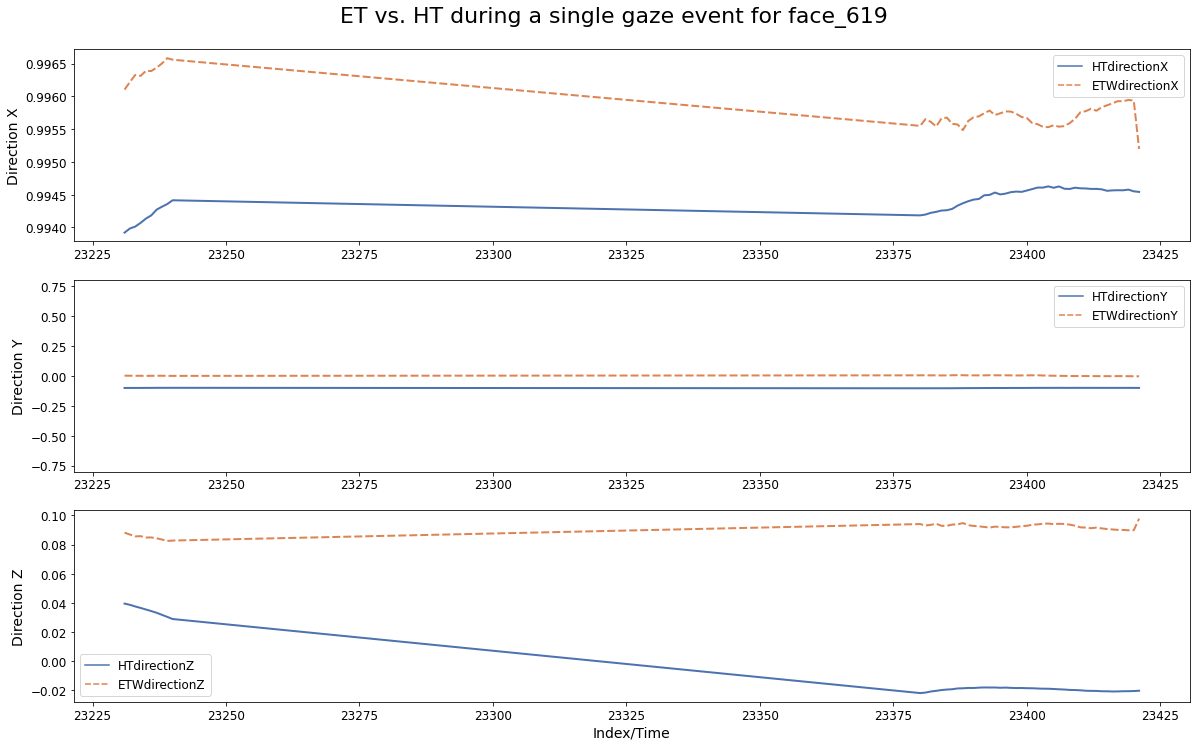

In [64]:
# ET vs. HT during a single gaze event for face_619
fig, ax = plt.subplots(3,1, figsize=(20, 12))
plt.suptitle('ET vs. HT during a single gaze event for face_619', fontsize=22, y=0.93)
sns.lineplot(data=renamed_face_619[['HTdirectionX','ETWdirectionX']], linewidth=2, ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_ylabel('Direction X', size=14)
sns.lineplot(data=renamed_face_619[['HTdirectionY', 'ETWdirectionY']], linewidth=2, ax=ax[1])
ax[1].set_xlabel('')
ax[1].set_ylabel('Direction Y', size=14)
ax[1].set(ylim=(-0.8, 0.8))
sns.lineplot(data=renamed_face_619[['HTdirectionZ', 'ETWdirectionZ']], linewidth=2, ax=ax[2])
ax[2].set_xlabel('Index/Time', size=14)
ax[2].set_ylabel('Direction Z', size=14)

# 8. Calculating distances and angles between HT and ET vectors
For all valid gazes

In [8]:
# Gazes of faces are around the same height from the head
data_gaze = correTS_81_select.loc[(correTS_81_select['valid']==1)] #& ~(correTS_81_select['names'].str.contains('face', regex=True, na=False))]

# data_no_gaze = correTS_81_select[correTS_81_select['valid']==0]

# plt.figure(figsize=(10,10))
# ax = plt.axes(projection='3d')

# fg = px.scatter_3d(data_frame = data_gaze, x= 'xcoord', y='ycoord', z='zcoord', height=700,
#              animation_frame='time',range_x=[-1,1], range_y=[-1,1], range_z=[-1,1])
#             #  range_x=[min(data_gaze['xcoord']),max(data_gaze['xcoord'])],
#             # range_y = [min(data_gaze['ycoord']),max(data_gaze['ycoord'])],
#             # range_z=[min(data_gaze['zcoord']),min(data_gaze['zcoord'])], color='time')

# pio.show(fg, renderer='browser')

In [9]:
data_gaze

xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
1         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
2         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
3         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
4         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
5         547.54376     2.049087    589.38650  0.942298  0.102535 -0.325898   
...             ...          ...          ...       ...       ...       ...   
124995    572.71857     2.037549    601.36975  0.148591  0.405098 -0.941544   
124996    572.71893     2.037536    601.36993  0.146431  0.405476 -0.941789   
124997    572.71910     2.037468    601.37006  0.146868  0.405077 -0.941818   
124998    572.71930     2.037517    601.37020  0.145807  0.405062 -0.941987   
124999    572.71936     2.037582    601.37024  0.144990  0.405665 -0.941967   

        xhead_orig  yhead_orig  zhead_orig     xhead     yhead     zhead  \
1       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
2       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
3       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
4       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
5       547.551208    2.045722  589.369141  0.969250 -0.037722 -0.243171   
...            ...         ...         ...       ...       ...       ...   
124995  572.712708    2.033466  601.352356  0.447026 -0.094200 -0.889548   
124996  572.712769    2.033489  601.352417  0.446806 -0.094164 -0.889661   
124997  572.712769    2.033375  601.352539  0.446490 -0.094314 -0.889804   
124998  572.712769    2.033409  601.352600  0.446164 -0.094540 -0.889944   
124999  572.712830    2.033363  601.352661  0.445802 -0.094601 -0.890119   

             xhpoo     yhpoo      zhpoo               names      time  valid  
1       596.745911  7.402968  572.36969  baum ld0(enhanced)     0.018      1  
2       596.745911  7.402968  572.36969  baum ld0(enhanced)     0.021      1  
3       596.745911  7.402968  572.36969  baum ld0(enhanced)     0.103      1  
4       596.745911  7.402968  572.36969  baum ld0(enhanced)     0.105      1  
5       596.745911  7.402968  572.36969  baum ld0(enhanced)     0.106      1  
...            ...       ...        ...                 ...       ...    ...  
124995  575.041626  8.370811  586.64978               Lod_1  2199.784      1  
124996  575.007629  8.375134  586.64978               Lod_1  2199.795      1  
124997  575.014587  8.368691  586.64978               Lod_1  2199.807      1  
124998  574.997803  8.367414  586.64978               Lod_1  2199.818      1  
124999  574.985168  8.377060  586.64978               Lod_1  2199.829      1  

[81140 rows x 18 columns]

# Functions to calculate angles and distances
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::
            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def euclidian_distance(v1, v2):
    return np.linalg.norm(np.array(v1)-np.array(v2))

# Angle between head and eye given their direction
data_gaze['head2eyeAngle'] = data_gaze.apply(lambda x: 180/math.pi * angle_between([x["xhead"], x["yhead"], x["zhead"]], [x["xcoord"], x["ycoord"], x["zcoord"]]), axis = 1)
# calculate the vector between head and object given their positions by substracting them.
# then we calculate the angle given the head's direction.
data_gaze['head2objectAngle'] = data_gaze.apply(lambda x: 180/math.pi * angle_between([x["xhpoo"]-x["xhead_orig"], x["yhpoo"]-x["yhead_orig"], x["zhpoo"]-x["zhead_orig"]], [x["xhead"], x["yhead"], x["zhead"]]), axis = 1)
data_gaze['eye2objectAngle'] = data_gaze.apply(lambda x: 180/math.pi * angle_between([x["xhpoo"]-x["xcoord_orig"], x["yhpoo"]-x["ycoord_orig"], x["zhpoo"]-x["zcoord_orig"]], [x["xcoord"], x["ycoord"], x["zcoord"]]), axis = 1)
data_gaze['vector distance'] = data_gaze.apply(lambda x: euclidian_distance([x["xhead"], x["yhead"], x["zhead"]], [x["xcoord"], x["ycoord"], x["zcoord"]]), axis=1)

In [22]:
data_gaze

xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
1         548.96930     2.159502    589.10960  0.999445 -0.041306  0.012150   
2         548.99414     2.159547    589.10960  0.999470 -0.040301  0.011573   
3         549.01850     2.159583    589.10986  0.999484 -0.039621  0.011871   
4         549.04280     2.159638    589.11170  0.999510 -0.038649  0.011454   
5         549.06710     2.159651    589.11430  0.999500 -0.039214  0.010948   
...             ...          ...          ...       ...       ...       ...   
162749    613.64874     2.142177    609.27360 -0.966235 -0.083544 -0.249974   
162750    613.64870     2.142273    609.27510 -0.966591 -0.085562 -0.248219   
162751    613.64850     2.142336    609.27650 -0.967120 -0.087081 -0.245860   
162752    613.64820     2.142555    609.28010 -0.968373 -0.086399 -0.240978   
162753    613.64810     2.142596    609.28076 -0.968680 -0.086566 -0.239698   

        xhead_orig  yhead_orig  zhead_orig     xhead  ...       xhpoo  \
1       549.004150    2.157337  589.090698  0.990777  ...  570.891174   
2       549.028076    2.157340  589.093384  0.990821  ...  570.840271   
3       549.052246    2.157314  589.096008  0.990827  ...  570.853394   
4       549.076538    2.157311  589.098572  0.990861  ...  570.831665   
5       549.100525    2.157320  589.101196  0.990871  ...  570.813293   
...            ...         ...         ...       ...  ...         ...   
162749  613.639221    2.138586  609.288513 -0.997397  ...  593.520874   
162750  613.639282    2.138587  609.288513 -0.997391  ...  593.987183   
162751  613.639221    2.138587  609.288574 -0.997385  ...  594.318665   
162752  613.639221    2.138588  609.288574 -0.997392  ...  594.138245   
162753  613.639160    2.138628  609.288635 -0.997399  ...  594.169189   

           yhpoo       zhpoo              names      time valid  \
1       1.253504  589.376099  Sitting_NPC (424)     0.011     1   
2       1.278653  589.362549  Sitting_NPC (424)     0.022     1   
3       1.294013  589.369202  Sitting_NPC (424)     0.033     1   
4       1.317100  589.361389  Sitting_NPC (424)     0.044     1   
5       1.306465  589.352539  Sitting_NPC (424)     0.055     1   
...          ...         ...                ...       ...   ...   
162749  0.401857  604.066345            Terrain  1997.470     1   
162750  0.401857  604.226074            Terrain  1997.480     1   
162751  0.401857  604.362549            Terrain  1997.492     1   
162752  0.401857  604.425049            Terrain  1997.503     1   
162753  0.401857  604.460754            Terrain  1997.514     1   

        head2eyeAngle  head2objectAngle  eye2objectAngle  vector distance  
1            6.052014          6.005398         0.000001         0.105599  
2            6.081161          6.041311         0.000005         0.106106  
3            6.073742          6.039846         0.000021         0.105976  
4            6.099565          6.067671         0.000035         0.106425  
5            6.105168          6.073132         0.000111         0.106523  
...               ...               ...              ...              ...  
162749      11.135552         11.176338         0.000016         0.194202  
162750      11.074977         11.112359         0.000075         0.193157  
162751      10.973058         11.007075         0.000148         0.191391  
162752      10.696607         10.720724         0.000098         0.186580  
162753      10.638355         10.660731         0.000017         0.185567  

[104505 rows x 22 columns]

In [23]:
# Create event related data fields
# Flagging beginning of gazes
data_gaze['gazeStartBool'] = data_gaze['names'].shift(1) != data_gaze['names']
# Label each gazes with a unique number
data_gaze['gazeID'] = data_gaze.apply(lambda x: x.name if x['gazeStartBool'] else None, axis=1).fillna(method="ffill")
# add head and eye start angles, and gaze start (world) time to each gaze data point
data_gaze['head2objectAngleStart'] = data_gaze.apply(lambda x: x['head2objectAngle'] if x['gazeStartBool'] else None, axis=1).fillna(method="ffill")
data_gaze['eye2objectAngleStart'] = data_gaze.apply(lambda x: x['eye2objectAngle']  if x['gazeStartBool'] else None, axis=1).fillna(method="ffill")
data_gaze['vectorDistanceStart'] = data_gaze.apply(lambda x: x['vector distance']  if x['gazeStartBool'] else None, axis=1).fillna(method="ffill")
data_gaze['timeStart'] = data_gaze.apply(lambda x: x['time']  if x['gazeStartBool'] else None, axis=1).fillna(method="ffill")
# calculate changes on head and eye angle through time for each gaze datapoint (each row)
data_gaze['head2objectAngleDelta'] = data_gaze['head2objectAngle'] - data_gaze['head2objectAngleStart']
data_gaze['eye2objectAngleDelta'] = data_gaze['eye2objectAngle'] - data_gaze['eye2objectAngleStart']
data_gaze['vectorDistanceDelta'] = data_gaze['vector distance'] - data_gaze['vectorDistanceStart']
# calculate delta_time to align all gazes to start from zero
data_gaze['timeDelta'] = data_gaze['time'] - data_gaze['timeStart']
# group all gazes datapoints into specific 'buckets'.
# no matter how long the gaze was, they all will be between the same
data_gaze['timeDeltaBucket'] = data_gaze.groupby('gazeID')['timeDelta'].transform(lambda x: pd.qcut(x, 6, labels=range(1,7)))
# drop unnecessary columns
data_gaze.drop(['gazeStartBool', 'timeStart'], axis=1, inplace=True)

# data_gaze[['gazeID', 'names']]
data_gaze

xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
1         548.96930     2.159502    589.10960  0.999445 -0.041306  0.012150   
2         548.99414     2.159547    589.10960  0.999470 -0.040301  0.011573   
3         549.01850     2.159583    589.10986  0.999484 -0.039621  0.011871   
4         549.04280     2.159638    589.11170  0.999510 -0.038649  0.011454   
5         549.06710     2.159651    589.11430  0.999500 -0.039214  0.010948   
...             ...          ...          ...       ...       ...       ...   
162749    613.64874     2.142177    609.27360 -0.966235 -0.083544 -0.249974   
162750    613.64870     2.142273    609.27510 -0.966591 -0.085562 -0.248219   
162751    613.64850     2.142336    609.27650 -0.967120 -0.087081 -0.245860   
162752    613.64820     2.142555    609.28010 -0.968373 -0.086399 -0.240978   
162753    613.64810     2.142596    609.28076 -0.968680 -0.086566 -0.239698   

        xhead_orig  yhead_orig  zhead_orig     xhead  ...  vector distance  \
1       549.004150    2.157337  589.090698  0.990777  ...         0.105599   
2       549.028076    2.157340  589.093384  0.990821  ...         0.106106   
3       549.052246    2.157314  589.096008  0.990827  ...         0.105976   
4       549.076538    2.157311  589.098572  0.990861  ...         0.106425   
5       549.100525    2.157320  589.101196  0.990871  ...         0.106523   
...            ...         ...         ...       ...  ...              ...   
162749  613.639221    2.138586  609.288513 -0.997397  ...         0.194202   
162750  613.639282    2.138587  609.288513 -0.997391  ...         0.193157   
162751  613.639221    2.138587  609.288574 -0.997385  ...         0.191391   
162752  613.639221    2.138588  609.288574 -0.997392  ...         0.186580   
162753  613.639160    2.138628  609.288635 -0.997399  ...         0.185567   

          gazeID  head2objectAngleStart  eye2objectAngleStart  \
1            1.0               6.005398              0.000001   
2            1.0               6.005398              0.000001   
3            1.0               6.005398              0.000001   
4            1.0               6.005398              0.000001   
5            1.0               6.005398              0.000001   
...          ...                    ...                   ...   
162749  162733.0              10.793971              0.000107   
162750  162733.0              10.793971              0.000107   
162751  162733.0              10.793971              0.000107   
162752  162733.0              10.793971              0.000107   
162753  162733.0              10.793971              0.000107   

        vectorDistanceStart head2objectAngleDelta  eye2objectAngleDelta  \
1                  0.105599              0.000000              0.000000   
2                  0.105599              0.035914              0.000004   
3                  0.105599              0.034449              0.000020   
4                  0.105599              0.062273              0.000033   
5                  0.105599              0.067734              0.000110   
...                     ...                   ...                   ...   
162749             0.188035              0.382367             -0.000091   
162750             0.188035              0.318387             -0.000032   
162751             0.188035              0.213103              0.000041   
162752             0.188035             -0.073248             -0.000009   
162753             0.188035             -0.133240             -0.000090   

        vectorDistanceDelta  timeDelta  timeDeltaBucket  
1                  0.000000      0.000                1  
2                  0.000507      0.011                1  
3                  0.000377      0.022                1  
4                  0.000826      0.033                1  
5                  0.000924      0.044                1  
...                     ...        ...              ...  
162749             0.006166      0

In [24]:
# calculate the mean of each bucket so that per bucket in the gaze event we only have one number.
viz_data = data_gaze.groupby(['gazeID', 'timeDeltaBucket']).agg({'head2objectAngleDelta': 'mean', 'timeDelta': 'mean', 'vectorDistanceDelta': 'mean', 'names': 'first', 'head2objectAngleStart': 'first', 'head2objectAngle':'first'}).reset_index()
viz_data['initial rotation'] = viz_data.apply(lambda x: '0 to <10' if x['head2objectAngleStart'] < 10 else ('>= 20+' if x['head2objectAngleStart'] >= 20 else '>=10 to <20'), axis=1)
viz_data

gazeID timeDeltaBucket  head2objectAngleDelta  timeDelta  \
0           1.0               1               0.040074   0.022000   
1           1.0               2               0.068362   0.077800   
2           1.0               3               0.057596   0.133000   
3           1.0               4               0.000233   0.188800   
4           1.0               5              -0.147703   0.244000   
...         ...             ...                    ...        ...   
15727  162733.0               2               0.354516   0.056000   
15728  162733.0               3               0.538267   0.094500   
15729  162733.0               4               0.488846   0.134000   
15730  162733.0               5               0.424245   0.167333   
15731  162733.0               6               0.081251   0.206250   

       vectorDistanceDelta              names  head2objectAngleStart  \
0                 0.000527  Sitting_NPC (424)               6.005398   
1                 0.000978  Sitting_NPC (424)               6.005398   
2                 0.000768  Sitting_NPC (424)               6.005398   
3                -0.000268  Sitting_NPC (424)               6.005398   
4                -0.002831  Sitting_NPC (424)               6.005398   
...                    ...                ...                    ...   
15727             0.005819            Terrain              10.793971   
15728             0.008877            Terrain              10.793971   
15729             0.008011            Terrain              10.793971   
15730             0.006869            Terrain              10.793971   
15731             0.001138            Terrain              10.793971   

       head2objectAngle initial rotation  
0              6.005398         0 to <10  
1              6.091289         0 to <10  
2              6.070835         0 to <10  
3              6.056212         0 to <10  
4              5.938839         0 to <10  
...                 ...              ...  
15727         11.357152      >=10 to <20  
15728         11.202506      >=10 to <20  
15729         11.288797      >=10 to <20  
15730         11.239384      >=10 to <20  
15731         11.112359      >=10 to <20  

[15732 rows x 9 columns]

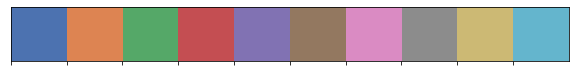

In [36]:
# choosing the color palette
deep_pal = sns.color_palette('deep')
sns.palplot(deep_pal)
colors = {'>=10 to <20':deep_pal[0], '0 to <10':deep_pal[1], '>= 20+':deep_pal[2]}

gaze event by distance between HT and YT vectors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


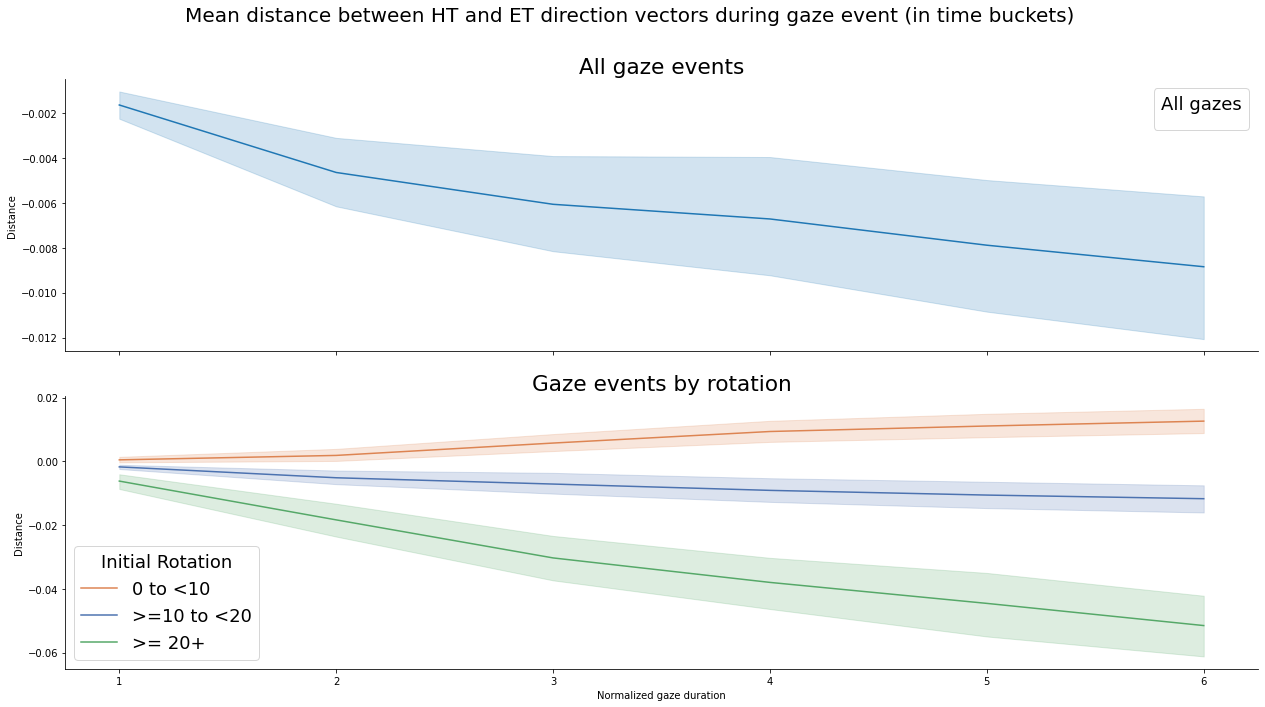

In [48]:
%matplotlib inline
fig, ax = plt.subplots(2,1,figsize=(18, 10), sharex=True)
plt.rcParams.update({'font.size': 18})
fig.suptitle("Mean distance between HT and ET direction vectors during gaze event (in time buckets)", fontsize=20, y=0.99)
# visualize gaze event by distance between HT and YT vectors (in a normed sphere)
# all gaze events
g_all = sns.lineplot(x='timeDeltaBucket', y='vectorDistanceDelta', data=viz_data, palette=colors, ax=ax[0], legend=False)
ax[0].set_title('All gaze events')
ax[0].set_xlabel('Time (in delta buckets)')
ax[0].set_ylabel('Distance')
g_all.legend(title='All gazes')

# gaze events grouped by initial rotation
g_grouped = sns.lineplot(x='timeDeltaBucket', y='vectorDistanceDelta', data=viz_data,hue='initial rotation', palette=colors, ax=ax[1])
g_grouped.legend_.set_title('Initial Rotation')
sns.despine(top=True)
ax[1].set_title('Gaze events by rotation')
ax[1].set_xlabel('Normalized gaze duration')
ax[1].set_ylabel('Distance')
plt.tight_layout()

Text(0, 0.5, 'Head to object (delta) angle (in degrees)')

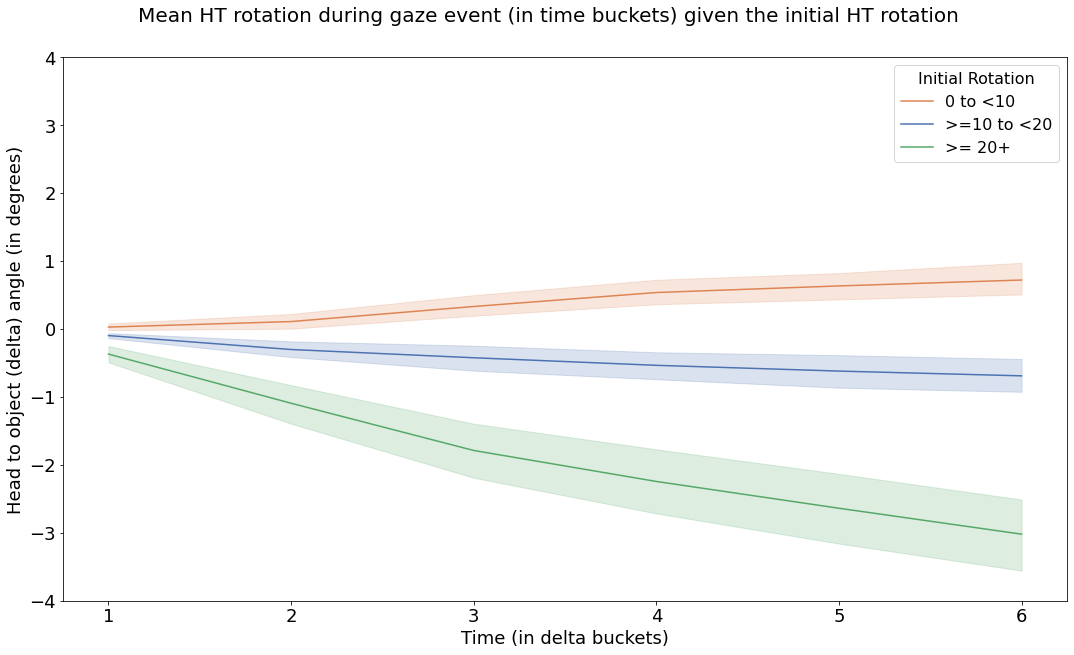

In [49]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.rcParams.update({'font.size': 16})
fig.suptitle("Mean HT rotation during gaze event (in time buckets) given the initial HT rotation", fontsize=20, y=0.95)
# visualize event by angle of initial rotation
g = sns.lineplot(x='timeDeltaBucket', y='head2objectAngleDelta', data=viz_data, hue='initial rotation', palette=colors)
ax.set_ylim(-4,4)
# ax.set_xlim(1,6)
g.legend_.set_title('Initial Rotation')
ax.set_xlabel('Normalized gaze duration')
ax.set_ylabel('Head to object (delta) angle (in degrees)')
# plt.show()

/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 85.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 76.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 67.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/Defa

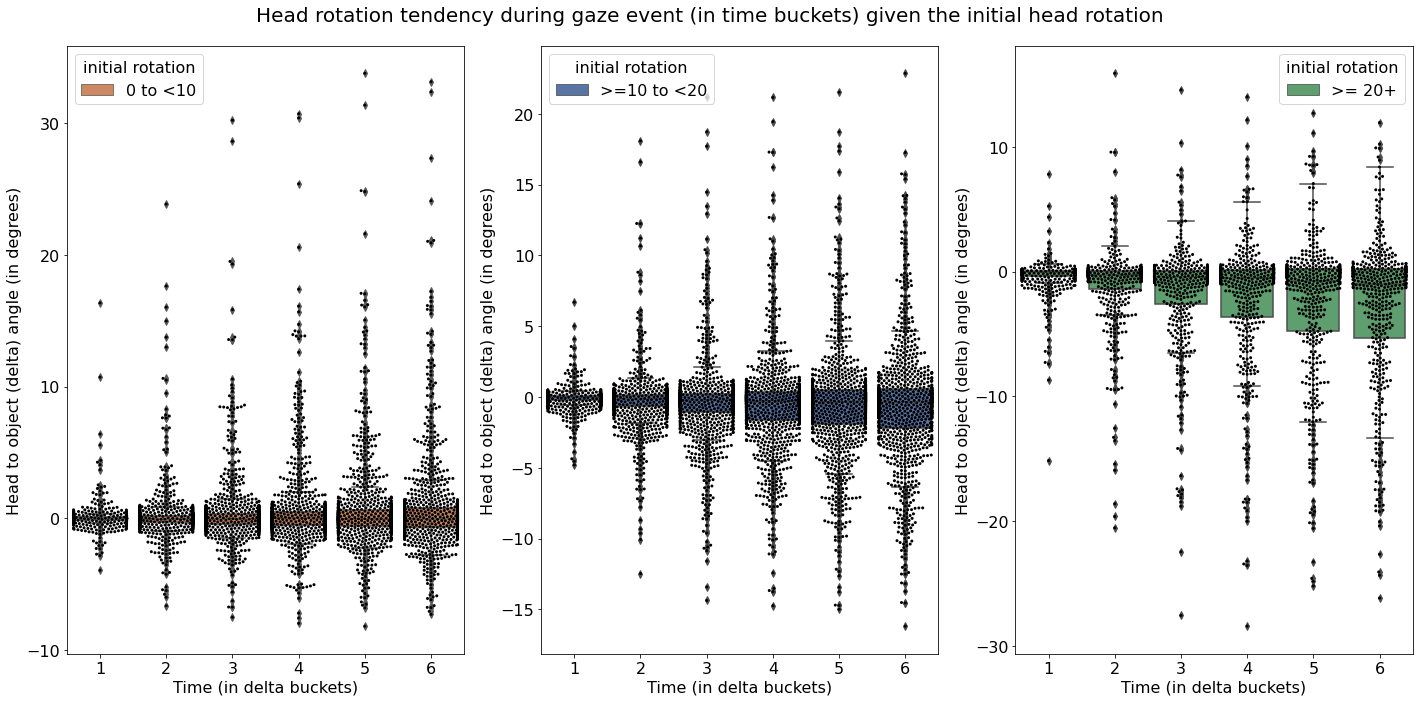

In [50]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
plt.rcParams.update({'font.size': 16})

fig.suptitle("Head rotation tendency during gaze event (in time buckets) given the initial head rotation", fontsize=20, y=0.98)

for index, rotation in enumerate(viz_data['initial rotation'].unique()):
    sns.boxplot(x='timeDeltaBucket', y='head2objectAngleDelta', data=viz_data[viz_data['initial rotation'] == rotation], hue='initial rotation',palette=colors, ax=ax[index])
    sns.swarmplot(x='timeDeltaBucket', y='head2objectAngleDelta', data=viz_data[viz_data['initial rotation'] == rotation], color='black',size=3, ax=ax[index])
    ax[index].set_xlabel('Normalized gaze duration')
    ax[index].set_ylabel('Head to object (delta) angle (in degrees)')
plt.tight_layout()
plt.show()

In [119]:
data_g = data_gaze[['xcoord','ycoord','zcoord','xhead','yhead','zhead','xhpoo','yhpoo','zhpoo','head2objectAngleStart']]
# 'head2eyeAngle','head2objectAngle','eye2objectAngle','head2objectAngleStart','eye2objectAngleStart','head2objectAngleDelta','eye2objectAngleDelta'
data_g

xcoord    ycoord    zcoord     xhead     yhead     zhead  \
1       0.999445 -0.041306  0.012150  0.990777 -0.078035  0.110775   
2       0.999470 -0.040301  0.011573  0.990821 -0.078090  0.110343   
3       0.999484 -0.039621  0.011871  0.990827 -0.078251  0.110175   
4       0.999510 -0.038649  0.011454  0.990861 -0.078282  0.109845   
5       0.999500 -0.039214  0.010948  0.990871 -0.078557  0.109562   
...          ...       ...       ...       ...       ...       ...   
162749 -0.966235 -0.083544 -0.249974 -0.997397 -0.018142 -0.069791   
162750 -0.966591 -0.085562 -0.248219 -0.997391 -0.017982 -0.069911   
162751 -0.967120 -0.087081 -0.245860 -0.997385 -0.017703 -0.070073   
162752 -0.968373 -0.086399 -0.240978 -0.997392 -0.017539 -0.070015   
162753 -0.968680 -0.086566 -0.239698 -0.997399 -0.017168 -0.070009   

             xhpoo     yhpoo       zhpoo  head2objectAngleStart  
1       570.891174  1.253504  589.376099               6.005398  
2       570.840271  1.278653  589.362549               6.005398  
3       570.853394  1.294013  589.369202               6.005398  
4       570.831665  1.317100  589.361389               6.005398  
5       570.813293  1.306465  589.352539               6.005398  
...            ...       ...         ...                    ...  
162749  593.520874  0.401857  604.066345              10.793971  
162750  593.987183  0.401857  604.226074              10.793971  
162751  594.318665  0.401857  604.362549              10.793971  
162752  594.138245  0.401857  604.425049              10.793971  
162753  594.169189  0.401857  604.460754              10.793971  

[104505 rows x 10 columns]

In [128]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
plt.rcParams.update({'font.size': 9})
sns.heatmap(data=data_g[data_g['head2objectAngleStart'] < 10].corr(), annot=True, ax=ax[0])

sns.heatmap(data=data_g[(data_g['head2objectAngleStart'] >= 10) & (data_g['head2objectAngleStart'] < 20)].corr(), annot=True, ax=ax[1])

sns.heatmap(data=data_g[(data_g['head2objectAngleStart'] >= 20)].corr(), annot=True, ax=ax[2])
# plt.tight_layout()


<IPython.core.display.Javascript object>

<AxesSubplot:>

In [123]:
fig, ax = plt.subplots(3,3,figsize=(12, 8))
# correlation of each eye axis given head axis
sns.regplot(x="xhpoo",y="xhead",data=data_g[data_g['head2objectAngleStart'] < 10],line_kws={"color": "C1"}, ax=ax[0,0])
sns.regplot(x="yhpoo",y="yhead",data=data_g[data_g['head2objectAngleStart'] < 10],line_kws={"color": "C1"}, ax=ax[1,0])
sns.regplot(x="zhpoo",y="zhead",data=data_g[data_g['head2objectAngleStart'] < 10],line_kws={"color": "C1"}, ax=ax[2,0])

# correlation of each hpoo axis given head axis
sns.regplot(x="xhpoo",y="xhead",data=data_g[(data_g['head2objectAngleStart'] >= 10) & (data_g['head2objectAngleStart'] < 20)],line_kws={"color": "C1"}, ax=ax[0,1])
sns.regplot(x="yhpoo",y="yhead",data=data_g[(data_g['head2objectAngleStart'] >= 10) & (data_g['head2objectAngleStart'] < 20)],line_kws={"color": "C1"}, ax=ax[1,1])
sns.regplot(x="zhpoo",y="zhead",data=data_g[(data_g['head2objectAngleStart'] >= 10) & (data_g['head2objectAngleStart'] < 20)],line_kws={"color": "C1"}, ax=ax[2,1])

# object given eye
sns.regplot(x="xhpoo",y="xcoord",data=data_g[(data_g['head2objectAngleStart'] >= 20)],line_kws={"color": "C1"}, ax=ax[0,2])
sns.regplot(x="yhpoo",y="ycoord",data=data_g[(data_g['head2objectAngleStart'] >= 20)],line_kws={"color": "C1"}, ax=ax[1,2])
sns.regplot(x="zhpoo",y="zcoord",data=data_g[(data_g['head2objectAngleStart'] >= 20)],line_kws={"color": "C1"}, ax=ax[2,2])

plt.tight_layout()

<IPython.core.display.Javascript object>

In [23]:
# plotting head and eye directions of movement
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

fg = ax.scatter3D(correTS_81_select['xhead'],correTS_81_select['zhead'],correTS_81_select['yhead'])
ax.set_zlim(-1,1)

<IPython.core.display.Javascript object>

(-1.0, 1.0)

In [24]:
correTS_81_select['names'].unique()

array([nan, 'Sitting_NPC (424)', 'B017 (3)', 'mailbox01 (2)', 'Sky',
       'Lod_1', 'Terrain', 'PlantPot_A (1)', 'baum ld0(enhanced)',
       'Sitting_NPC (416)', 'PlantPot_A', 'Col House1', 'B013', 'B001',
       'B22 1 (3)', 'PlantPot_A (5)', 'NPC-4628', 'NPC-4629',
       'Combined_2 (2)', 'B027', 'streetLight2 (32)', 'B030',
       'New_NPC (37)', 'baum ld0 mobile (4)',
       'Bush_qilgY2_2x2x4_PF_baked_single', 'streetLight01',
       'Bush_qilgP2_6x6x4_PF (15)', 'baum ld2(enhanced)',
       'Bush_qilgP2_6x6x4_PF (23)', 'Combined_apartment1 (1)', 'store2',
       'baum ld1(enhanced)', 'streetLight2 (31)', 'House1', 'House_1',
       'Bush_qilgP2_6x6x4_PF (24)', 'Bush_qilgP2_6x6x4_PF (20)',
       'materialC150', 'materialA150', 'House_2', 'Book',
       'streetLight1Prefab (66)', 'streetLight2 (12)',
       'streetLight2 (30)', 'B18 1', 'Park_Corner_A (3)', 'DmaterialC150',
       'Park_Streight (3)', 'EU_TrafficLight_01 (1)',
       'EU_TrafficLight_01', 'SingleZebraPrefab', 's

### 4.1 Selecting only NPC's bodies or faces
__String specific__
Access specific string characters and replace with an empty string those that do not contain the string.
*NOTE:* restart the kernel in case of running the cell multiple times because once a character in the "names" column is deleted, it will not appear again (unless you restart the kernel)

In [8]:
# replace unwanted object names by empty strings (since screenshots are taken when there is a string in the "names" column)
correTS_81_select.loc[~correTS_81_select['names'].str.contains('NPC', regex=True, na=False), 'names'] = ''
# correTS_81_select.loc[~correTS_81_select['names'].str.contains('face', regex=True, na=False), 'names'] = ''
correTS_81_select

/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
0         548.94037     2.159098    589.13130  0.999250 -0.047041  0.015843   
1         548.96930     2.159502    589.10960  0.999445 -0.041306  0.012150   
2         548.99414     2.159547    589.10960  0.999470 -0.040301  0.011573   
3         549.01850     2.159583    589.10986  0.999484 -0.039621  0.011871   
4         549.04280     2.159638    589.11170  0.999510 -0.038649  0.011454   
...             ...          ...          ...       ...       ...       ...   
162749    613.64874     2.142177    609.27360 -0.966235 -0.083544 -0.249974   
162750    613.64870     2.142273    609.27510 -0.966591 -0.085562 -0.248219   
162751    613.64850     2.142336    609.27650 -0.967120 -0.087081 -0.245860   
162752    613.64820     2.142555    609.28010 -0.968373 -0.086399 -0.240978   
162753    613.64810     2.142596    609.28076 -0.968680 -0.086566 -0.239698   

        xhead_orig  yhead_orig  zhead_orig     xhead     yhead     zhead  \
0       549.004150    2.157337  589.090698  0.990777 -0.078035  0.110775   
1       549.004150    2.157337  589.090698  0.990777 -0.078035  0.110775   
2       549.028076    2.157340  589.093384  0.990821 -0.078090  0.110343   
3       549.052246    2.157314  589.096008  0.990827 -0.078251  0.110175   
4       549.076538    2.157311  589.098572  0.990861 -0.078282  0.109845   
...            ...         ...         ...       ...       ...       ...   
162749  613.639221    2.138586  609.288513 -0.997397 -0.018142 -0.069791   
162750  613.639282    2.138587  609.288513 -0.997391 -0.017982 -0.069911   
162751  613.639221    2.138587  609.288574 -0.997385 -0.017703 -0.070073   
162752  613.639221    2.138588  609.288574 -0.997392 -0.017539 -0.070015   
162753  613.639160    2.138628  609.288635 -0.997399 -0.017168 -0.070009   

                    names      time  valid  
0                             0.000      0  
1       Sitting_NPC (424)     0.011      1  
2       Sitting_NPC (424)     0.022      1  
3       Sitting_NPC (424)     0.033      1  
4       Sitting_NPC (424)     0.044      1  
...                   ...       ...    ...  
162749                     1997.470      1  
162750                     1997.480      1  
162751                     1997.492      1  
162752                     1997.503      1  
162753                     1997.514      1  

[162754 rows x 15 columns]

In [7]:
# check all are NPC (bodies)
correTS_81_select['names'].unique()

array([nan, 'Sitting_NPC (424)', 'B017 (3)', 'mailbox01 (2)', 'Sky',
       'Lod_1', 'Terrain', 'PlantPot_A (1)', 'baum ld0(enhanced)',
       'Sitting_NPC (416)', 'PlantPot_A', 'Col House1', 'B013', 'B001',
       'B22 1 (3)', 'PlantPot_A (5)', 'NPC-4628', 'NPC-4629',
       'Combined_2 (2)', 'B027', 'streetLight2 (32)', 'B030',
       'New_NPC (37)', 'baum ld0 mobile (4)',
       'Bush_qilgY2_2x2x4_PF_baked_single', 'streetLight01',
       'Bush_qilgP2_6x6x4_PF (15)', 'baum ld2(enhanced)',
       'Bush_qilgP2_6x6x4_PF (23)', 'Combined_apartment1 (1)', 'store2',
       'baum ld1(enhanced)', 'streetLight2 (31)', 'House1', 'House_1',
       'Bush_qilgP2_6x6x4_PF (24)', 'Bush_qilgP2_6x6x4_PF (20)',
       'materialC150', 'materialA150', 'House_2', 'Book',
       'streetLight1Prefab (66)', 'streetLight2 (12)',
       'streetLight2 (30)', 'B18 1', 'Park_Corner_A (3)', 'DmaterialC150',
       'Park_Streight (3)', 'EU_TrafficLight_01 (1)',
       'EU_TrafficLight_01', 'SingleZebraPrefab', 's

### 4.2 Selecting only faces and specific objects
*Note:* This was the procedure to get the images of faces and objects. Depending on the participant, certain scene objects were excluded. This way the 'names' column had only the names of interest to make the screenshots dicreasing the amount of images taken.

In [10]:
# replace unwanted object by empty strings (since screenshots are taken when there is a string in the "names" column)
correTS_81_select.loc[correTS_81_select['names'].str.contains('NPC|bush|Bush|Lod_1|Terrain|Sky|RedBush|pavement|Pavement|Gr01|material|Park|SingleStraightPrefab|CarparkPrefab|Railing|Plant|Zebra|Crossing|Grass|sidewalk|SingleCorner|Bridge|Pine|Rail|store2|baum|builds|Combined_apartment|retirementHome|Busstop|streetLight|B18|B0', regex=True, na=False), 'names'] = ''
correTS_81_select

/opt/anaconda3/envs/DefaultPython3/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


xcoord_orig  ycoord_orig  zcoord_orig    xcoord    ycoord    zcoord  \
0         548.94037     2.159098    589.13130  0.999250 -0.047041  0.015843   
1         548.96930     2.159502    589.10960  0.999445 -0.041306  0.012150   
2         548.99414     2.159547    589.10960  0.999470 -0.040301  0.011573   
3         549.01850     2.159583    589.10986  0.999484 -0.039621  0.011871   
4         549.04280     2.159638    589.11170  0.999510 -0.038649  0.011454   
...             ...          ...          ...       ...       ...       ...   
162749    613.64874     2.142177    609.27360 -0.966235 -0.083544 -0.249974   
162750    613.64870     2.142273    609.27510 -0.966591 -0.085562 -0.248219   
162751    613.64850     2.142336    609.27650 -0.967120 -0.087081 -0.245860   
162752    613.64820     2.142555    609.28010 -0.968373 -0.086399 -0.240978   
162753    613.64810     2.142596    609.28076 -0.968680 -0.086566 -0.239698   

        xhead_orig  yhead_orig  zhead_orig     xhead     yhead     zhead  \
0       549.004150    2.157337  589.090698  0.990777 -0.078035  0.110775   
1       549.004150    2.157337  589.090698  0.990777 -0.078035  0.110775   
2       549.028076    2.157340  589.093384  0.990821 -0.078090  0.110343   
3       549.052246    2.157314  589.096008  0.990827 -0.078251  0.110175   
4       549.076538    2.157311  589.098572  0.990861 -0.078282  0.109845   
...            ...         ...         ...       ...       ...       ...   
162749  613.639221    2.138586  609.288513 -0.997397 -0.018142 -0.069791   
162750  613.639282    2.138587  609.288513 -0.997391 -0.017982 -0.069911   
162751  613.639221    2.138587  609.288574 -0.997385 -0.017703 -0.070073   
162752  613.639221    2.138588  609.288574 -0.997392 -0.017539 -0.070015   
162753  613.639160    2.138628  609.288635 -0.997399 -0.017168 -0.070009   

       names      time  valid  
0        NaN     0.000      0  
1                0.011      1  
2                0.022      1  
3                0.033      1  
4                0.044      1  
...      ...       ...    ...  
162749        1997.470      1  
162750        1997.480      1  
162751        1997.492      1  
162752        1997.503      1  
162753        1997.514      1  

[162754 rows x 15 columns]

In [11]:
# the number of unique object names have been reduced
correTS_81_select['names'].unique()

array([nan, '', 'mailbox01 (2)', 'Col House1', 'B22 1 (3)',
       'Combined_2 (2)', 'House1', 'House_1', 'House_2', 'Book',
       'EU_TrafficLight_01 (1)', 'EU_TrafficLight_01', 'StreetBox01',
       'BasketbalcourtLines', 'Trashcans_mesh (3)', 'Trashcans_mesh (4)',
       'infoKiosk01', 'Cathedral', '7 (2)', 'Fountain01', 'powerCabinet',
       '7 (6)', '7 (3)', 'NewsBoard', 'Bus Stop Modern_002 (1)',
       'apartment3', 'Bench_A', 'metalBench (4)', 'metalBench (3)',
       '5 (3)', 'Bench (1)', 'face_42', 'house8', 'metalBench (6)',
       'Chairs (7)', 'metalBench (5)', 'trashcan_squarePrefab (6)',
       'trashcan_squarePrefab (7)', 'face_4165', 'B39', 'metalBench',
       'face_610', 'face_619', 'face_480', '5 (2)',
       'trashcan_squarePrefab', 'Chairs (6)', 'face_103', 'infoKiosk02',
       'face_627', 'face_428', 'metalBench (8)', 'Bust', 'StreetBox02',
       'trashcan_squarePrefab (2)', 'Bench (3)', 'Bench', 'face_483',
       'metalBench (2)', 'face_67', 'face_217', 'fa

In [12]:
# replace NaN by empty strings in names column
cleaned_for_images81 = correTS_81_select.replace(np.nan, '', regex=True)
cleaned_for_images81


xcoord_orig ycoord_orig zcoord_orig    xcoord    ycoord    zcoord  \
0        548.94037    2.159098    589.1313   0.99925 -0.047041  0.015843   
1         548.9693    2.159502    589.1096  0.999445 -0.041306   0.01215   
2        548.99414    2.159547    589.1096   0.99947 -0.040301  0.011573   
3         549.0185    2.159583   589.10986  0.999484 -0.039621  0.011871   
4         549.0428    2.159638    589.1117   0.99951 -0.038649  0.011454   
...            ...         ...         ...       ...       ...       ...   
162749   613.64874    2.142177    609.2736 -0.966235 -0.083544 -0.249974   
162750    613.6487    2.142273    609.2751 -0.966591 -0.085562 -0.248219   
162751    613.6485    2.142336    609.2765  -0.96712 -0.087081  -0.24586   
162752    613.6482    2.142555    609.2801 -0.968373 -0.086399 -0.240978   
162753    613.6481    2.142596   609.28076  -0.96868 -0.086566 -0.239698   

        xhead_orig yhead_orig  zhead_orig     xhead     yhead     zhead names  \
0        549.00415   2.157337  589.090698  0.990777 -0.078035  0.110775         
1        549.00415   2.157337  589.090698  0.990777 -0.078035  0.110775         
2       549.028076    2.15734  589.093384  0.990821  -0.07809  0.110343         
3       549.052246   2.157314  589.096008  0.990827 -0.078251  0.110175         
4       549.076538   2.157311  589.098572  0.990861 -0.078282  0.109845         
...            ...        ...         ...       ...       ...       ...   ...   
162749  613.639221   2.138586  609.288513 -0.997397 -0.018142 -0.069791         
162750  613.639282   2.138587  609.288513 -0.997391 -0.017982 -0.069911         
162751  613.639221   2.138587  609.288574 -0.997385 -0.017703 -0.070073         
162752  613.639221   2.138588  609.288574 -0.997392 -0.017539 -0.070015         
162753   613.63916   2.138628  609.288635 -0.997399 -0.017168 -0.070009         

            time  valid  
0          0.000      0  
1          0.011      1  
2          0.022      1  
3          0.033      1  
4          0.044      1  
...          ...    ...  
162749  1997.470      1  
162750  1997.480      1  
162751  1997.492      1  
162752  1997.503      1  
162753  1997.514      1  

[162754 rows x 15 columns]

In [13]:
cleaned_for_images81['names'].unique()

array(['', 'mailbox01 (2)', 'Col House1', 'B22 1 (3)', 'Combined_2 (2)',
       'House1', 'House_1', 'House_2', 'Book', 'EU_TrafficLight_01 (1)',
       'EU_TrafficLight_01', 'StreetBox01', 'BasketbalcourtLines',
       'Trashcans_mesh (3)', 'Trashcans_mesh (4)', 'infoKiosk01',
       'Cathedral', '7 (2)', 'Fountain01', 'powerCabinet', '7 (6)',
       '7 (3)', 'NewsBoard', 'Bus Stop Modern_002 (1)', 'apartment3',
       'Bench_A', 'metalBench (4)', 'metalBench (3)', '5 (3)',
       'Bench (1)', 'face_42', 'house8', 'metalBench (6)', 'Chairs (7)',
       'metalBench (5)', 'trashcan_squarePrefab (6)',
       'trashcan_squarePrefab (7)', 'face_4165', 'B39', 'metalBench',
       'face_610', 'face_619', 'face_480', '5 (2)',
       'trashcan_squarePrefab', 'Chairs (6)', 'face_103', 'infoKiosk02',
       'face_627', 'face_428', 'metalBench (8)', 'Bust', 'StreetBox02',
       'trashcan_squarePrefab (2)', 'Bench (3)', 'Bench', 'face_483',
       'metalBench (2)', 'face_67', 'face_217', 'face_41

In [14]:
# save dataframe with new Gaze data algorithm
cleaned_for_images81.to_csv('/Users/johnmadrid/GitHub/VillageBehavioralWalk/BehavioralData/screenshots_new_InterestGazes_correTS_c924cc42-5987-4025-b026-c672e304599f.csv', index=False)